**Importing necessary liberaries**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import folium
from geopy.geocoders import OpenCage
import time

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Loading Datasets

In [2]:
member_supplier_spend = pd.read_csv('Member-Supplier Spend by Month.csv')
member_supplier_details = pd.read_csv('Member & Supplier Details.csv',encoding='ISO-8859-1')
member_target_spend = pd.read_csv('Member Target Spend.csv')



In [3]:
member_supplier_spend

MEMBER_KEY  \
0       0b78768e7eb9b838e52dac1e5a211b11   
1       0b932199de6362f08310564b39a48a10   
2       0b932199de6362f08310564b39a48a10   
3       0b932199de6362f08310564b39a48a10   
4       0b932199de6362f08310564b39a48a10   
...                                  ...   
301362  ffb0acc6b7a6bba58afc084dd78d1596   
301363  ffb0acc6b7a6bba58afc084dd78d1596   
301364  ffb0acc6b7a6bba58afc084dd78d1596   
301365  ffb0acc6b7a6bba58afc084dd78d1596   
301366  ffb0acc6b7a6bba58afc084dd78d1596   

                                         MEMBER_NAME  \
0                         EM Industrial Products Ltd   
1       Stockexe Ltd t/a Stock Exe Building Supplies   
2       Stockexe Ltd t/a Stock Exe Building Supplies   
3       Stockexe Ltd t/a Stock Exe Building Supplies   
4       Stockexe Ltd t/a Stock Exe Building Supplies   
...                                              ...   
301362                          Southern Filters Ltd   
301363                          Southern Filters Ltd   
301364                          Southern Filters Ltd   
301365                          Southern Filters Ltd   
301366                          Southern Filters Ltd   

                            SUPPLIER_KEY         SUPPLIER_NAME YEAR_MONTH  \
0       780d103c6d03d13a21701dd33a468926          Beeswift Ltd     2017_9   
1       2fe59753a2b7ab120071a5a2389ec0c2          Rawlplug Ltd     2023_3   
2       2fe59753a2b7ab120071a5a2389ec0c2          Rawlplug Ltd     2023_6   
3       2fe59753a2b7ab120071a5a2389ec0c2          Rawlplug Ltd     2023_7   
4       2fe59753a2b7ab120071a5a2389ec0c2          Rawlplug Ltd     2023_8   
...                                  ...                   ...        ...   
301362  ef58ef076034359f8b4f4a82afa0e288  Master Abrasives Ltd     2017_8   
301363  ef58ef076034359f8b4f4a82afa0e288  Master Abrasives Ltd     2017_9   
301364  ef58ef076034359f8b4f4a82afa0e288  Master Abrasives Ltd     2018_7   
301365  ef58ef076034359f8b4f4a82afa0e288  Master Abrasives Ltd    2018_11   
301366  fd5230a5f69bd5c3aab27ec298fb3385     Wera Tools UK Ltd     2017_8   

         SPEND  
0         0.00  
1       158.40  
2       345.64  
3       158.80  
4       267.43  
...        ...  
301362   72.12  
301363  207.61  
301364   61.87  
301365  211.09  
301366    0.00  

[301367 rows x 6 columns]

In [4]:
member_supplier_details

BUSINESS_KEY                       BUSINESS_NAME  \
0                                  -99                             Unknown   
1                                  -99                             Unknown   
2     004ff0f18d83b777f3040d21c8f3cdc0                   DHL Parcel UK Ltd   
3     0153f511a2a66c54a3b6ac48730a392b               JAS Forwarding UK Ltd   
4     0221066a29a378aa687b5203403a1a60  SOUTHERN POWER TOOLS & ABRAS LTD.,   
...                                ...                                 ...   
1543  ff5f48a13093aab5bd55b0fe8f9d25a3             Gorilla Glue Europe Ltd   
1544  ff66d5f68c9f0f4b322d5a57caa852f7                  Heron Supplies Ltd   
1545  ff82810218b794c408ef64c16579f3a2               Bestport (Europe) Ltd   
1546  ff91b1e417318253a9264230e55af48d        The L S Starrett Company Ltd   
1547  ffb0acc6b7a6bba58afc084dd78d1596                Southern Filters Ltd   

     BUSINESS_TYPE POSTCODE_AREA                 SECTOR_1     SECTOR_2  \
0           Member           NaN                      NaN      Unknown   
1         Supplier           NaN                  Unknown          NaN   
2         Supplier            SL        Business Services          NaN   
3         Supplier            TW                      NaN          NaN   
4           Member            PO                      NaN          NaN   
...            ...           ...                      ...          ...   
1543      Supplier            PR     Adhesives & Sealants          NaN   
1544      Supplier            WR                      PPE          NaN   
1545        Member            DD       Traders Generalist  Engineering   
1546      Supplier            TD   Saws, Circ, Band, Hole          NaN   
1547        Member            EX  Industrial Distribution  Engineering   

              SIC_CODES TRADE_COUNTER WEB_PRESENCE  
0                   NaN           NaN          NaN  
1                   NaN           NaN          NaN  
2           53201|53202         False         True  
3                   NaN         False        False  
4                   NaN           NaN          NaN  
...                 ...           ...          ...  
1543              46900         False         True  
1544        96090|46900         False         True  
1545              47910          True         True  
1546  46620|26701|25730         False         True  
1547              47990          True         True  

[1548 rows x 9 columns]

In [5]:
member_target_spend

MEMBER_KEY  \
0     0b932199de6362f08310564b39a48a10   
1     0b932199de6362f08310564b39a48a10   
2     0b932199de6362f08310564b39a48a10   
3     0ce21bd598daf9317b5d8bbe669ad5df   
4     0ce21bd598daf9317b5d8bbe669ad5df   
...                                ...   
1167  ff82810218b794c408ef64c16579f3a2   
1168  ff82810218b794c408ef64c16579f3a2   
1169  ffb0acc6b7a6bba58afc084dd78d1596   
1170  ffb0acc6b7a6bba58afc084dd78d1596   
1171  ffb0acc6b7a6bba58afc084dd78d1596   

                                       MEMBER_NAME  YEAR  TARGET_SPEND  
0     Stockexe Ltd t/a Stock Exe Building Supplies  2022             0  
1     Stockexe Ltd t/a Stock Exe Building Supplies  2023         27693  
2     Stockexe Ltd t/a Stock Exe Building Supplies  2024         33583  
3                      Scots Bearings Ltd Aberdeen  2022        493000  
4                      Scots Bearings Ltd Aberdeen  2023        584187  
...                                            ...   ...           ...  
1167                         Bestport (Europe) Ltd  2023        477522  
1168                         Bestport (Europe) Ltd  2024        329393  
1169                          Southern Filters Ltd  2022         34000  
1170                          Southern Filters Ltd  2023         36875  
1171                          Southern Filters Ltd  2024         22726  

[1172 rows x 4 columns]

# Data Preprocessing

In [6]:
member_target_spend.dropna(subset=['MEMBER_NAME', 'YEAR', 'TARGET_SPEND'], inplace=True)
member_supplier_spend.dropna(subset=['SUPPLIER_NAME', 'YEAR_MONTH', 'SPEND'], inplace=True)
member_supplier_spend['YEAR_MONTH'] = pd.to_datetime(member_supplier_spend['YEAR_MONTH'], format='%Y_%m')


In [7]:
print(member_supplier_spend.isnull().sum())
print(member_target_spend.isnull().sum())

MEMBER_KEY       0
MEMBER_NAME      0
SUPPLIER_KEY     0
SUPPLIER_NAME    0
YEAR_MONTH       0
SPEND            0
dtype: int64
MEMBER_KEY      0
MEMBER_NAME     0
YEAR            0
TARGET_SPEND    0
dtype: int64


In [8]:
member_supplier_spend['YEAR_MONTH'] = pd.to_datetime(member_supplier_spend['YEAR_MONTH'])
member_supplier_spend['YEAR'] = member_supplier_spend['YEAR_MONTH'].dt.year

yearly_spend = member_supplier_spend.groupby(['MEMBER_KEY', 'MEMBER_NAME', 'YEAR'])['SPEND'].sum().reset_index()
yearly_spend.columns = ['MEMBER_KEY', 'MEMBER_NAME', 'YEAR', 'YEARLY_SPEND']
merged_data = pd.merge(yearly_spend, member_target_spend, on=['MEMBER_KEY', 'MEMBER_NAME', 'YEAR'], how='outer')

merged_data.to_csv('merged_spend_data.csv', index=False)


In [9]:

member_supplier_details.rename(columns={'BUSINESS_KEY': 'MEMBER_KEY', 'BUSINESS_NAME': 'MEMBER_NAME'}, inplace=True)
final_merged_data = pd.merge(merged_data, member_supplier_details, on='MEMBER_KEY', how='left')

final_merged_data.to_csv('final_merged_data.csv', index=False)


In [10]:
final_merged_data[final_merged_data['MEMBER_NAME_x'] == 'Seddon Plant & Engineers Ltd Bolton']

MEMBER_KEY                        MEMBER_NAME_x  \
9   09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
10  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
11  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
12  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
13  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
14  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
15  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
16  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
17  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
18  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
19  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
20  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
21  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
22  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
23  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
24  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
25  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
26  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
27  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
28  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
29  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
30  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
31  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
32  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
33  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
34  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
35  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
36  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
37  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
38  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   

    YEAR  YEARLY_SPEND  TARGET_SPEND  \
9   2020       8615.23           NaN   
10  2020       8615.23           NaN   
11  2020       8615.23           NaN   
12  2020       8615.23           NaN   
13  2020       8615.23           NaN   
14  2020       8615.23           NaN   
15  2021      25606.96           NaN   
16  2021      25606.96           NaN   
17  2021      25606.96           NaN   
18  2021      25606.96           NaN   
19  2021      25606.96           NaN   
20  2021      25606.96           NaN   
21  2022      10727.80       13000.0   
22  2022      10727.80       13000.0   
23  2022      10727.80       13000.0   
24  2022      10727.80       13000.0   
25  2022      10727.80       13000.0   
26  2022      10727.80       13000.0   
27  2023      23454.85       11714.0   
28  2023      23454.85       11714.0   
29  2023      23454.85       11714.0   
30  2023      23454.85       11714.0   
31  2023      23454.85       11714.0   
32  2023      23454.85       11714.0   
33  2024       2182.32       14490.0   
34  2024       2182.32       14490.0   
35  2024       2182.32       14490.0   
36  2024       2182.32       14490.0   
37  2024       2182.32       14490.0   
38  2024       2182.32       14490.0   

                                  MEMBER_NAME_y BUSINESS_TYPE POSTCODE_AREA  \
9       Seddon Plant & Engineers Ltd Birmingham        Member             B   
10          Seddon Plant & Engineers Ltd Bolton        Member            BL   
11         Seddon Plant & Engineers Ltd Airdrie        Member            ML   
12      Seddon Plant & Engineers Ltd Nottingham        Member            NG   
13

In [11]:
yearly_spend[yearly_spend['MEMBER_NAME'] == 'Seddon Plant & Engineers Ltd Bolton']

MEMBER_KEY                          MEMBER_NAME  \
9   09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
10  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
11  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
12  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
13  09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   

    YEAR  YEARLY_SPEND  
9   2020       8615.23  
10  2021      25606.96  
11  2022      10727.80  
12  2023      23454.85  
13  2024       2182.32

In [12]:
merged_data

MEMBER_KEY                         MEMBER_NAME  \
0     0221066a29a378aa687b5203403a1a60  SOUTHERN POWER TOOLS & ABRAS LTD.,   
1     0221066a29a378aa687b5203403a1a60  SOUTHERN POWER TOOLS & ABRAS LTD.,   
2     0221066a29a378aa687b5203403a1a60  SOUTHERN POWER TOOLS & ABRAS LTD.,   
3     0221066a29a378aa687b5203403a1a60  SOUTHERN POWER TOOLS & ABRAS LTD.,   
4     03d63a121b65977740cad298becc983a         MUSGRAVE & CO (TOOLS) LTD.,   
...                                ...                                 ...   
2654  ff82810218b794c408ef64c16579f3a2               Bestport (Europe) Ltd   
2655  ff82810218b794c408ef64c16579f3a2               Bestport (Europe) Ltd   
2656  ffb0acc6b7a6bba58afc084dd78d1596                Southern Filters Ltd   
2657  ffb0acc6b7a6bba58afc084dd78d1596                Southern Filters Ltd   
2658  ffb0acc6b7a6bba58afc084dd78d1596                Southern Filters Ltd   

      YEAR  YEARLY_SPEND  TARGET_SPEND  
0     2018      38493.72           NaN  
1     2019        195.42           NaN  
2     2020       1982.13           NaN  
3     2021        834.56           NaN  
4     2018        421.62           NaN  
...    ...           ...           ...  
2654  2023           NaN      477522.0  
2655  2024           NaN      329393.0  
2656  2022           NaN       34000.0  
2657  2023           NaN       36875.0  
2658  2024           NaN       22726.0  

[2659 rows x 5 columns]

# Descreptive Analysis

In [13]:

final_merged_data['SPEND_DIFFERENCE'] = final_merged_data['TARGET_SPEND'] - final_merged_data['YEARLY_SPEND']


spend_difference_summary = final_merged_data.groupby('WEB_PRESENCE')['SPEND_DIFFERENCE'].describe()
spend_difference_summary


count           mean           std         min         25%  \
WEB_PRESENCE                                                               
False         100.0  266245.976900  1.078840e+06  -684471.89 -10994.6375   
True          404.0  203230.109653  9.981754e+05 -5354812.64 -19202.9275   

                    50%          75%          max  
WEB_PRESENCE                                       
False          7150.455   77948.9175   6910995.39  
True          12307.680  159115.8050  12369151.49

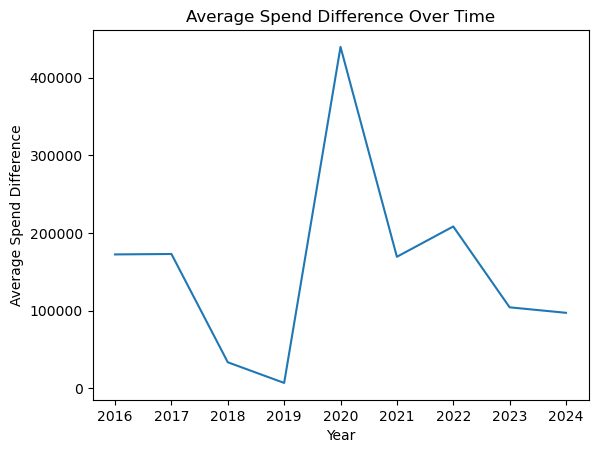

In [14]:
yearly_trends = final_merged_data.groupby(merged_data['YEAR'])['SPEND_DIFFERENCE'].mean()
yearly_trends.plot(kind='line')
plt.title('Average Spend Difference Over Time')
plt.xlabel('Year')
plt.ylabel('Average Spend Difference')
plt.show()


In [15]:
correlation_data = final_merged_data[['YEARLY_SPEND', 'TARGET_SPEND']]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              YEARLY_SPEND  TARGET_SPEND
YEARLY_SPEND      1.000000      0.753007
TARGET_SPEND      0.753007      1.000000


# Checking affect of Yearly Spends with Target Spends

In [16]:
final_merged_data_whith_na = final_merged_data.dropna(subset=['YEARLY_SPEND', 'TARGET_SPEND'])

X = final_merged_data_whith_na[['YEARLY_SPEND']]
y = final_merged_data_whith_na['TARGET_SPEND']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           TARGET_SPEND   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     670.5
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           4.03e-95
Time:                        06:16:52   Log-Likelihood:                -7819.8
No. Observations:                 514   AIC:                         1.564e+04
Df Residuals:                     512   BIC:                         1.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.765e+05   4.48e+04      6.170   

In [17]:
final_merged_data_whith_na

MEMBER_KEY                        MEMBER_NAME_x  \
21    09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
22    09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
23    09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
24    09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
25    09bff507bc08bfee8d480bf6c1323195  Seddon Plant & Engineers Ltd Bolton   
...                                ...                                  ...   
3011  fe6bc6d86b22fdf70aa8befa3416a791                      Covelec Limited   
3015  feeb708dc998e768926e6f47368f903e                  BJB Hire Centre Ltd   
3022  ff546c6fcdbda873422203b6b233ef83                Inverlea Supplies Ltd   
3023  ff546c6fcdbda873422203b6b233ef83                Inverlea Supplies Ltd   
3024  ff546c6fcdbda873422203b6b233ef83                Inverlea Supplies Ltd   

      YEAR  YEARLY_SPEND  TARGET_SPEND  \
21    2022      10727.80       13000.0   
22    2022      10727.80       13000.0   
23    2022      10727.80       13000.0   
24    2022      10727.80       13000.0   
25    2022      10727.80       13000.0   
...    ...           ...           ...   
3011  2023        181.35           0.0   
3015  2024      21292.06       82969.0   
3022  2022      11367.25       12000.0   
3023  2023       3427.17       10605.0   
3024  2024        900.40        2914.0   

                                    MEMBER_NAME_y BUSINESS_TYPE POSTCODE_AREA  \
21        Seddon Plant & Engineers Ltd Birmingham        Member             B   
22            Seddon Plant & Engineers Ltd Bolton        Member            BL   
23           Seddon Plant & Engineers Ltd Airdrie        Member            ML   
24        Seddon Plant & Engineers Ltd Nottingham        Member            NG   
25    Seddon Plant & Engineers Ltd Stoke-On-Trent        Member            ST   
...                                           ...           ...           ...   
3011                              Covelec Limited        Member            LE   
3015                          BJB Hire Centre Ltd        Member            LE   
3022                        Inverlea Supplies Ltd        Member            DD   
3023                        Inverlea Supplies Ltd        Member            DD   
3024                        Inverlea Supplies Ltd        Member            DD   

                                 SECTOR_1               SECTOR_2 SIC_CODES  \
21                                    NaN  Construction Supplies       NaN   
22    Construction, Aggregates and Mining  Construction Supplies     46690   
23                                    NaN  Construction Supplies       NaN   
24                                    NaN  Construction Supplies       NaN   
25                                    NaN  Construction Supplies       NaN   
...                                   ...                    ...       ...   
3011     Facilities Management Specialist                    NaN     96090   
3015                         Hire Company                    NaN       NaN   
3022              Industrial Distribution                    NaN     32990   
3023              Industrial Distribution                    NaN     32990   
3024              Industrial Distribution                    NaN     32990   

     TRADE_COUNTER WEB_PRESENCE  SPEND_DIFFERENCE  
21            True         True           2272.20  
22            True         True           2272.20  
23            True         True           2272.20  
24            True        False           2272.20  
25            True         True           2272.20  
...            ...          ...               ...  
3011         False         True           -181.35  
3015         False        False          61676.94  
3022         False        False            632.75  
3023         False        False           7177.83  
3024         False        False           2013.60  

[514 rows x 14 columns]

In [18]:
final_merged_data.BUSINESS_TYPE.value_counts()

BUSINESS_TYPE
Member      4206
Supplier     126
Name: count, dtype: int64

In [19]:
merged_data.isnull().sum()

MEMBER_KEY         0
MEMBER_NAME        0
YEAR               0
YEARLY_SPEND     784
TARGET_SPEND    1487
dtype: int64

# Clustering Analysis Based on Normalized Target Spend with Business Type and Sector 1 Differentiation

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Cluster  TARGET_SPEND               \
                   mean          sum   
0       0  1.459170e+07  321017304.0   
1       1  1.283233e+07  128323263.0   
2       2  6.449844e+06   51598756.0   
3       3  9.815690e+06   78525517.0   
4       4  1.427425e+07  171291009.0   

                                            SECTOR_1  \
                                              unique   
0  [Automotive Specialist, Builders Merchant, Con...   
1  [Builders Merchant, Construction, Aggregates a...   
2  [Automotive Specialist, Builders Merchant, Cut...   
3  [Agricultural Specialist, Builders Merchant, C...   
4  [Industrial Distribution, Janitorial Specialis...   

                                            SECTOR_2       BUSINESS_TYPE  
                                              unique              unique  
0  [Power Tools Specialist, Engineering, PPE Spec...  [Member, Supplier]  
1                            [Construction Supplies]            [Member]  
2             [Engineering

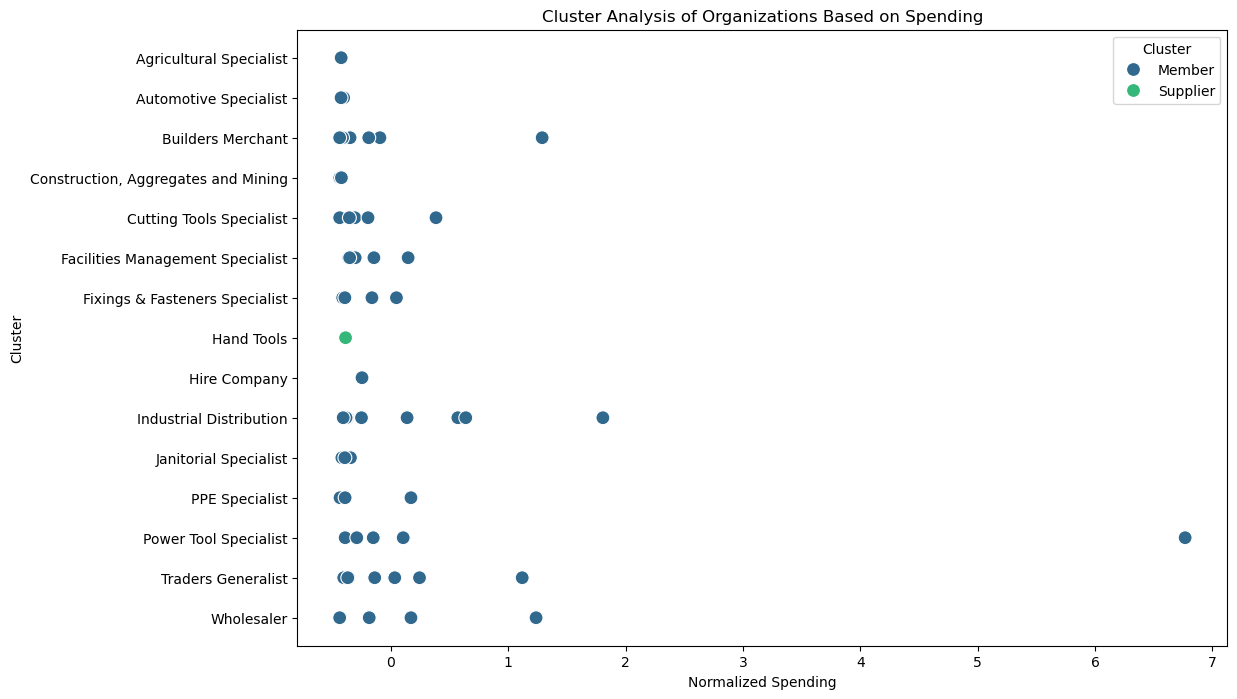

In [20]:


agg_data = final_merged_data.groupby(['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE']).agg({
    'TARGET_SPEND': 'sum'
}).reset_index()

scaler = StandardScaler()
agg_data['Normalized_Spending'] = scaler.fit_transform(agg_data[['TARGET_SPEND']])

agg_data_encoded = pd.get_dummies(agg_data, columns=['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE'])

features = agg_data_encoded.drop(['TARGET_SPEND', 'Normalized_Spending'], axis=1)
kmeans = KMeans(n_clusters=5, random_state=0)
agg_data['Cluster'] = kmeans.fit_predict(features)

cluster_summary = agg_data.groupby('Cluster').agg({
    'TARGET_SPEND': ['mean', 'sum'],
    'SECTOR_1': 'unique',
    'SECTOR_2': 'unique',
    'BUSINESS_TYPE': 'unique'
}).reset_index()
print(cluster_summary)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Normalized_Spending',
    y='SECTOR_1',
    hue='BUSINESS_TYPE',
    data=agg_data,
    palette='viridis',
    s=100
)
plt.title('Cluster Analysis of Organizations Based on Spending')
plt.xlabel('Normalized Spending')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()


# Clustering Analysis Based on Normalized Target Spend with Sector 1 and Sector 2 Differentiation

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Cluster  TARGET_SPEND               \
                   mean          sum   
0       0  1.459170e+07  321017304.0   
1       1  1.283233e+07  128323263.0   
2       2  6.449844e+06   51598756.0   
3       3  9.815690e+06   78525517.0   
4       4  1.427425e+07  171291009.0   

                                            SECTOR_1  \
                                              unique   
0  [Automotive Specialist, Builders Merchant, Con...   
1  [Builders Merchant, Construction, Aggregates a...   
2  [Automotive Specialist, Builders Merchant, Cut...   
3  [Agricultural Specialist, Builders Merchant, C...   
4  [Industrial Distribution, Janitorial Specialis...   

                                            SECTOR_2       BUSINESS_TYPE  
                                              unique              unique  
0  [Power Tools Specialist, Engineering, PPE Spec...  [Member, Supplier]  
1                            [Construction Supplies]            [Member]  
2             [Engineering

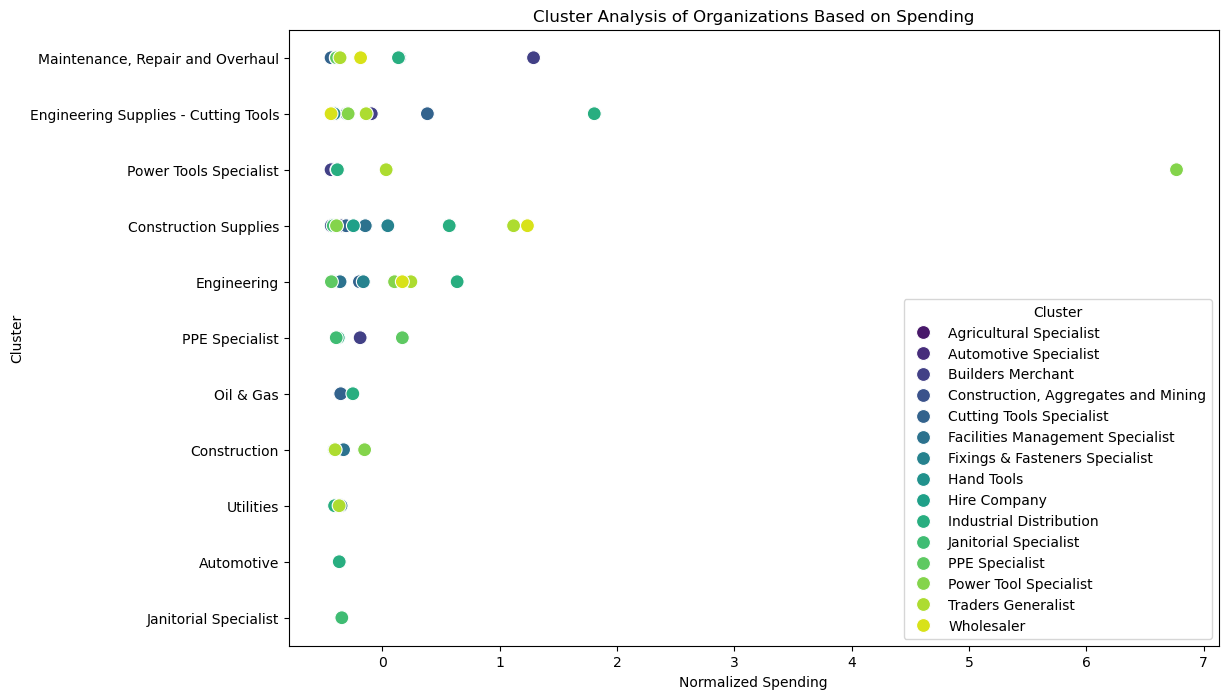

In [21]:


agg_data = final_merged_data.groupby(['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE']).agg({
    'TARGET_SPEND': 'sum'
}).reset_index()
scaler = StandardScaler()
agg_data['Normalized_Spending'] = scaler.fit_transform(agg_data[['TARGET_SPEND']])
agg_data_encoded = pd.get_dummies(agg_data, columns=['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE'])
features = agg_data_encoded.drop(['TARGET_SPEND', 'Normalized_Spending'], axis=1)
kmeans = KMeans(n_clusters=5, random_state=0)
agg_data['Cluster'] = kmeans.fit_predict(features)
cluster_summary = agg_data.groupby('Cluster').agg({
    'TARGET_SPEND': ['mean', 'sum'],
    'SECTOR_1': 'unique',
    'SECTOR_2': 'unique',
    'BUSINESS_TYPE': 'unique'
}).reset_index()
print(cluster_summary)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Normalized_Spending',
    y='SECTOR_2',
    hue='SECTOR_1',
    data=agg_data,
    palette='viridis',
    s=100
)
plt.title('Cluster Analysis of Organizations Based on Spending')
plt.xlabel('Normalized Spending')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()


# Clustering Analysis Incorporating Yearly Spend: Visualizing Target and Yearly Spend with Sector 1

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Cluster  TARGET_SPEND               YEARLY_SPEND                \
                   mean          sum          mean           sum   
0       0  1.459170e+07  321017304.0  1.158730e+07  2.549206e+08   
1       1  1.283233e+07  128323263.0  1.173189e+07  1.173189e+08   
2       2  6.449844e+06   51598756.0  7.950810e+06  6.360648e+07   
3       3  9.815690e+06   78525517.0  7.042860e+06  5.634288e+07   
4       4  1.427425e+07  171291009.0  9.915444e+06  1.189853e+08   

                                            SECTOR_1  \
                                              unique   
0  [Automotive Specialist, Builders Merchant, Con...   
1  [Builders Merchant, Construction, Aggregates a...   
2  [Automotive Specialist, Builders Merchant, Cut...   
3  [Agricultural Specialist, Builders Merchant, C...   
4  [Industrial Distribution, Janitorial Specialis...   

                                            SECTOR_2       BUSINESS_TYPE  
                                              unique   

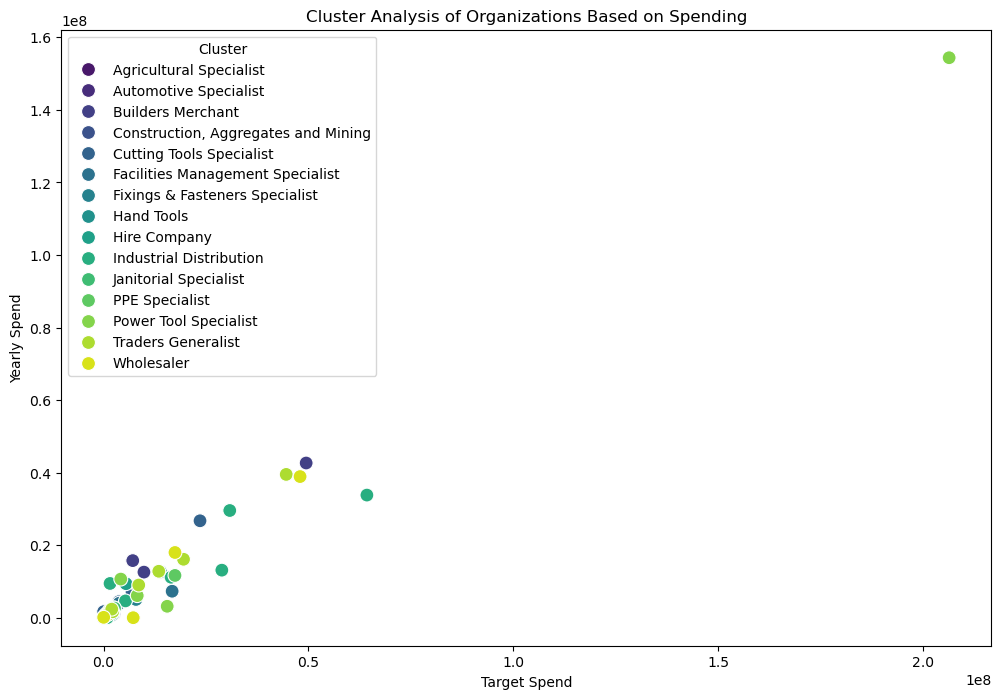

In [22]:

agg_data = final_merged_data.groupby(['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE']).agg({
    'TARGET_SPEND': 'sum',
    'YEARLY_SPEND': 'sum'
}).reset_index()

scaler = StandardScaler()
agg_data['Normalized_Target_Spend'] = scaler.fit_transform(agg_data[['TARGET_SPEND']])
agg_data_encoded = pd.get_dummies(agg_data, columns=['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE'])
features = agg_data_encoded.drop(['TARGET_SPEND', 'YEARLY_SPEND', 'Normalized_Target_Spend'], axis=1)
kmeans = KMeans(n_clusters=5, random_state=0)
agg_data['Cluster'] = kmeans.fit_predict(features)
cluster_summary = agg_data.groupby('Cluster').agg({
    'TARGET_SPEND': ['mean', 'sum'],
    'YEARLY_SPEND': ['mean', 'sum'],
    'SECTOR_1': 'unique',
    'SECTOR_2': 'unique',
    'BUSINESS_TYPE': 'unique'
}).reset_index()
print(cluster_summary)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TARGET_SPEND',
    y='YEARLY_SPEND',
    hue='SECTOR_1',
    data=agg_data,
    palette='viridis',
    s=100
)

plt.title('Cluster Analysis of Organizations Based on Spending')
plt.xlabel('Target Spend')
plt.ylabel('Yearly Spend')
plt.legend(title='Cluster')
plt.show()

# Comprehensive Clustering Analysis with Normalized Target and Yearly Spend: Differentiating by Business Type and Sector 1

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Cluster  TARGET_SPEND               YEARLY_SPEND                \
                   mean          sum          mean           sum   
0       0  1.459170e+07  321017304.0  1.158730e+07  2.549206e+08   
1       1  1.283233e+07  128323263.0  1.173189e+07  1.173189e+08   
2       2  6.449844e+06   51598756.0  7.950810e+06  6.360648e+07   
3       3  9.815690e+06   78525517.0  7.042860e+06  5.634288e+07   
4       4  1.427425e+07  171291009.0  9.915444e+06  1.189853e+08   

                                            SECTOR_1  \
                                              unique   
0  [Automotive Specialist, Builders Merchant, Con...   
1  [Builders Merchant, Construction, Aggregates a...   
2  [Automotive Specialist, Builders Merchant, Cut...   
3  [Agricultural Specialist, Builders Merchant, C...   
4  [Industrial Distribution, Janitorial Specialis...   

                                            SECTOR_2       BUSINESS_TYPE  
                                              unique   

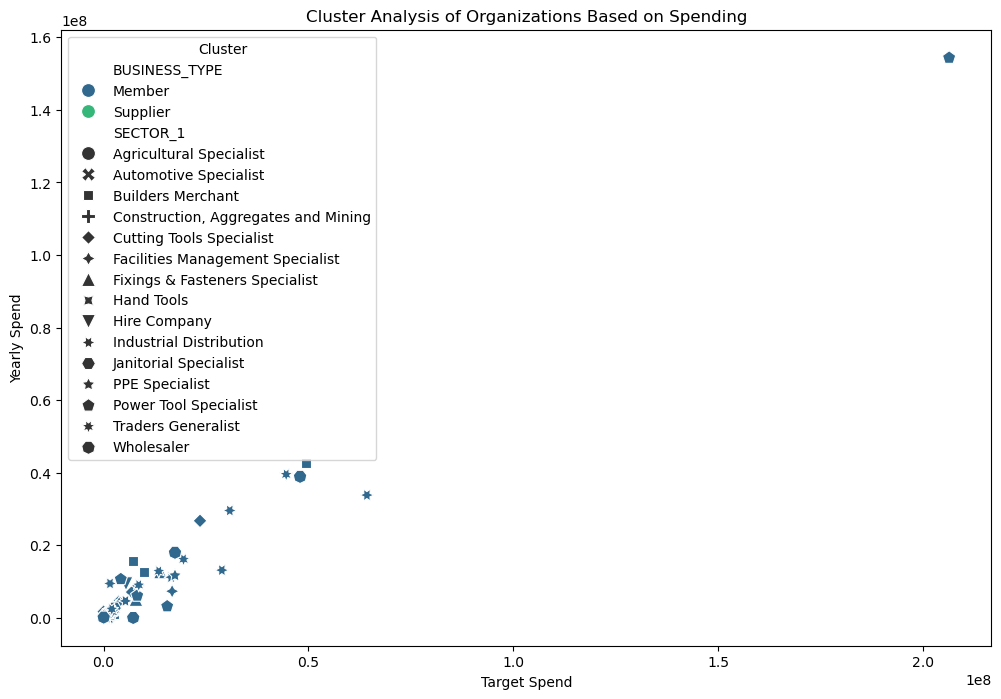

In [23]:
agg_data = final_merged_data.groupby(['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE']).agg({
    'TARGET_SPEND': 'sum',
    'YEARLY_SPEND': 'sum'
}).reset_index()

scaler = StandardScaler()
agg_data[['Normalized_Target_Spend', 'Normalized_Yearly_Spend']] = scaler.fit_transform(agg_data[['TARGET_SPEND', 'YEARLY_SPEND']])
agg_data_encoded = pd.get_dummies(agg_data, columns=['SECTOR_1', 'SECTOR_2', 'BUSINESS_TYPE'])
features = agg_data_encoded.drop(['TARGET_SPEND', 'YEARLY_SPEND', 'Normalized_Target_Spend', 'Normalized_Yearly_Spend'], axis=1)
kmeans = KMeans(n_clusters=5, random_state=0)
agg_data['Cluster'] = kmeans.fit_predict(features)
cluster_summary = agg_data.groupby('Cluster').agg({
    'TARGET_SPEND': ['mean', 'sum'],
    'YEARLY_SPEND': ['mean', 'sum'],
    'SECTOR_1': 'unique',
    'SECTOR_2': 'unique',
    'BUSINESS_TYPE': 'unique'
}).reset_index()
print(cluster_summary)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TARGET_SPEND',
    y='YEARLY_SPEND',
    hue='BUSINESS_TYPE',
    style='SECTOR_1',
    data=agg_data,
    palette='viridis',
    s=100
)

plt.title('Cluster Analysis of Organizations Based on Spending')
plt.xlabel('Target Spend')
plt.ylabel('Yearly Spend')
plt.legend(title='Cluster')
plt.show()


In [24]:
member_supplier_spend.MEMBER_NAME.value_counts()

MEMBER_NAME
Jackdaw Tools Ltd                           6732
RS Industrial Services (Tyne & Wear) Ltd    4404
Lloyd & Jones Engineers Ltd                 4381
Quality Tooling (North East) Ltd            3821
G E Tools Ltd (Rhyl)                        3555
                                            ... 
Sense Group Limited                            1
Kitout Limited                                 1
RYONA ENGINEERING SUPPLIES LTD.,               1
DORMER TOOLS                                   1
EM Industrial Products Ltd                     1
Name: count, Length: 527, dtype: int64

In [25]:
member_supplier_spend['SPEND'].min()

-105761.56

In [26]:

member_supplier_spend['SPEND'] = member_supplier_spend['SPEND'].abs()

In [27]:
member_supplier_spend['SPEND'].min()

0.0

# Time Serese Analysis

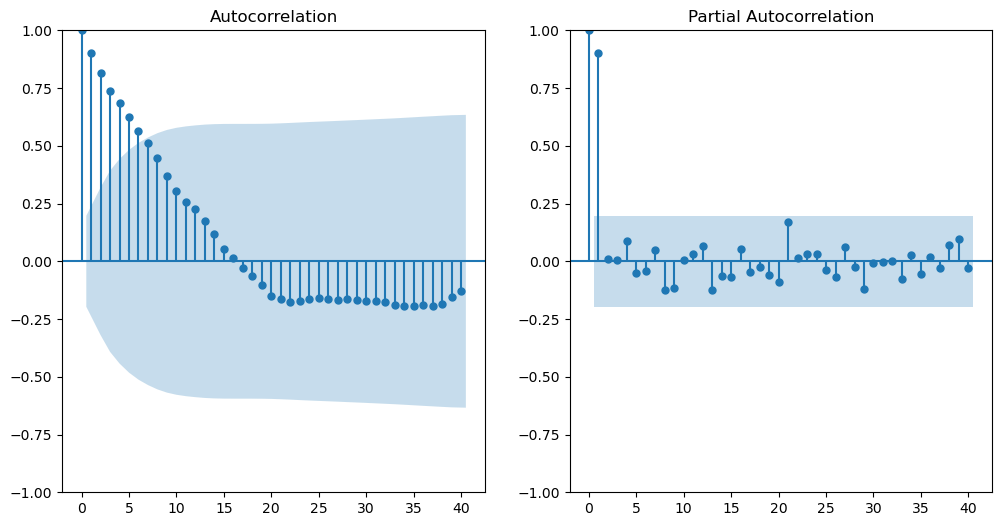

In [28]:
member_supplier_spend['YEAR_MONTH'] = pd.to_datetime(member_supplier_spend['YEAR_MONTH'], format='%Y-%m')
aggregated_spend = member_supplier_spend.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

def plot_acf_pacf(data, lags=40):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.show()

spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

plot_acf_pacf(spend_data)



p (autoregressive term): The PACF cuts off after lag 1, suggesting
𝑝
=
1
p=1.
d (differencing term): The slow decay in the ACF suggests the data might be non-stationary. Applying first-order differencing
𝑑
=
1
d=1 can help make the data stationary.
q (moving average term): The ACF shows a gradual decay, which might suggest an MA process. However, a clear cutoff isn't observed, so a low value like
𝑞
=
1
q=1 can be a good starting point.

In [29]:
def fit_arima(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

try:
    arima_model = fit_arima(spend_data)
    print(f'ARIMA model fitted successfully.')
except Exception as e:
    print(f'Could not fit ARIMA model. Error: {e}')

print(arima_model.summary())



ARIMA model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  SPEND   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1538.227
Date:                Fri, 16 Aug 2024   AIC                           3082.455
Time:                        06:16:54   BIC                           3090.210
Sample:                    01-01-2016   HQIC                          3085.591
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0048     13.943      0.000      1.000     -27.322      27.332
ma.L1          0.0048     13.978      0.000      1.000     -27.392      27.401
sigma2      2.574e+

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

In [30]:

forecast_start = '2024-01-01'
forecast_end = '2025-12-01'
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')
forecast = arima_model.get_forecast(steps=len(forecast_index))
forecast_mean = forecast.predicted_mean.abs()

forecast_ci = forecast.conf_int()
print(forecast_mean)



2024-04-01    294232.235795
2024-05-01    294115.933372
2024-06-01    294115.374188
2024-07-01    294115.371500
2024-08-01    294115.371487
2024-09-01    294115.371487
2024-10-01    294115.371487
2024-11-01    294115.371487
2024-12-01    294115.371487
2025-01-01    294115.371487
2025-02-01    294115.371487
2025-03-01    294115.371487
2025-04-01    294115.371487
2025-05-01    294115.371487
2025-06-01    294115.371487
2025-07-01    294115.371487
2025-08-01    294115.371487
2025-09-01    294115.371487
2025-10-01    294115.371487
2025-11-01    294115.371487
2025-12-01    294115.371487
2026-01-01    294115.371487
2026-02-01    294115.371487
2026-03-01    294115.371487
Freq: MS, Name: predicted_mean, dtype: float64


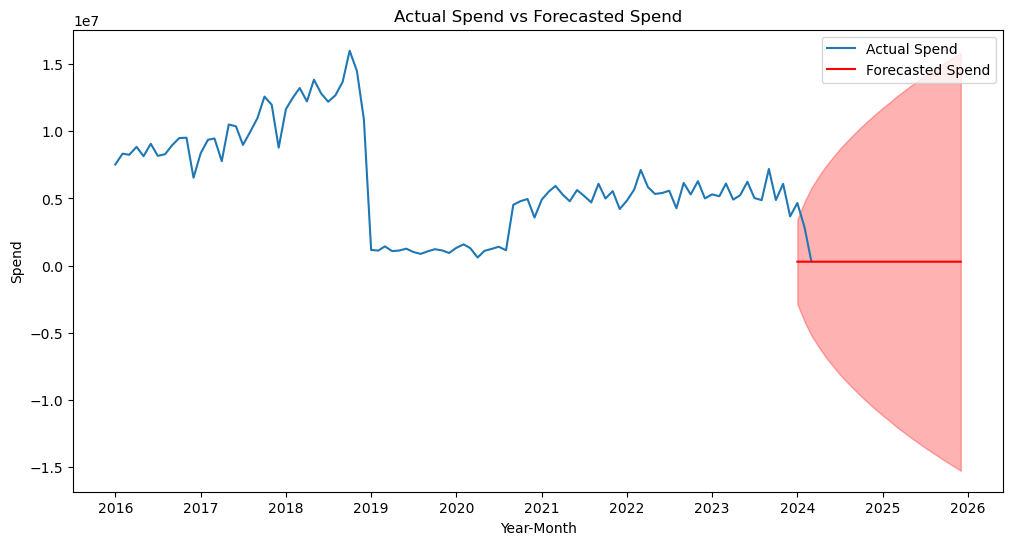

In [31]:

plt.figure(figsize=(12, 6))
plt.plot(spend_data, label='Actual Spend')
plt.plot(forecast_index, forecast_mean, label='Forecasted Spend', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Actual Spend vs Forecasted Spend')
plt.xlabel('Year-Month')
plt.ylabel('Spend')
plt.legend()
plt.show()




In [32]:
spend_data

YEAR_MONTH
2016-01-01    7522501.50
2016-02-01    8328306.23
2016-03-01    8247233.28
2016-04-01    8836789.90
2016-05-01    8139935.34
                 ...    
2023-11-01    6082922.96
2023-12-01    3665083.18
2024-01-01    4659160.88
2024-02-01    2834139.14
2024-03-01     318421.53
Name: SPEND, Length: 99, dtype: float64

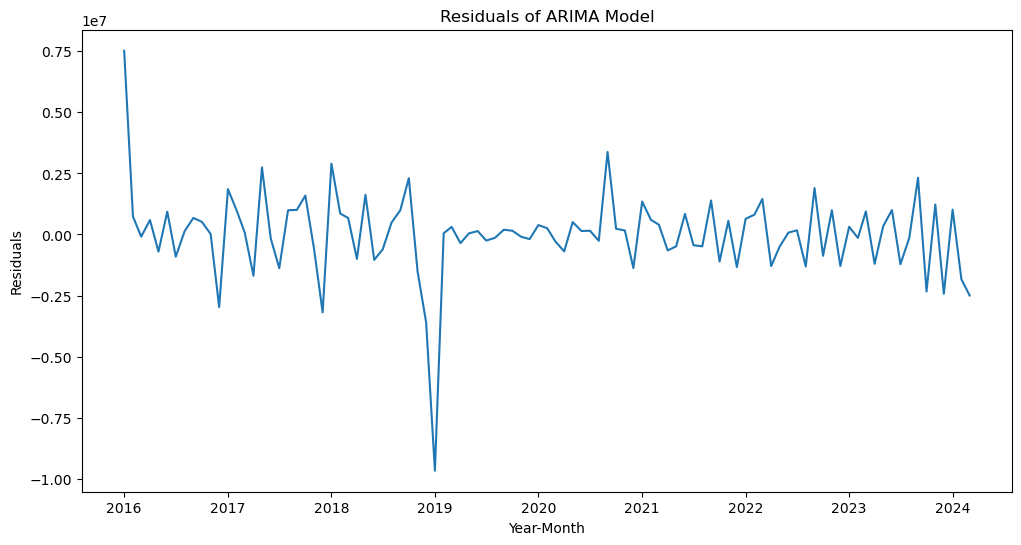

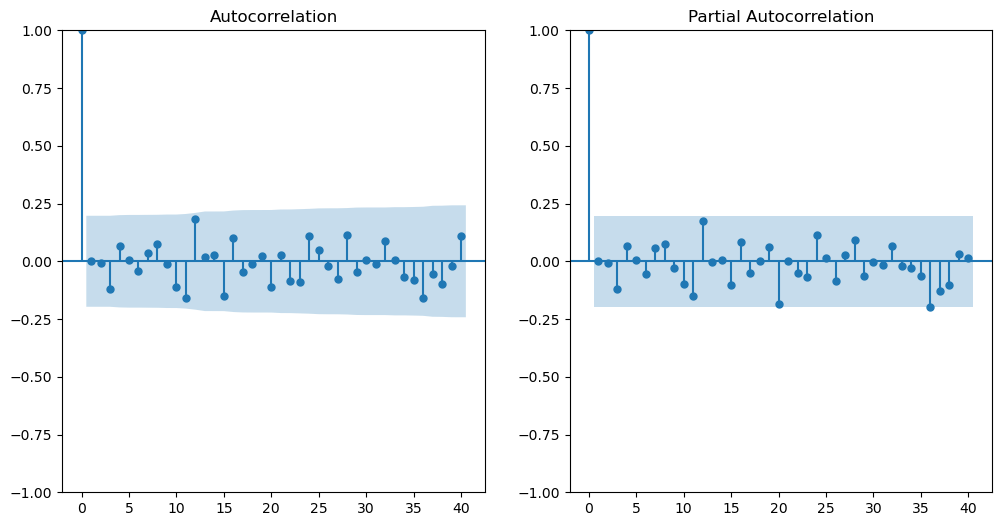

In [33]:

residuals = arima_model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year-Month')
plt.ylabel('Residuals')
plt.show()

plot_acf_pacf(residuals)

**Applying model for only member Jackdaw Tools Ltd**

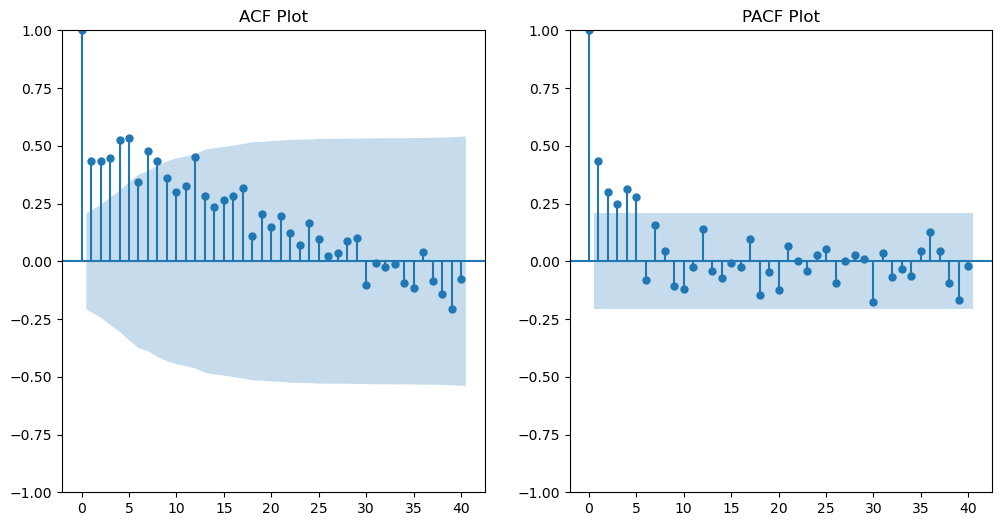

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


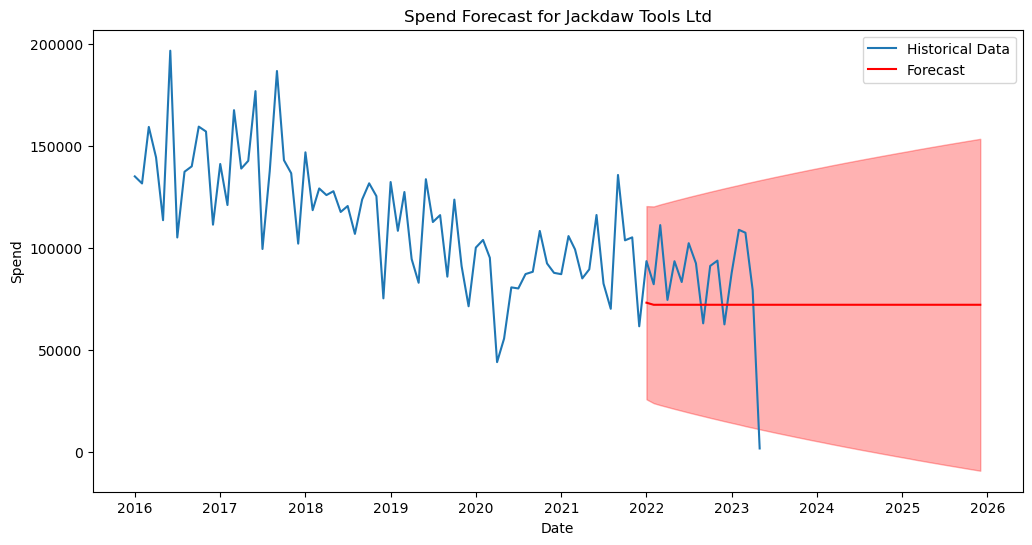

In [34]:
jackdaw_data = member_supplier_spend[member_supplier_spend['MEMBER_NAME'] == 'Jackdaw Tools Ltd']


aggregated_spend = jackdaw_data.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

aggregated_spend['SPEND'] = aggregated_spend['SPEND'].abs()

spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

def plot_acf_pacf(data, lags=40):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title('ACF Plot')
    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title('PACF Plot')
    plt.show()

plot_acf_pacf(spend_data)

p = 1
d = 1
q = 1

model = ARIMA(spend_data, order=(p, d, q))
model_fit = model.fit()

forecast_start = '2022-01-01'
forecast_end = '2025-12-01'
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

forecast = model_fit.get_forecast(steps=len(forecast_index))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(spend_data, label='Historical Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Spend Forecast for Jackdaw Tools Ltd')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.legend()
plt.show()




In [35]:
member_target_spend.TARGET_SPEND = member_target_spend.TARGET_SPEND.abs()

Applying model for Target Spends


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


df = pd.DataFrame(member_target_spend)
df['DATE'] = pd.to_datetime(df['YEAR'], format='%Y')
df.set_index('DATE', inplace=True)


def fit_arima(series, order=(1, 1, 1)):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit




In [37]:
member = 'Stockexe Ltd t/a Stock Exe Building Supplies'
member_data = df[df['MEMBER_NAME'] == member]['TARGET_SPEND']

arima_model = fit_arima(member_data)
forecast_start = '2024-01-01'
forecast_end = '2025-12-01'
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')
forecast = arima_model.get_forecast(steps=len(forecast_index))
forecast_mean = forecast.predicted_mean
forecast_se = forecast.se_mean
forecast_ci = forecast.conf_int()


C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [38]:
print('Forecast Mean:\n', forecast_mean)
print('Forecast Standard Errors:\n', forecast_se)
print('Confidence Intervals:\n', forecast_ci)

Forecast Mean:
 2025-01-01    29203.578867
2026-01-01    31664.837939
2027-01-01    30281.596630
2028-01-01    31058.985951
2029-01-01    30622.088822
2030-01-01    30867.627443
2031-01-01    30729.633370
2032-01-01    30807.186808
2033-01-01    30763.601344
2034-01-01    30788.096617
2035-01-01    30774.330137
2036-01-01    30782.066976
2037-01-01    30777.718829
2038-01-01    30780.162512
2039-01-01    30778.789149
2040-01-01    30779.560986
2041-01-01    30779.127209
2042-01-01    30779.370994
2043-01-01    30779.233986
2044-01-01    30779.310985
2045-01-01    30779.267711
2046-01-01    30779.292031
2047-01-01    30779.278363
2048-01-01    30779.286045
Freq: AS-JAN, Name: predicted_mean, dtype: float64
Forecast Standard Errors:
 2025-01-01     19057.886229
2026-01-01     31243.091874
2027-01-01     37972.566076
2028-01-01     44589.788902
2029-01-01     49886.231296
2030-01-01     54905.655732
2031-01-01     59381.532688
2032-01-01     63606.656967
2033-01-01     67534.327551
2034-0

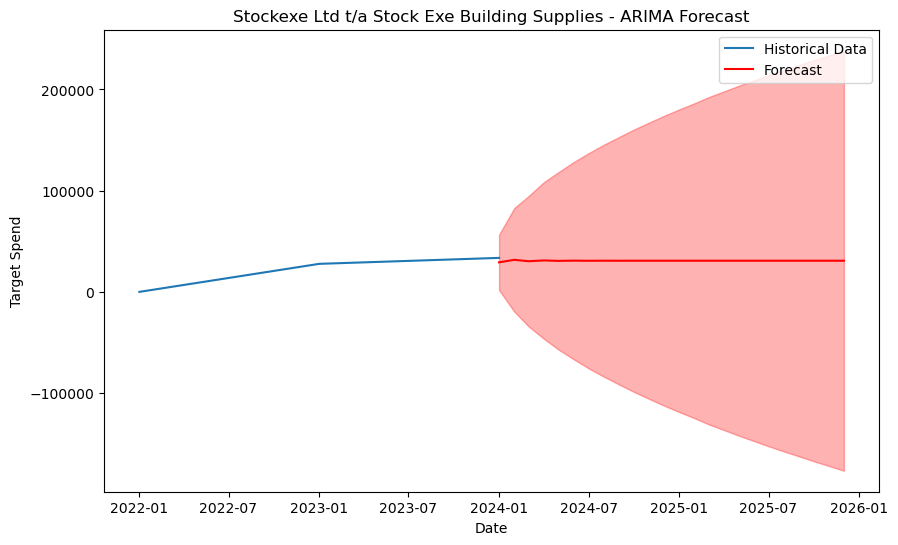

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(member_data, label='Historical Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0]+10000, forecast_ci.iloc[:, 1]-10000, color='red', alpha=0.3)
plt.title(f'{member} - ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Target Spend')
plt.legend()
plt.show()

Applying model with different P D and Q

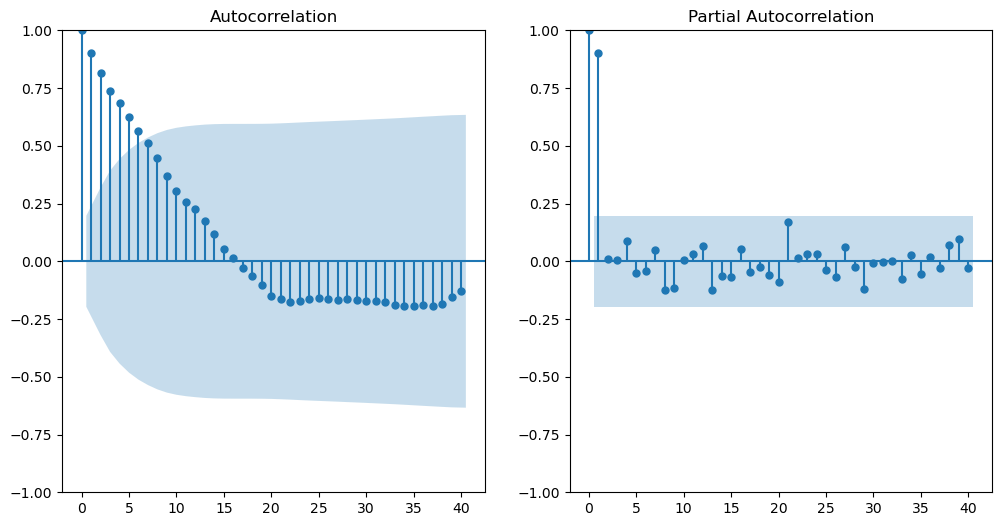

ARIMA model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  SPEND   No. Observations:                   99
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1528.891
Date:                Fri, 16 Aug 2024   AIC                           3065.781
Time:                        06:16:56   BIC                           3076.080
Sample:                    01-01-2016   HQIC                          3069.946
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0894      0.077      1.156      0.248      -0.062       0.241
ar.L2         -0.0222      0.130     -0.170      0.865      -0.277       0.233
ma.L1         -0.98

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

In [40]:
member_supplier_spend['YEAR_MONTH'] = pd.to_datetime(member_supplier_spend['YEAR_MONTH'], format='%Y-%m')
member_supplier_spend['SPEND'] = member_supplier_spend['SPEND'].apply(lambda x: max(x, 0))

aggregated_spend = member_supplier_spend.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()

aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

def plot_acf_pacf(data, lags=40):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.show()
spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

plot_acf_pacf(spend_data)

def fit_arima(data, order=(2, 2, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

try:
    arima_model = fit_arima(spend_data)
    print(f'ARIMA model fitted successfully.')
except Exception as e:
    print(f'Could not fit ARIMA model. Error: {e}')

print(arima_model.summary())

forecast_start = '2024-01-01'
forecast_end = '2025-12-01'
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')
forecast = arima_model.get_forecast(steps=len(forecast_index))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()



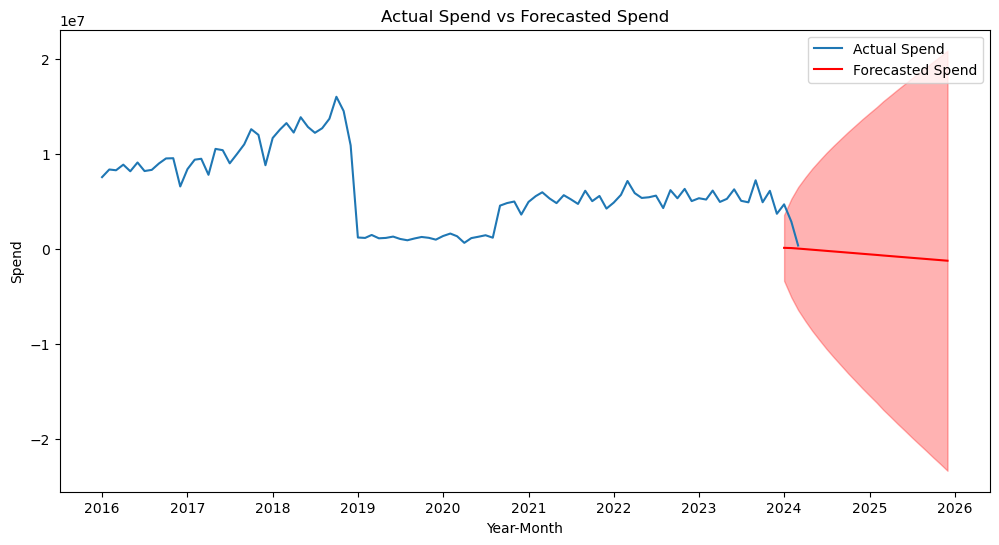

In [41]:

plt.figure(figsize=(12, 6))
plt.plot(spend_data, label='Actual Spend')
plt.plot(forecast_index, forecast_mean, label='Forecasted Spend', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Actual Spend vs Forecasted Spend')
plt.xlabel('Year-Month')
plt.ylabel('Spend')
plt.legend()
plt.show()


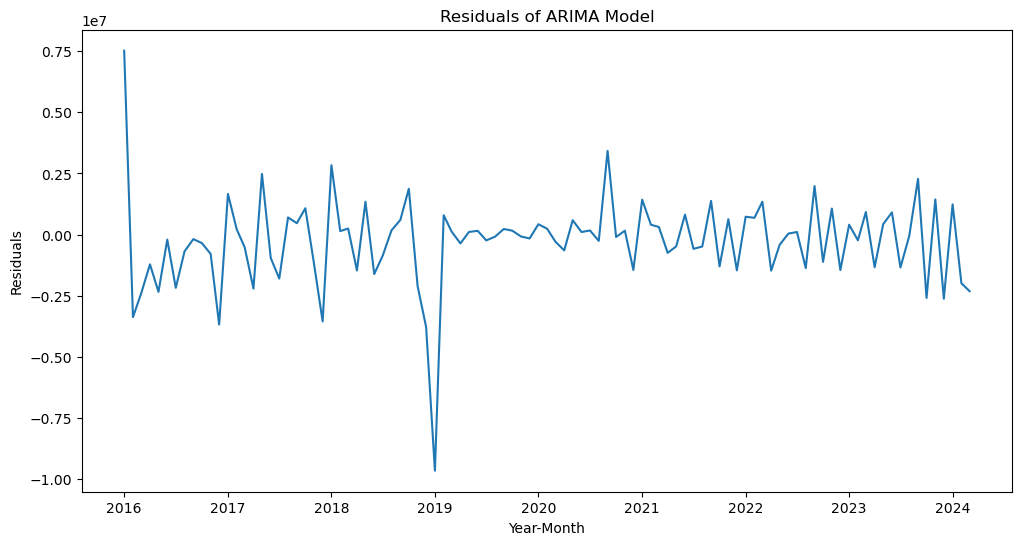

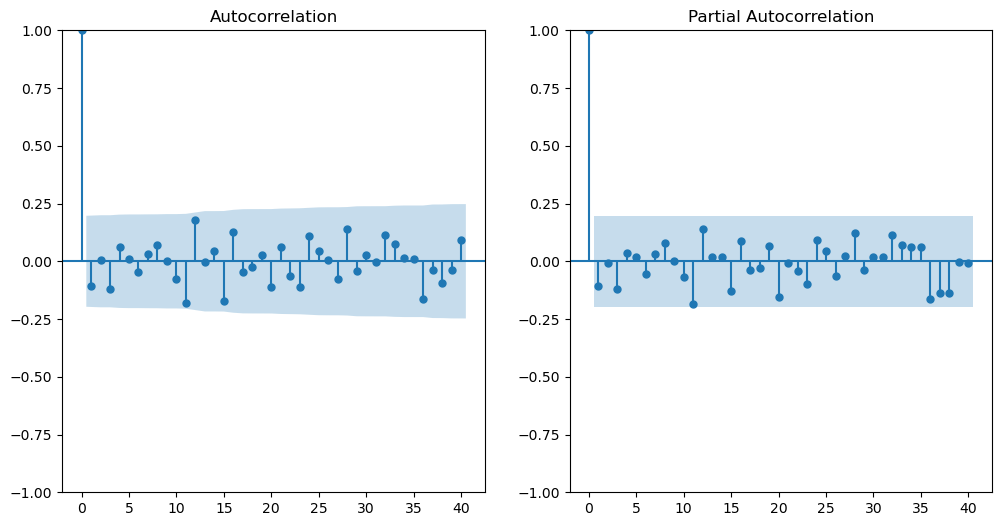

In [42]:
residuals = arima_model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year-Month')
plt.ylabel('Residuals')
plt.show()

plot_acf_pacf(residuals)


**Applying model with longer time frame**

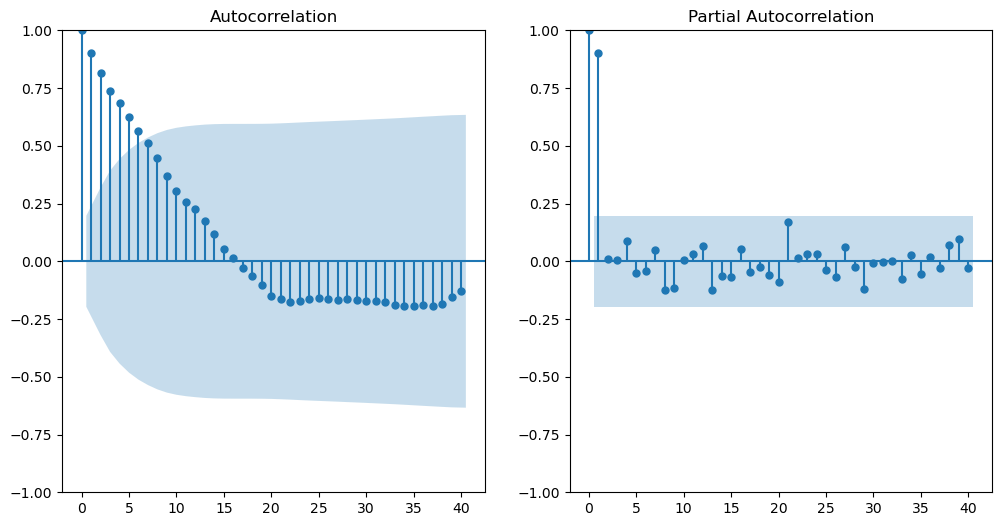

ARIMA model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  SPEND   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1538.227
Date:                Fri, 16 Aug 2024   AIC                           3082.455
Time:                        06:16:57   BIC                           3090.210
Sample:                    01-01-2016   HQIC                          3085.591
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0048     13.943      0.000      1.000     -27.322      27.332
ma.L1          0.0048     13.978      0.000      1.000     -27.392      27.401
sigma2      2.574e+

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

In [43]:
member_supplier_spend['YEAR_MONTH'] = pd.to_datetime(member_supplier_spend['YEAR_MONTH'], format='%Y-%m')

member_supplier_spend['SPEND'] = member_supplier_spend['SPEND'].abs()

aggregated_spend = member_supplier_spend.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()

aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

def plot_acf_pacf(data, lags=40):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.show()

spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

plot_acf_pacf(spend_data)

def fit_arima(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

try:
    arima_model = fit_arima(spend_data)
    print(f'ARIMA model fitted successfully.')
except Exception as e:
    print(f'Could not fit ARIMA model. Error: {e}')

print(arima_model.summary())


In [44]:
forecast_start = '2023-01-01'
forecast_end = '2025-12-01'
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

forecast = arima_model.get_forecast(steps=len(forecast_index))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()



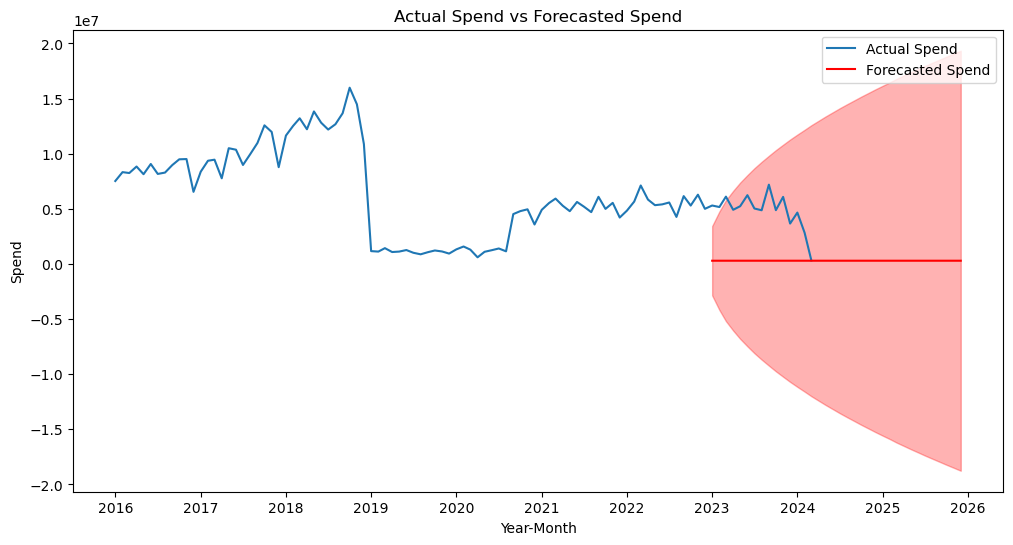

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(spend_data, label='Actual Spend')
plt.plot(forecast_index, forecast_mean, label='Forecasted Spend', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Actual Spend vs Forecasted Spend')
plt.xlabel('Year-Month')
plt.ylabel('Spend')
plt.legend()
plt.show()



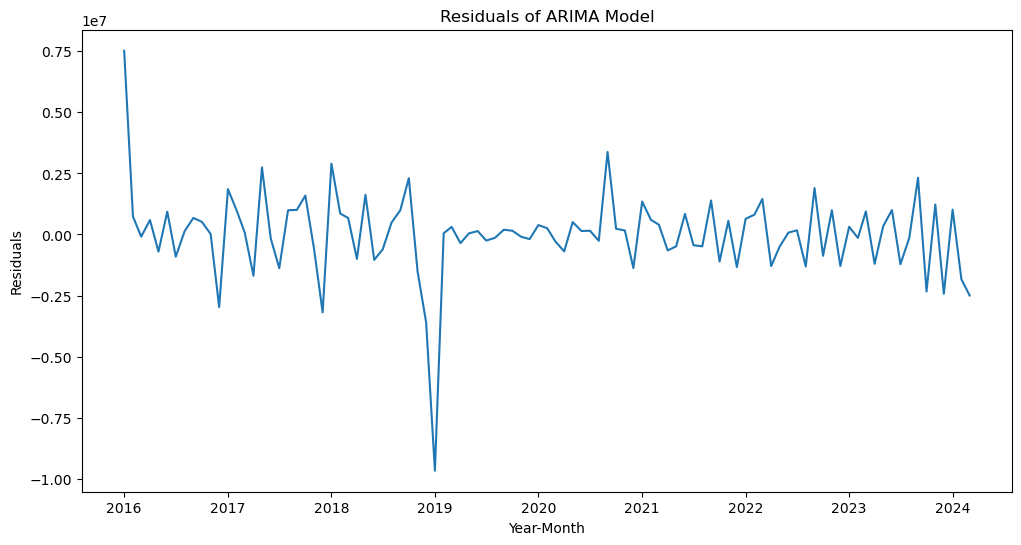

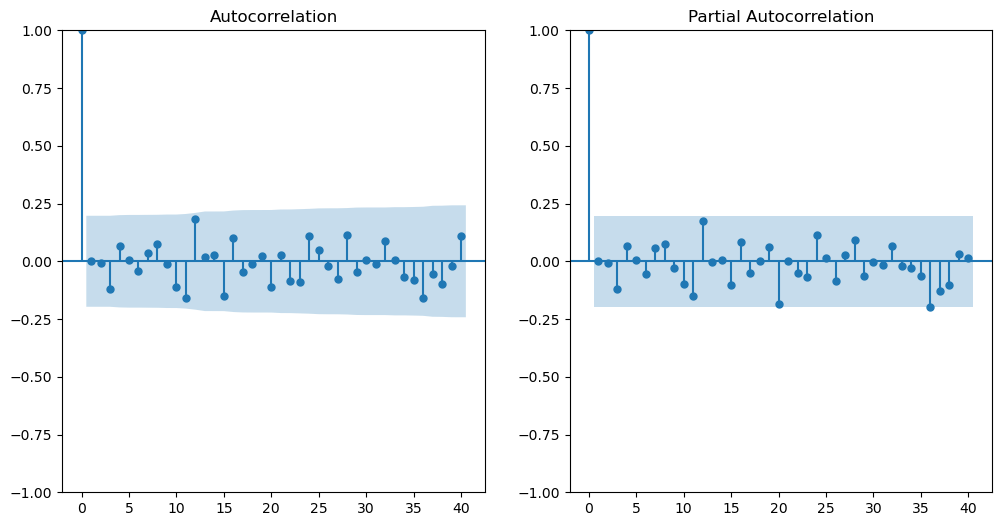

In [46]:
residuals = arima_model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year-Month')
plt.ylabel('Residuals')
plt.show()


plot_acf_pacf(residuals)


In [47]:
member_supplier_details

MEMBER_KEY                         MEMBER_NAME  \
0                                  -99                             Unknown   
1                                  -99                             Unknown   
2     004ff0f18d83b777f3040d21c8f3cdc0                   DHL Parcel UK Ltd   
3     0153f511a2a66c54a3b6ac48730a392b               JAS Forwarding UK Ltd   
4     0221066a29a378aa687b5203403a1a60  SOUTHERN POWER TOOLS & ABRAS LTD.,   
...                                ...                                 ...   
1543  ff5f48a13093aab5bd55b0fe8f9d25a3             Gorilla Glue Europe Ltd   
1544  ff66d5f68c9f0f4b322d5a57caa852f7                  Heron Supplies Ltd   
1545  ff82810218b794c408ef64c16579f3a2               Bestport (Europe) Ltd   
1546  ff91b1e417318253a9264230e55af48d        The L S Starrett Company Ltd   
1547  ffb0acc6b7a6bba58afc084dd78d1596                Southern Filters Ltd   

     BUSINESS_TYPE POSTCODE_AREA                 SECTOR_1     SECTOR_2  \
0           Member           NaN                      NaN      Unknown   
1         Supplier           NaN                  Unknown          NaN   
2         Supplier            SL        Business Services          NaN   
3         Supplier            TW                      NaN          NaN   
4           Member            PO                      NaN          NaN   
...            ...           ...                      ...          ...   
1543      Supplier            PR     Adhesives & Sealants          NaN   
1544      Supplier            WR                      PPE          NaN   
1545        Member            DD       Traders Generalist  Engineering   
1546      Supplier            TD   Saws, Circ, Band, Hole          NaN   
1547        Member            EX  Industrial Distribution  Engineering   

              SIC_CODES TRADE_COUNTER WEB_PRESENCE  
0                   NaN           NaN          NaN  
1                   NaN           NaN          NaN  
2           53201|53202         False         True  
3                   NaN         False        False  
4                   NaN           NaN          NaN  
...                 ...           ...          ...  
1543              46900         False         True  
1544        96090|46900         False         True  
1545              47910          True         True  
1546  46620|26701|25730         False         True  
1547              47990          True         True  

[1548 rows x 9 columns]

In [48]:
merged_df = member_supplier_spend.merge(
    member_supplier_details[member_supplier_details['BUSINESS_TYPE'] == 'Member'],
    left_on='MEMBER_NAME',
    right_on='MEMBER_NAME',
    how='left'
)


new_df = merged_df[[ 'MEMBER_NAME', 'YEAR_MONTH', 'SPEND', 'SECTOR_1']]


In [49]:
print(new_df.head())

                                    MEMBER_NAME YEAR_MONTH   SPEND  \
0                    EM Industrial Products Ltd 2017-09-01    0.00   
1  Stockexe Ltd t/a Stock Exe Building Supplies 2023-03-01  158.40   
2  Stockexe Ltd t/a Stock Exe Building Supplies 2023-06-01  345.64   
3  Stockexe Ltd t/a Stock Exe Building Supplies 2023-07-01  158.80   
4  Stockexe Ltd t/a Stock Exe Building Supplies 2023-08-01  267.43   

            SECTOR_1  
0                NaN  
1  Builders Merchant  
2  Builders Merchant  
3  Builders Merchant  
4  Builders Merchant  


# Using Gradient BOOsting

ARIMA MAE: 3617410.2595689027, MSE: 15886477332667.676
Adjusted Forecast MAE: 30331.237448495027, MSE: 1213870276.9374


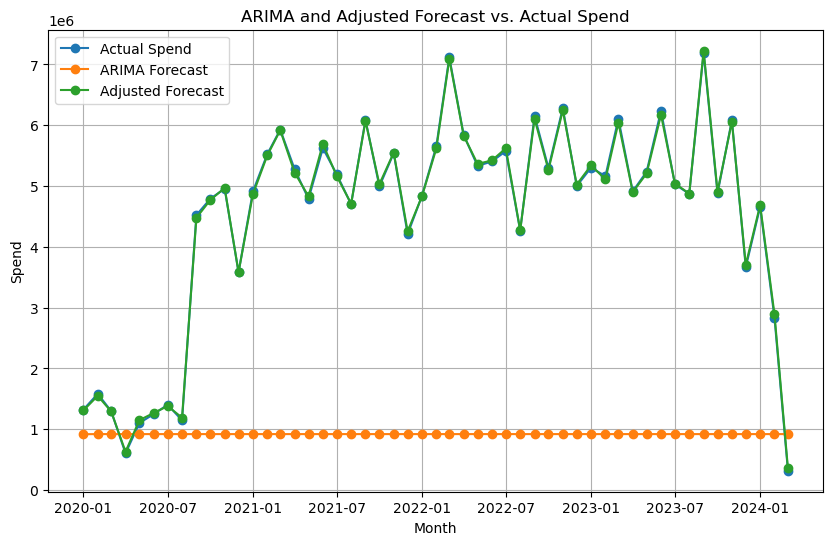

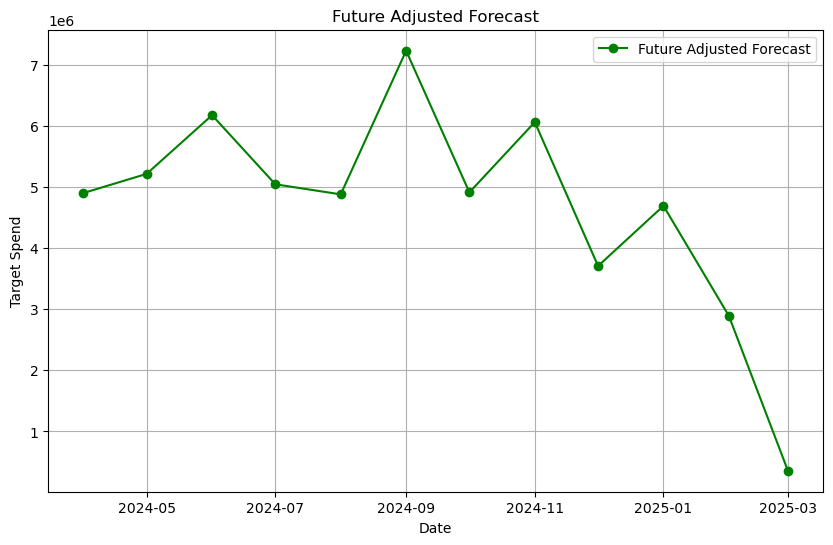

In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'member_supplier_spend' is already loaded and processed
member_supplier_spend['YEAR_MONTH'] = pd.to_datetime(member_supplier_spend['YEAR_MONTH'], format='%Y-%m')
member_supplier_spend['SPEND'] = member_supplier_spend['SPEND'].apply(lambda x: max(x, 0))
aggregated_spend = member_supplier_spend.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

# Split the data into training and testing sets
train_data = aggregated_spend[aggregated_spend['YEAR_MONTH'] < '2020-01-01']
test_data = aggregated_spend[aggregated_spend['YEAR_MONTH'] >= '2020-01-01']

# Train the ARIMA model
arima_model = ARIMA(train_data['SPEND'], order=(1,1,1))
arima_model_fit = arima_model.fit()

# Forecast on the test set
arima_forecast = arima_model_fit.forecast(steps=len(test_data))

# Calculate the residuals
residuals = test_data['SPEND'].values - arima_forecast

# Prepare the data for Gradient Boosting
X_train_gb = pd.DataFrame({
    'arima_forecast': arima_forecast,
    'lagged_residual_1': np.roll(residuals, 1),
    'lagged_residual_2': np.roll(residuals, 2),
    'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0)
}).fillna(0)  # Replace NaN with 0

y_train_gb = residuals  # Target is the residual

# Train the Gradient Boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train_gb, y_train_gb)

# Correct the ARIMA forecast using the Gradient Boosting model
residual_correction = gb_regressor.predict(X_train_gb)
adjusted_forecast = arima_forecast + residual_correction

# Evaluate the models
mae_arima = mean_absolute_error(test_data['SPEND'], arima_forecast)
mse_arima = mean_squared_error(test_data['SPEND'], arima_forecast)
mae_adjusted = mean_absolute_error(test_data['SPEND'], adjusted_forecast)
mse_adjusted = mean_squared_error(test_data['SPEND'], adjusted_forecast)

print(f'ARIMA MAE: {mae_arima}, MSE: {mse_arima}')
print(f'Adjusted Forecast MAE: {mae_adjusted}, MSE: {mse_adjusted}')

# Future Prediction
# First, generate future ARIMA forecasts
future_steps = 12  # Number of steps to forecast into the future
arima_future_forecast = arima_model_fit.forecast(steps=future_steps)

# Prepare data for Gradient Boosting prediction
# Note: for real future prediction, you need to generate lagged features based on past residuals
X_future_gb = pd.DataFrame({
    'arima_forecast': arima_future_forecast,
    'lagged_residual_1': np.roll(residuals, 1)[-future_steps:],  # Use recent residuals
    'lagged_residual_2': np.roll(residuals, 2)[-future_steps:],
    'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values[-future_steps:]
}).fillna(0)

# Predict the corrections and adjust the future forecast
future_residual_correction = gb_regressor.predict(X_future_gb)
future_adjusted_forecast = arima_future_forecast + future_residual_correction

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_data['YEAR_MONTH'], test_data['SPEND'], label='Actual Spend', marker='o')
plt.plot(test_data['YEAR_MONTH'], arima_forecast, label='ARIMA Forecast', marker='o')
plt.plot(test_data['YEAR_MONTH'], adjusted_forecast, label='Adjusted Forecast', marker='o')
plt.xlabel('Month')
plt.ylabel('Spend')
plt.title('ARIMA and Adjusted Forecast vs. Actual Spend')
plt.legend()
plt.grid(True)
plt.show()

# Future forecast plot
future_dates = pd.date_range(start=test_data['YEAR_MONTH'].max(), periods=future_steps+1, freq='MS')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_adjusted_forecast, label='Future Adjusted Forecast', marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Target Spend')
plt.title('Future Adjusted Forecast')
plt.legend()
plt.grid(True)
plt.show()


# Forcast as Per sectors 2024-1 to 2025-12

**With and Whithout absolute spend (negative and non negative converted values)**

In [51]:
def plot_acf_pacf(data, lags=10):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title('ACF Plot')
    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title('PACF Plot')
    plt.show()



In [52]:
sector_forecasts = {}

sectors = new_df['SECTOR_1'].dropna().unique()

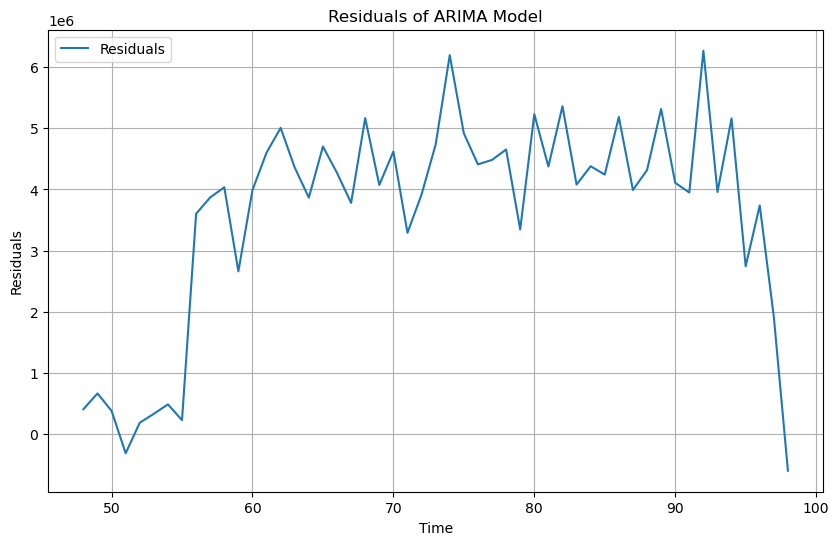

In [53]:
# Plot residuals to check for patterns
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
for sector, forecast in sector_forecasts.items():
    print(f'Sector: {sector}')
    print('Forecast Mean (2024-2025):')

    # Loop through the forecasted values and print them
    for date, value in zip(future_index, forecast['forecast_mean']):
        print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

    print('\n')


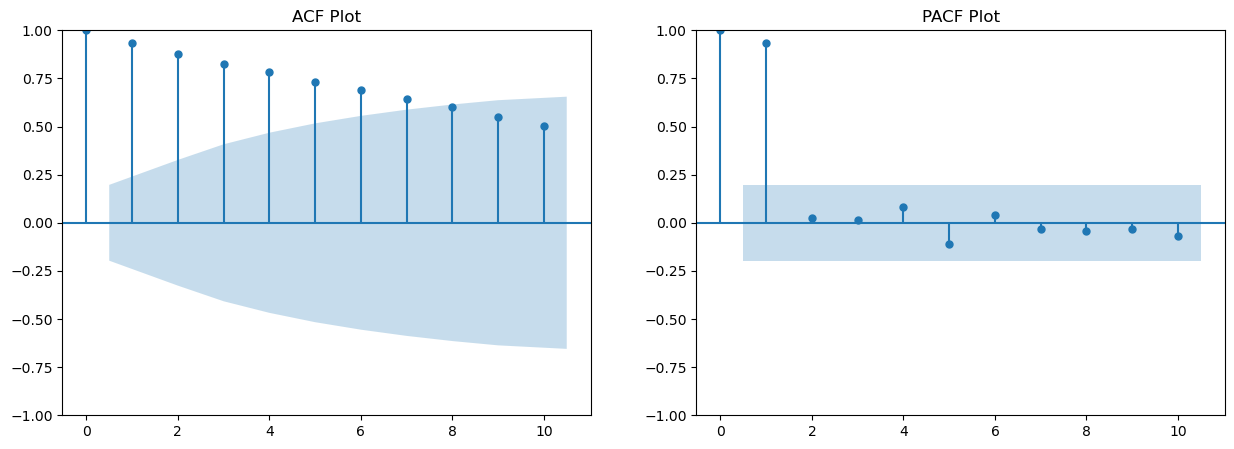

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

Industrial Distribution ARIMA MAE: 127470.36598718716, MSE: 24210255368.53977
Industrial Distribution Adjusted Forecast MAE: 82.69476256733677, MSE: 8618.93528366444


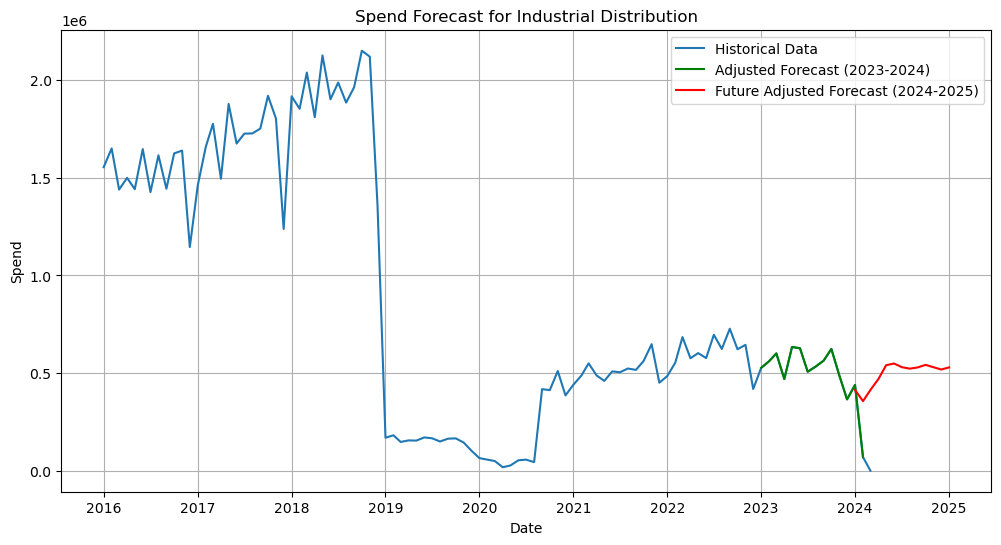

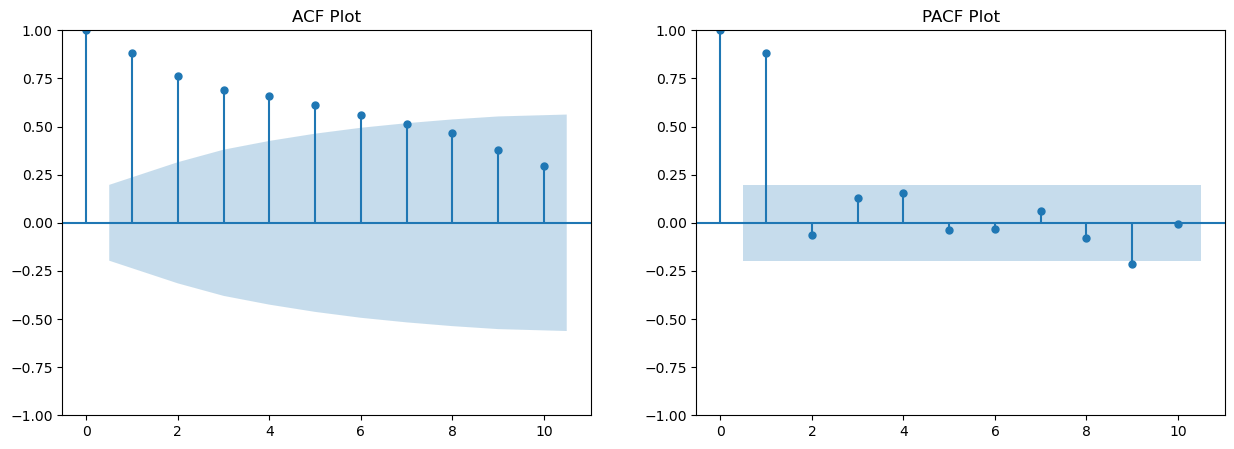

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Traders Generalist ARIMA MAE: 207813.32822716446, MSE: 78389439860.06812
Traders Generalist Adjusted Forecast MAE: 80.08149213143562, MSE: 9970.361620420608


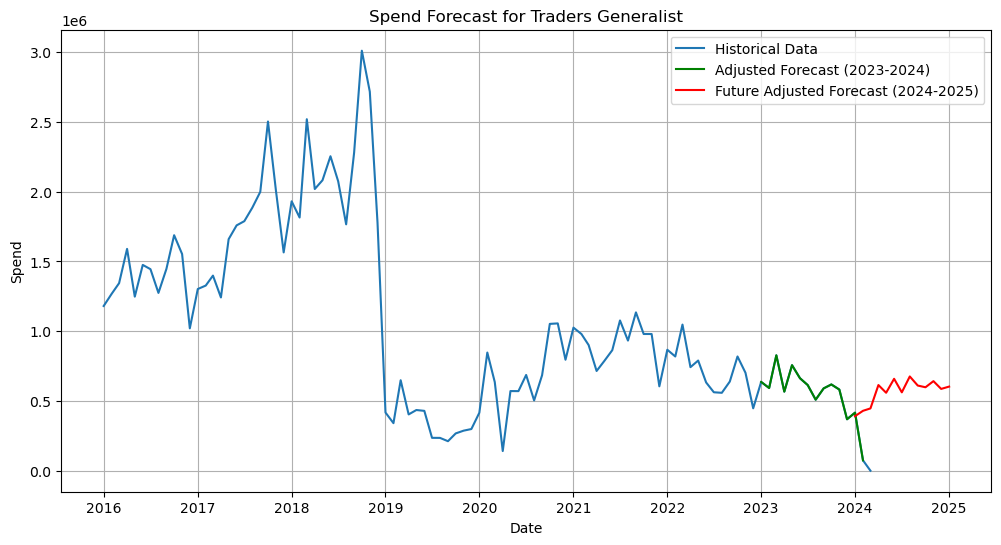

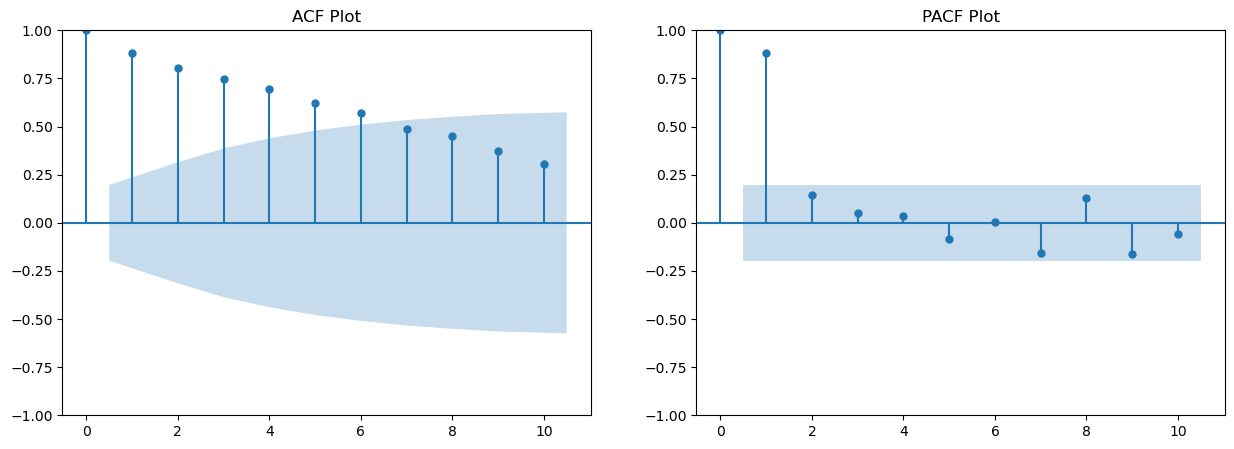

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Facilities Management Specialist ARIMA MAE: 66872.11057766214, MSE: 11030112616.12572
Facilities Management Specialist Adjusted Forecast MAE: 131.60785963082057, MSE: 24181.284707924206


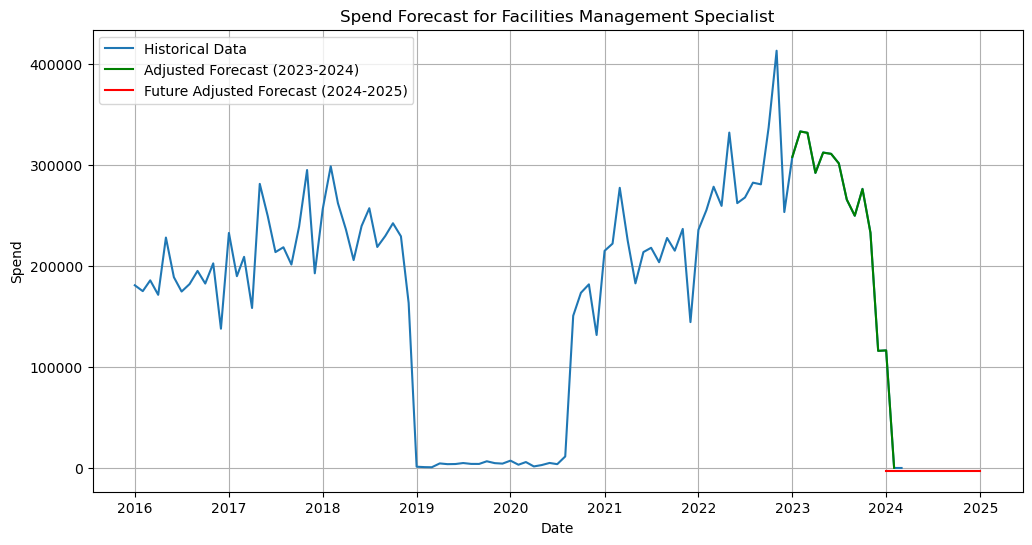

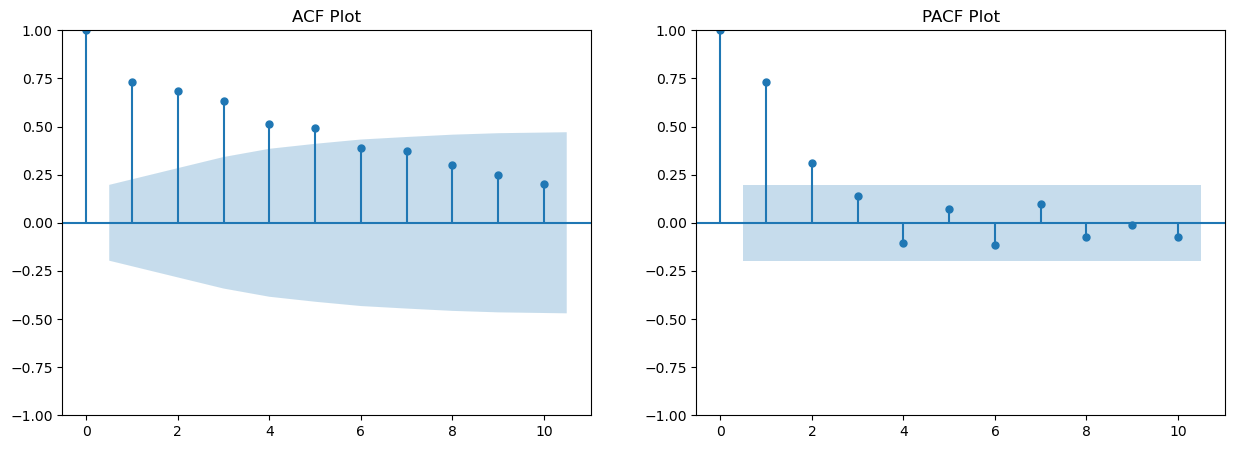

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Power Tool Specialist ARIMA MAE: 533492.0364630359, MSE: 410784403581.2567
Power Tool Specialist Adjusted Forecast MAE: 404.9572914008916, MSE: 250580.49779372648


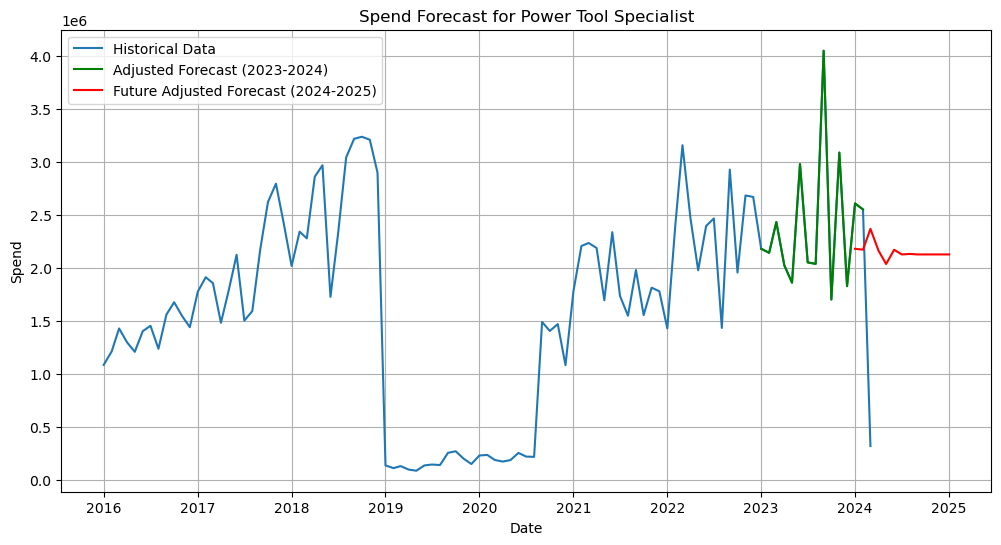

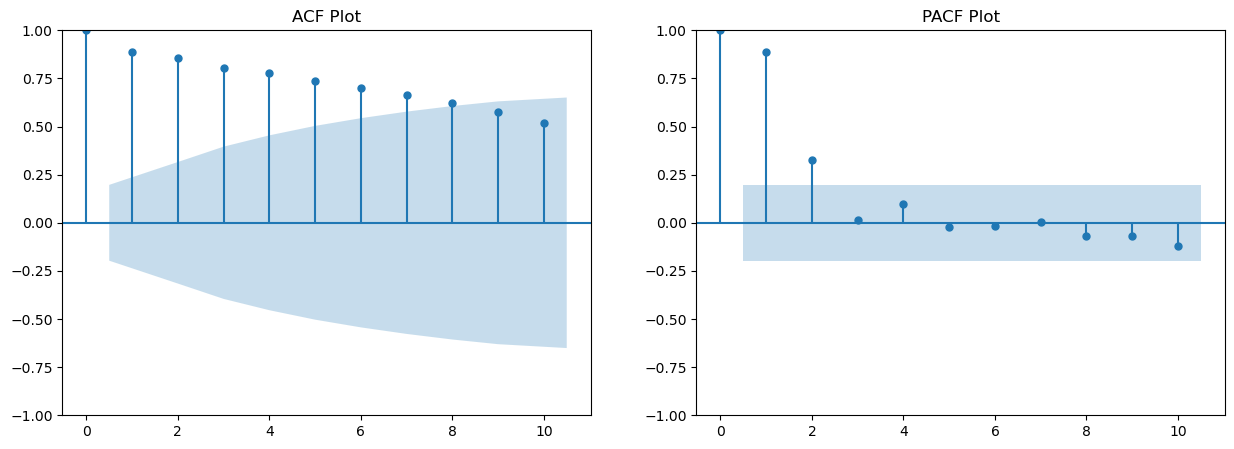

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Wholesaler ARIMA MAE: 48170.49826047639, MSE: 3342666901.789764
Wholesaler Adjusted Forecast MAE: 129.94638081298268, MSE: 22676.542837171623


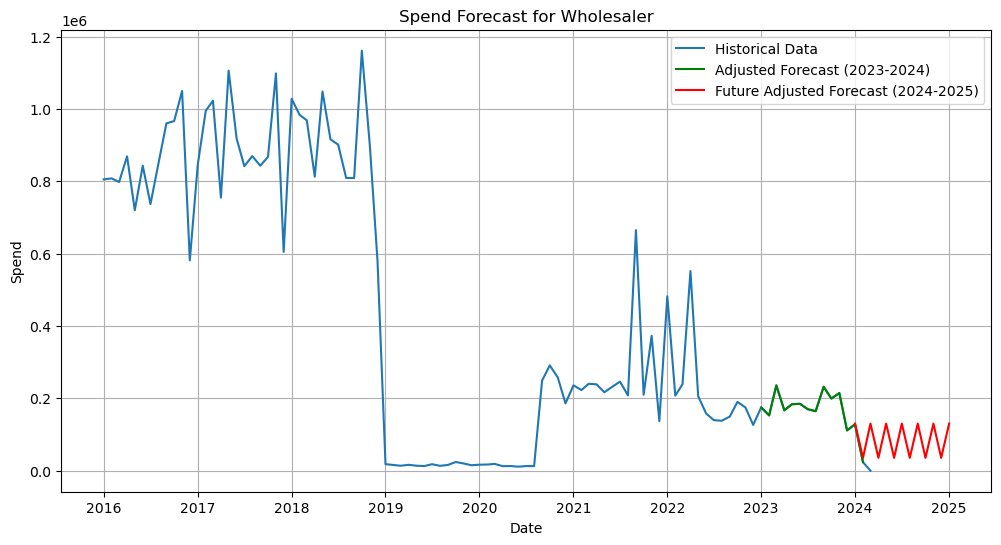

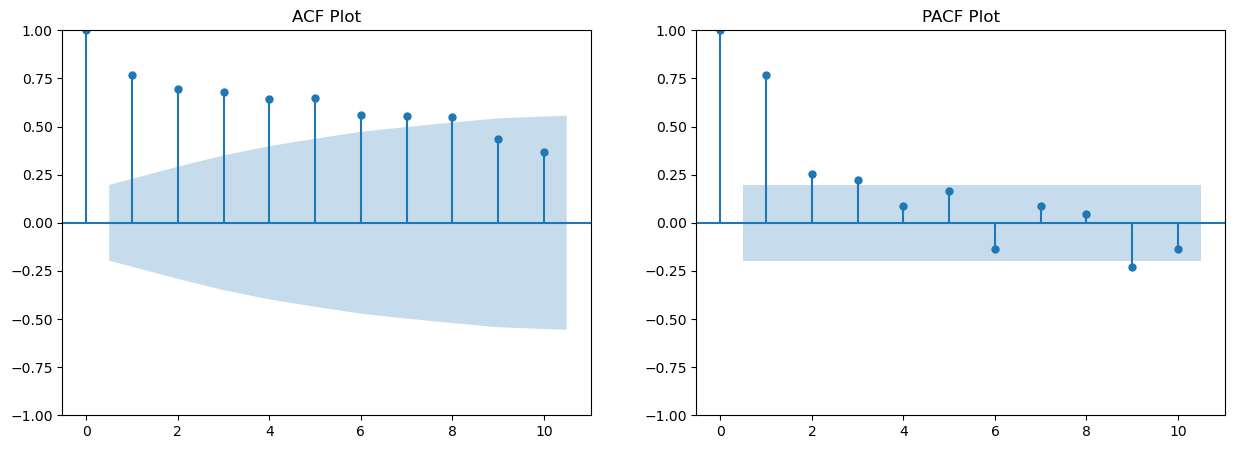

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Hire Company ARIMA MAE: 38842.19326081757, MSE: 2275227603.509842
Hire Company Adjusted Forecast MAE: 21.547045264581225, MSE: 596.0475665002438


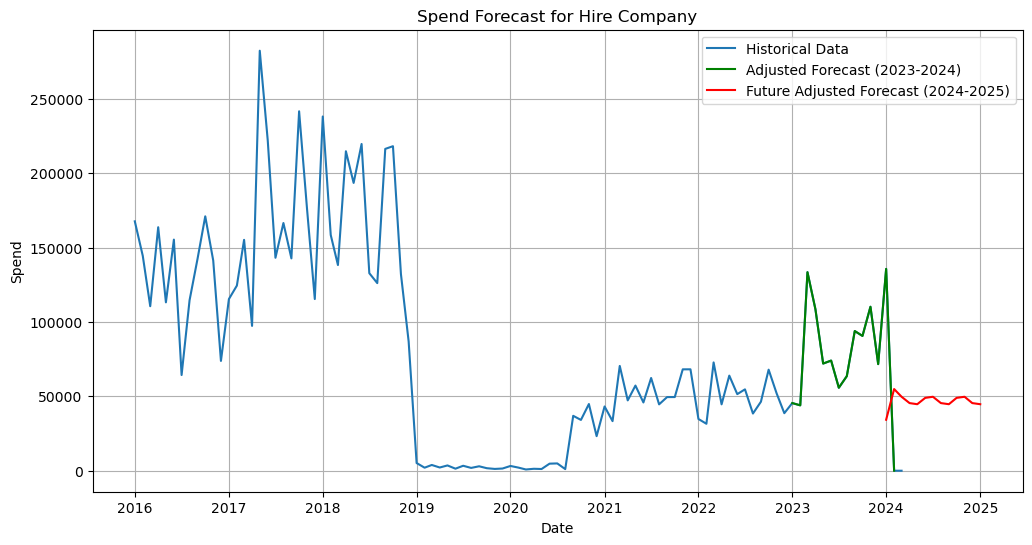

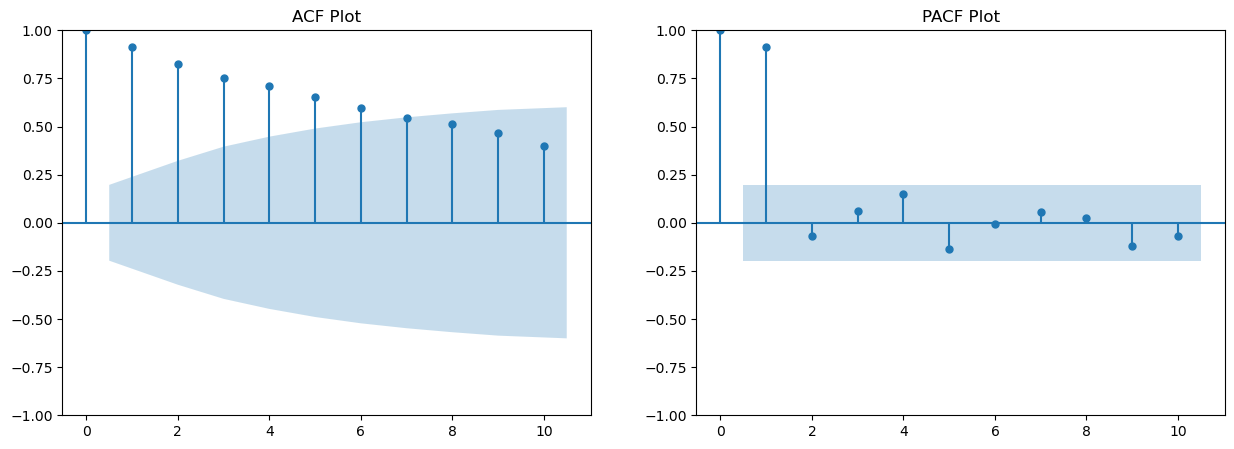

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

Cutting Tools Specialist ARIMA MAE: 102623.49140822455, MSE: 11747297984.365534
Cutting Tools Specialist Adjusted Forecast MAE: 20.72238918802473, MSE: 596.173524718005


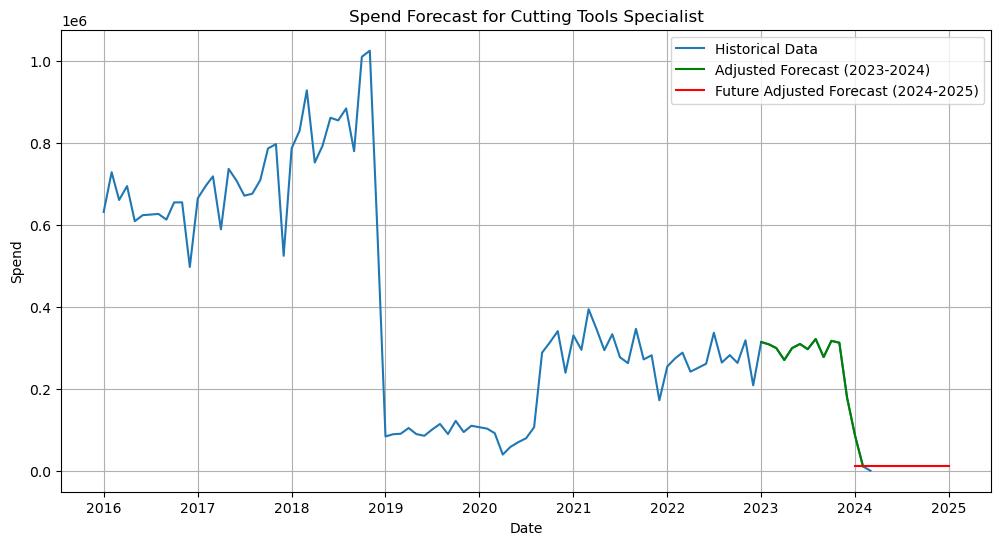

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

def plot_acf_pacf(data, lags=10):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    max_lags = min(lags, len(data) // 2 - 1)

    plot_acf(data, lags=max_lags, ax=axs[0])
    axs[0].set_title('ACF Plot')

    plot_pacf(data, lags=max_lags, ax=axs[1])
    axs[1].set_title('PACF Plot')

    plt.show()

# Assuming 'new_df' and 'sectors' are already defined
sector_forecasts = {}

# Filter for sectors that have data from 2016 to 2024
valid_sectors = []
for sector in sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]
    sector_dates = sector_data['YEAR_MONTH'].unique()

    if set(pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS')).issubset(set(pd.to_datetime(sector_dates))):
        valid_sectors.append(sector)

for sector in valid_sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]

    aggregated_spend = sector_data.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
    aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

    spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

    plot_acf_pacf(spend_data)

    train_data = spend_data[spend_data.index < '2023-01-01']
    test_data = spend_data[(spend_data.index >= '2023-01-01') & (spend_data.index < '2024-03-01')]

    p, d, q = 1, 1, 1  # Example values, adjust based on your data

    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()

    # Forecast for the period 2023-2024
    forecast = model_fit.forecast(steps=len(test_data))
    residuals = test_data.values - forecast

    X_train_gb = pd.DataFrame({
        'arima_forecast': forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values,
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values,
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values
    })

    y_train_gb = residuals

    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_regressor.fit(X_train_gb, y_train_gb)

    residual_correction = gb_regressor.predict(X_train_gb)
    adjusted_forecast = forecast + residual_correction

    mae_arima = mean_absolute_error(test_data, forecast)
    mse_arima = mean_squared_error(test_data, forecast)  # Fix: pass both true values and forecast
    mae_adjusted = mean_absolute_error(test_data, adjusted_forecast)
    mse_adjusted = mean_squared_error(test_data, adjusted_forecast)

    print(f'{sector} ARIMA MAE: {mae_arima}, MSE: {mse_arima}')
    print(f'{sector} Adjusted Forecast MAE: {mae_adjusted}, MSE: {mse_adjusted}')

    # Forecast future (2024-2025) using the combined model
    forecast_start = '2024-01-01'
    forecast_end = '2025-01-01'
    future_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

    arima_future_forecast = []
    future_residuals = residuals.copy()

    for i in range(len(future_index)):
        arima_next = model_fit.forecast(steps=1).iloc[0]
        arima_future_forecast.append(arima_next)

        X_next_gb = pd.DataFrame({
            'arima_forecast': [arima_next],
            'lagged_residual_1': [future_residuals.iloc[-1]],
            'lagged_residual_2': [future_residuals.iloc[-2] if len(future_residuals) > 1 else 0],
            'rolling_mean_residual_3': [future_residuals[-3:].mean()]
        })

        residual_correction = gb_regressor.predict(X_next_gb)[0]
        adjusted_forecast_value = arima_next + residual_correction

        future_residuals = pd.concat([future_residuals, pd.Series([residual_correction])])

        arima_future_forecast[-1] = adjusted_forecast_value

    plt.figure(figsize=(12, 6))
    plt.plot(spend_data, label='Historical Data')
    plt.plot(test_data.index, adjusted_forecast, label='Adjusted Forecast (2023-2024)', color='green')
    plt.plot(future_index, arima_future_forecast, label='Future Adjusted Forecast (2024-2025)', color='red')
    plt.title(f'Spend Forecast for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()


In [56]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

**proceding with approch using gradient boosting as previously it gave good results**

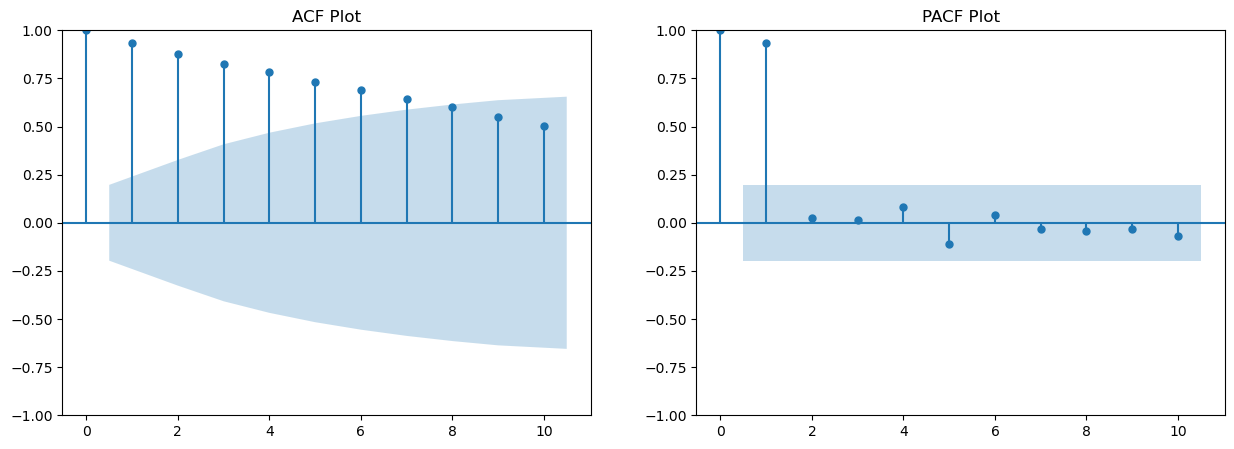

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

Industrial Distribution ARIMA MAE: 127470.36598718716, MSE: 24210255368.53977
Industrial Distribution Adjusted Forecast MAE: 82.69476256733677, MSE: 8618.93528366444


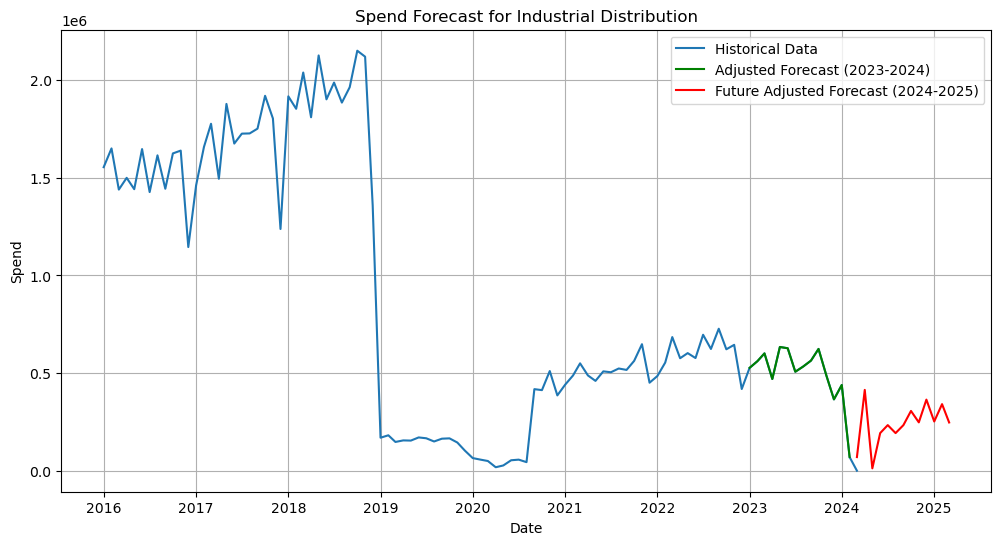

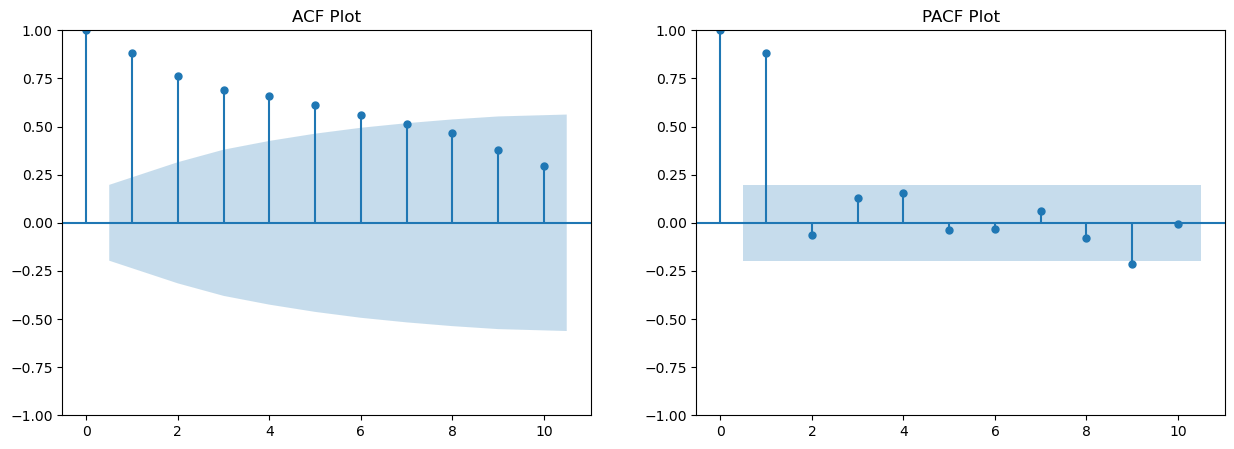

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\AppData\Local\Temp\ipykernel_26252\2660356588.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_future_forecast.append(adjusted_forecast[-1])
C:\Users\kunal\AppData\Local

Traders Generalist ARIMA MAE: 207813.32822716446, MSE: 78389439860.06812
Traders Generalist Adjusted Forecast MAE: 80.08149213143562, MSE: 9970.361620420608


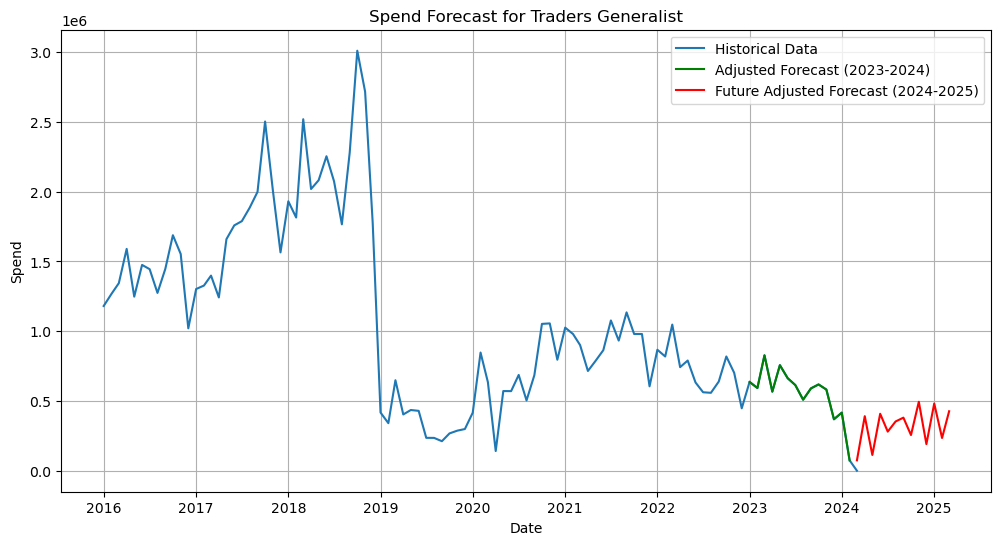

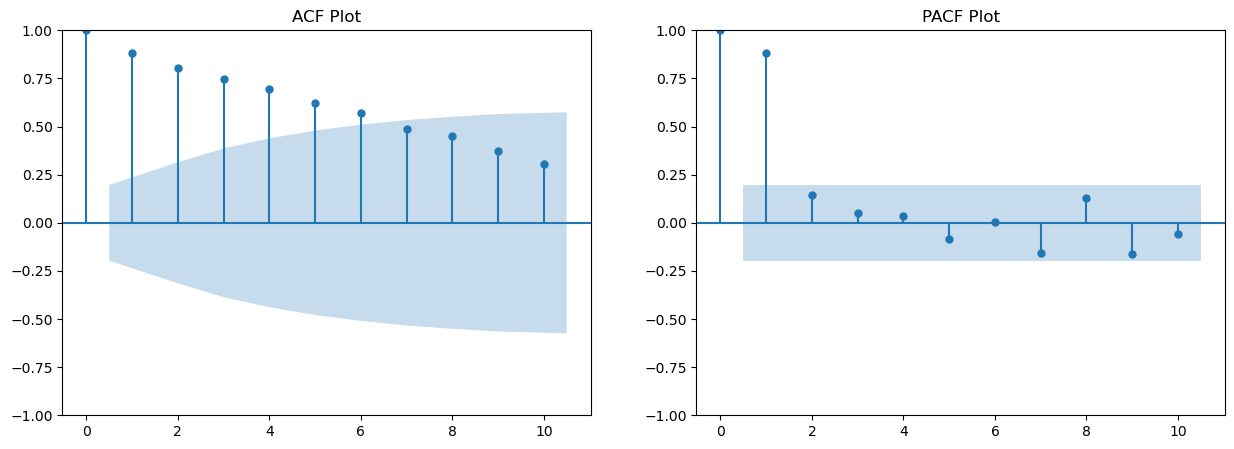

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\AppData\Local\Temp\ipykernel_26252\2660356588.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_future_forecast.append(adjusted_forecast[-1])
C:\Users\kunal\AppData\Local

Facilities Management Specialist ARIMA MAE: 66872.11057766214, MSE: 11030112616.12572
Facilities Management Specialist Adjusted Forecast MAE: 131.60785963082057, MSE: 24181.284707924206


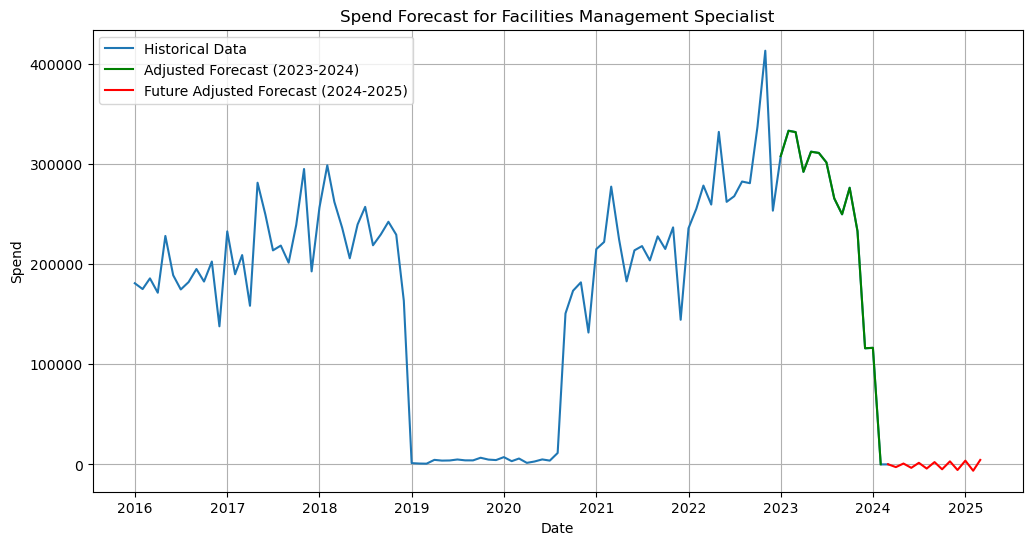

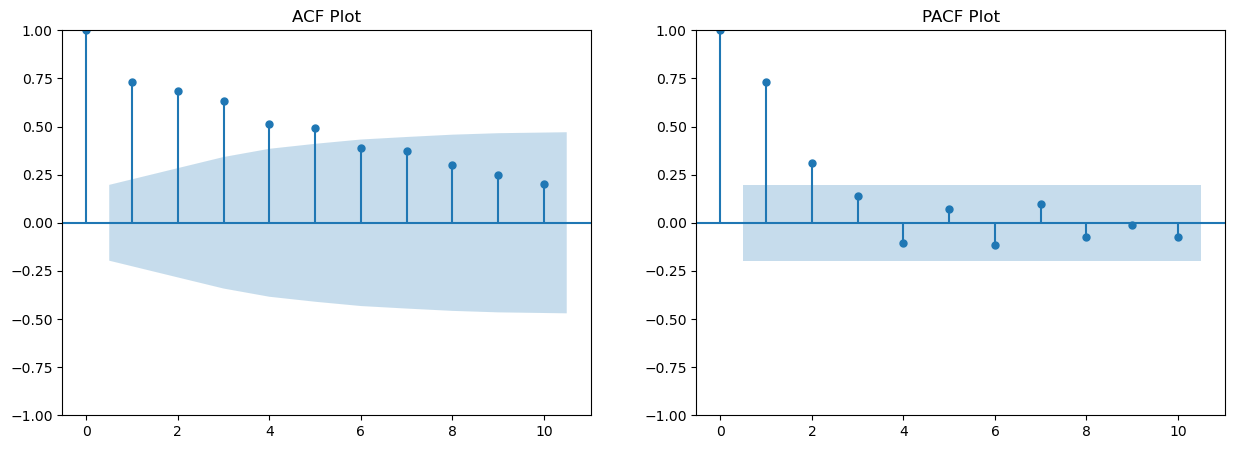

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\AppData\Local\Temp\ipykernel_26252\2660356588.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_future_forecast.append(adjusted_forecast[-1])
C:\Users\kunal\AppData\Local

Power Tool Specialist ARIMA MAE: 533492.0364630359, MSE: 410784403581.2567
Power Tool Specialist Adjusted Forecast MAE: 404.9572914008916, MSE: 250580.49779372648


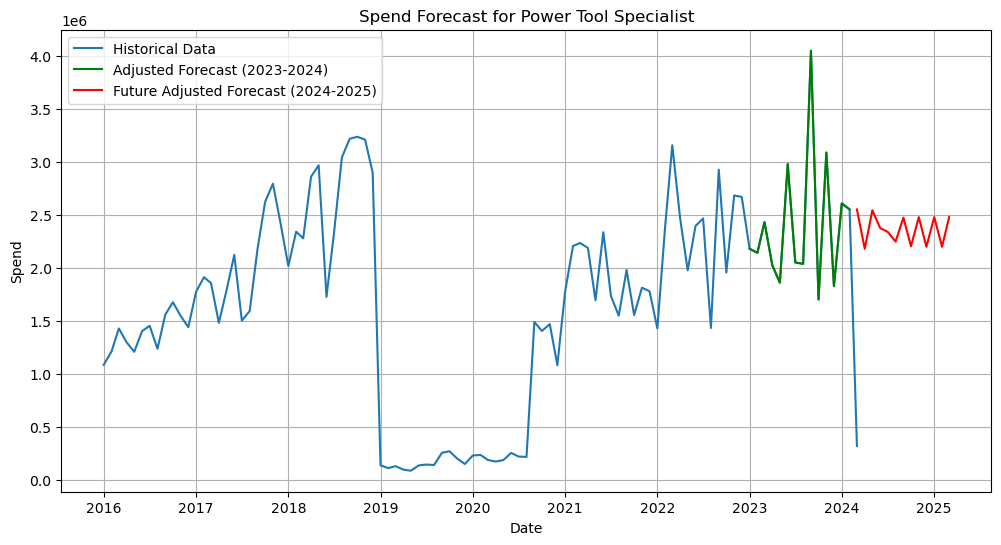

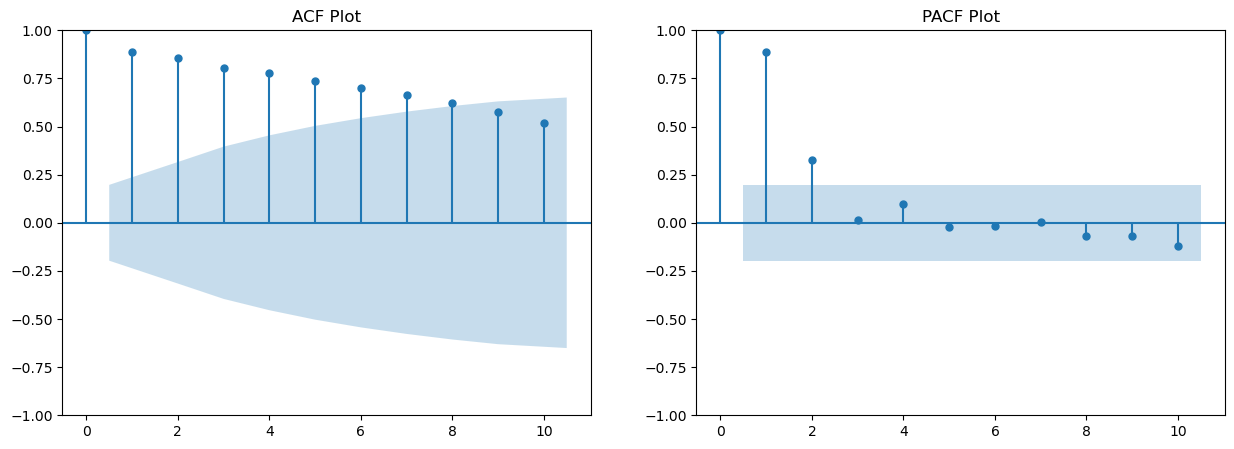

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\AppData\Local\Temp\ipykernel_26252\2660356588.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_future_forecast.append(adjusted_forecast[-1])
C:\Users\kunal\AppData\Local

Wholesaler ARIMA MAE: 48170.49826047639, MSE: 3342666901.789764
Wholesaler Adjusted Forecast MAE: 129.94638081298268, MSE: 22676.542837171623


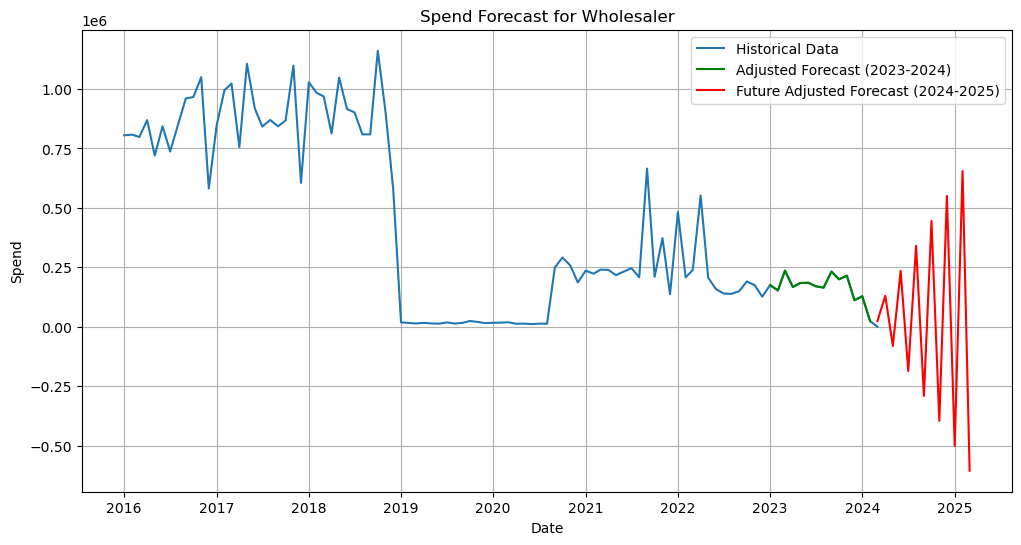

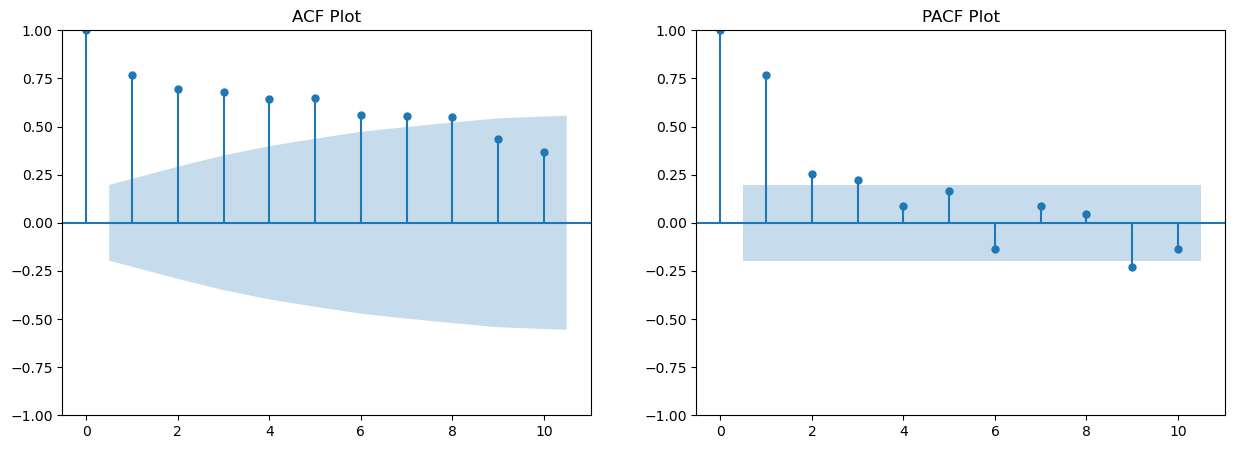

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\AppData\Local\Temp\ipykernel_26252\2660356588.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_future_forecast.append(adjusted_forecast[-1])
C:\Users\kunal\AppData\Local

Hire Company ARIMA MAE: 38842.19326081757, MSE: 2275227603.509842
Hire Company Adjusted Forecast MAE: 21.547045264581225, MSE: 596.0475665002438


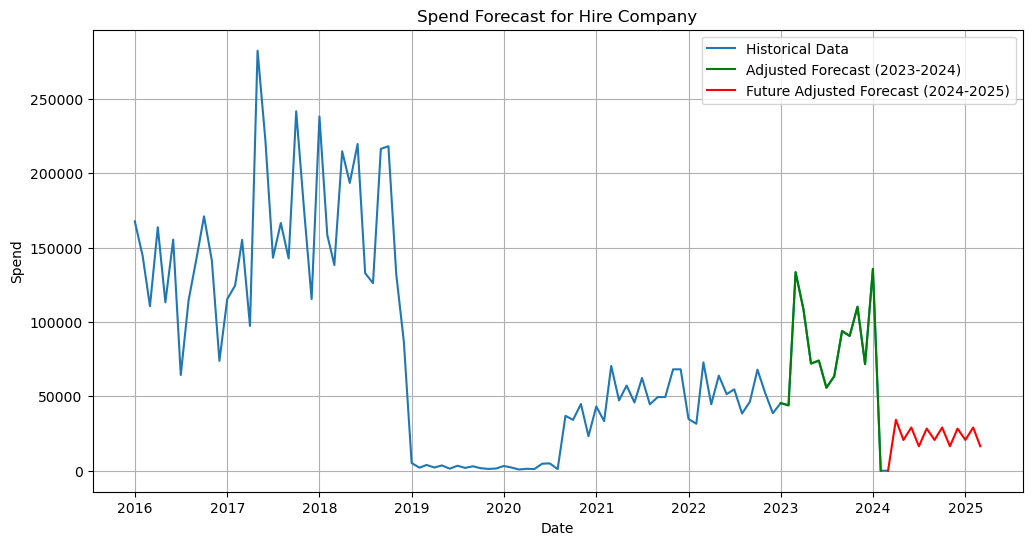

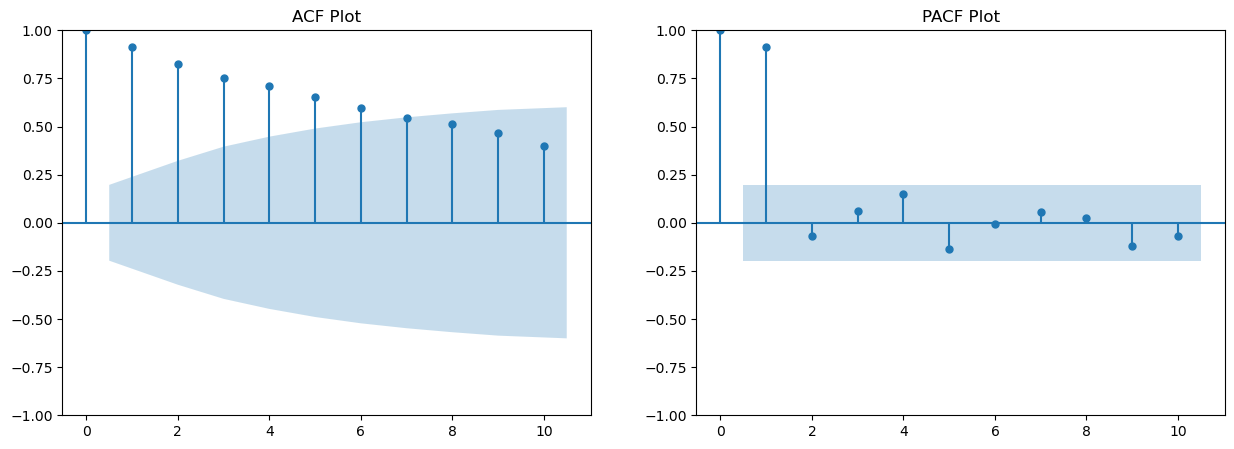

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

Cutting Tools Specialist ARIMA MAE: 102623.49140822455, MSE: 11747297984.365534
Cutting Tools Specialist Adjusted Forecast MAE: 20.72238918802473, MSE: 596.173524718005


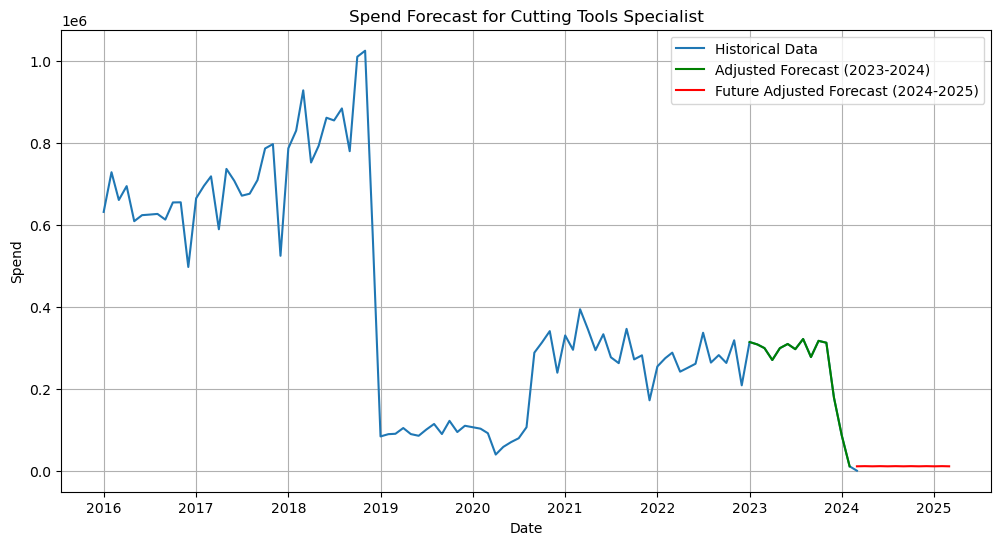

In [57]:


def plot_acf_pacf(data, lags=10):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    max_lags = min(lags, len(data) // 2 - 1)

    plot_acf(data, lags=max_lags, ax=axs[0])
    axs[0].set_title('ACF Plot')

    plot_pacf(data, lags=max_lags, ax=axs[1])
    axs[1].set_title('PACF Plot')

    plt.show()

sector_forecasts = []

valid_sectors = []
for sector in sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]
    sector_dates = sector_data['YEAR_MONTH'].unique()

    if set(pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS')).issubset(set(pd.to_datetime(sector_dates))):
        valid_sectors.append(sector)

for sector in valid_sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]

    aggregated_spend = sector_data.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
    aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)

    spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

    plot_acf_pacf(spend_data)

    train_data = spend_data[spend_data.index < '2023-01-01']
    test_data = spend_data[(spend_data.index >= '2023-01-01') & (spend_data.index < '2024-03-01')]

    p, d, q = 1, 1, 1

    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test_data))
    residuals = test_data.values - forecast

    X_train_gb = pd.DataFrame({
        'arima_forecast': forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values,
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values,
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values
    })

    y_train_gb = residuals

    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_regressor.fit(X_train_gb, y_train_gb)

    residual_correction = gb_regressor.predict(X_train_gb)
    adjusted_forecast = forecast + residual_correction

    mae_arima = mean_absolute_error(test_data, forecast)
    mse_arima = mean_squared_error(test_data, forecast)
    mae_adjusted = mean_absolute_error(test_data, adjusted_forecast)
    mse_adjusted = mean_squared_error(test_data, adjusted_forecast)

    mae_percentage = (mae_adjusted / test_data.mean()) * 100

    sector_forecasts.append({
        'Sector': sector,
        'ARIMA_MAE': mae_arima,
        'ARIMA_MSE': mse_arima,
        'Adjusted_MAE': mae_adjusted,
        'Adjusted_MSE': mse_adjusted,
        'MAE_Percentage': mae_percentage
    })

    print(f'{sector} ARIMA MAE: {mae_arima}, MSE: {mse_arima}')
    print(f'{sector} Adjusted Forecast MAE: {mae_adjusted}, MSE: {mse_adjusted}')

    forecast_start = '2024-03-01'
    forecast_end = '2025-03-01'
    future_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

    arima_future_forecast = []
    future_residuals = residuals.copy()

    arima_future_forecast.append(adjusted_forecast[-1])

    for i in range(1, len(future_index)):
        arima_next = model_fit.forecast(steps=1).iloc[0]
        arima_next_adjusted = arima_next + adjusted_forecast[-1] - arima_future_forecast[-1]
        arima_future_forecast.append(arima_next_adjusted)

        X_next_gb = pd.DataFrame({
            'arima_forecast': [arima_next_adjusted],
            'lagged_residual_1': [future_residuals.iloc[-1]],
            'lagged_residual_2': [future_residuals.iloc[-2] if len(future_residuals) > 1 else 0],
            'rolling_mean_residual_3': [future_residuals[-3:].mean()]
        })

        residual_correction = gb_regressor.predict(X_next_gb)[0]
        adjusted_forecast_value = arima_next_adjusted + residual_correction

        future_residuals = pd.concat([future_residuals, pd.Series([residual_correction])])

        arima_future_forecast[-1] = adjusted_forecast_value

    plt.figure(figsize=(12, 6))
    plt.plot(spend_data, label='Historical Data')
    plt.plot(test_data.index, adjusted_forecast, label='Adjusted Forecast (2023-2024)', color='green')
    plt.plot(future_index, arima_future_forecast, label='Future Adjusted Forecast (2024-2025)', color='red')
    plt.title(f'Spend Forecast for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()

forecast_results_df = pd.DataFrame(sector_forecasts)



while the MAE scores looks Exaggerated we have converted the MAE in percentage as some of spends are in thousandes

Formula

MAE Percentage=( MAE /
Mean of Actual Values
MAE
​
 )×100

In [58]:
forecast_results_df

Sector      ARIMA_MAE     ARIMA_MSE  \
0           Industrial Distribution  127470.365987  2.421026e+10   
1                Traders Generalist  207813.328227  7.838944e+10   
2  Facilities Management Specialist   66872.110578  1.103011e+10   
3             Power Tool Specialist  533492.036463  4.107844e+11   
4                        Wholesaler   48170.498260  3.342667e+09   
5                      Hire Company   38842.193261  2.275228e+09   
6          Cutting Tools Specialist  102623.491408  1.174730e+10   

   Adjusted_MAE   Adjusted_MSE  MAE_Percentage  
0     82.694763    8618.935284        0.016519  
1     80.081492    9970.361620        0.014339  
2    131.607860   24181.284708        0.053409  
3    404.957291  250580.497794        0.016919  
4    129.946381   22676.542837        0.077609  
5     21.547045     596.047567        0.027451  
6     20.722389     596.173525        0.008052

In [59]:
from statsmodels.tsa.stattools import pacf, acf


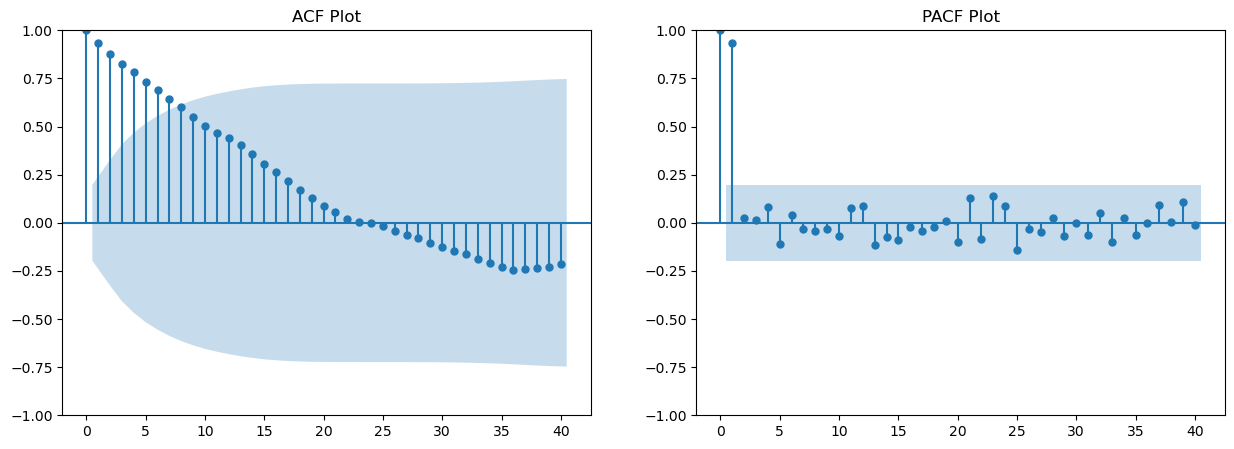

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

Industrial Distribution ARIMA MAE: 446762.86868613923, MSE: 234788161299.0359
Industrial Distribution Adjusted Forecast MAE: 40.149399658388575, MSE: 2168.7160643733027


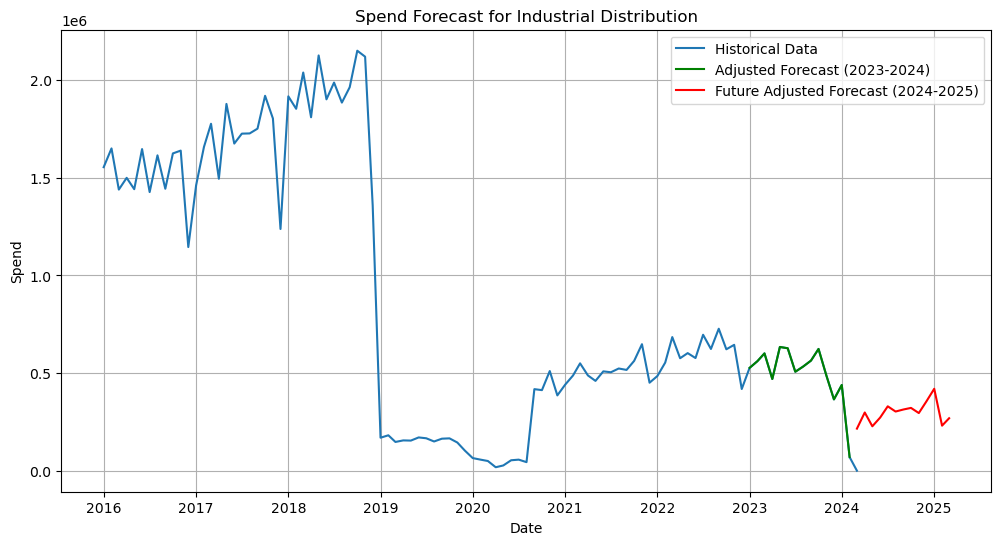

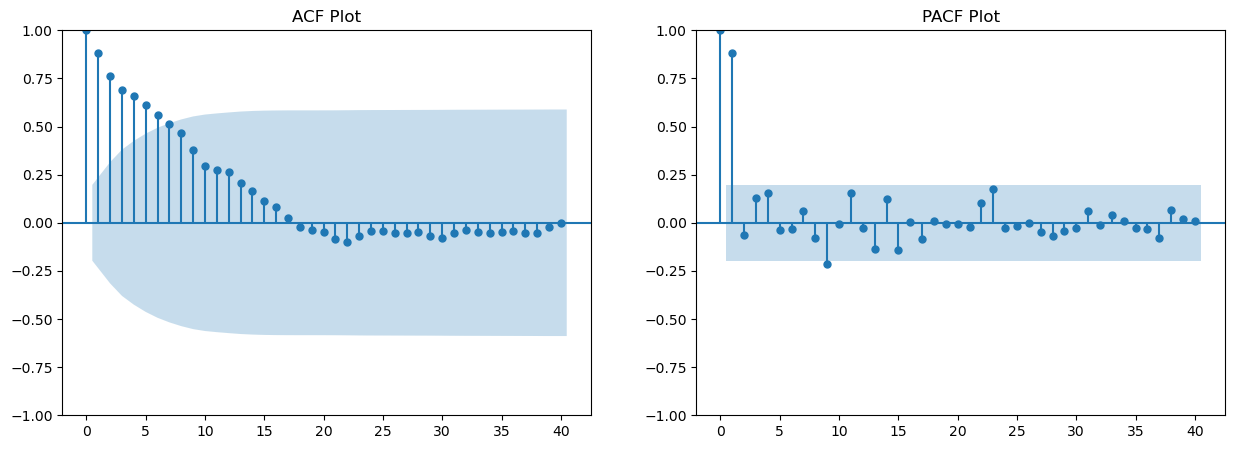

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

Traders Generalist ARIMA MAE: 498581.032527035, MSE: 286945141442.16345
Traders Generalist Adjusted Forecast MAE: 14.198924685297243, MSE: 338.31451805458084


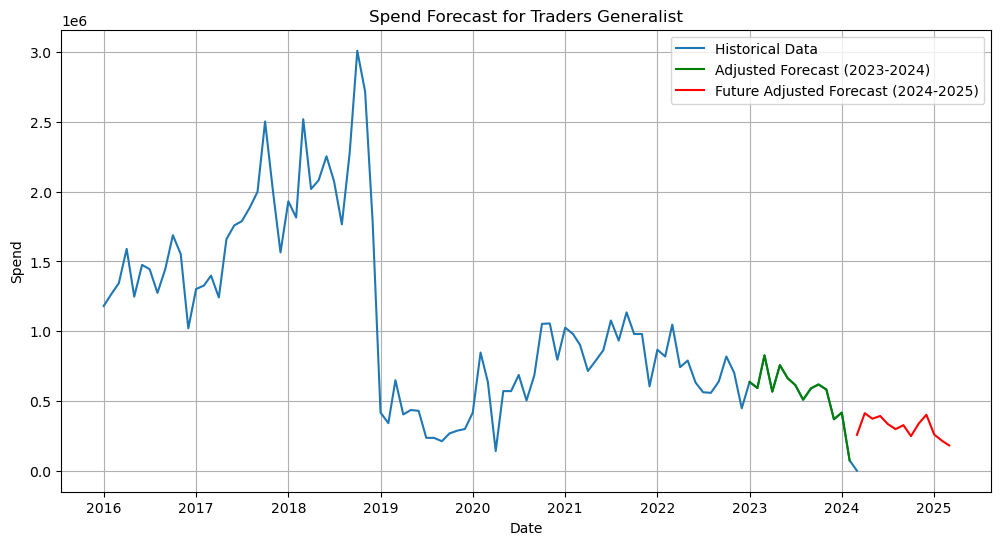

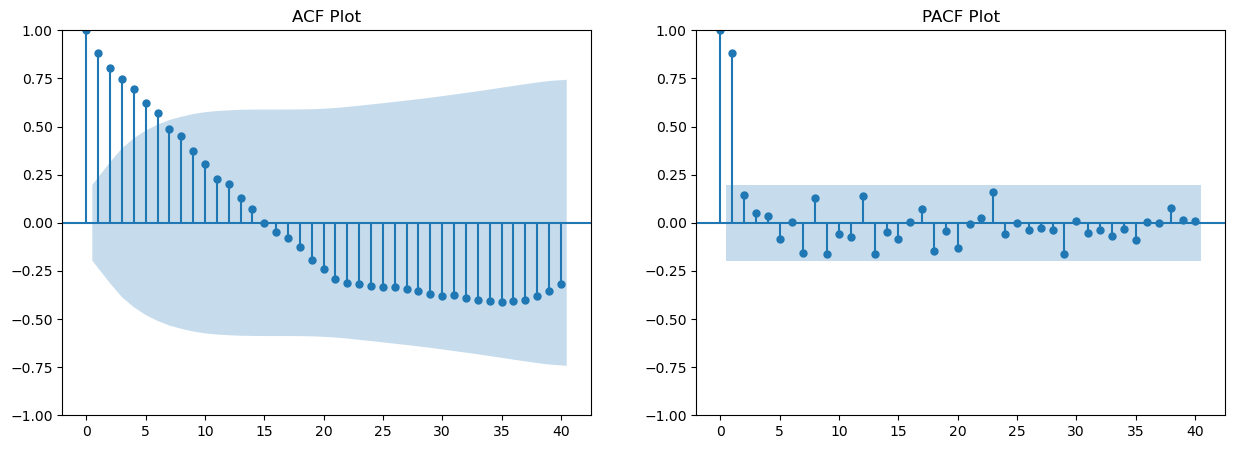

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Facilities Management Specialist ARIMA MAE: 345938.4158655978, MSE: 125764512455.80354
Facilities Management Specialist Adjusted Forecast MAE: 28.878768852372428, MSE: 1145.6696566128983


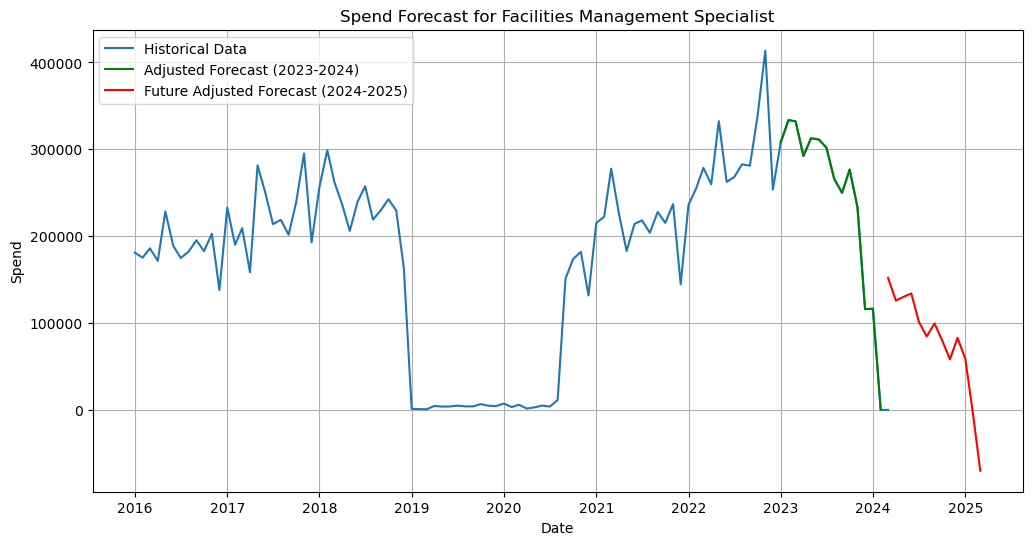

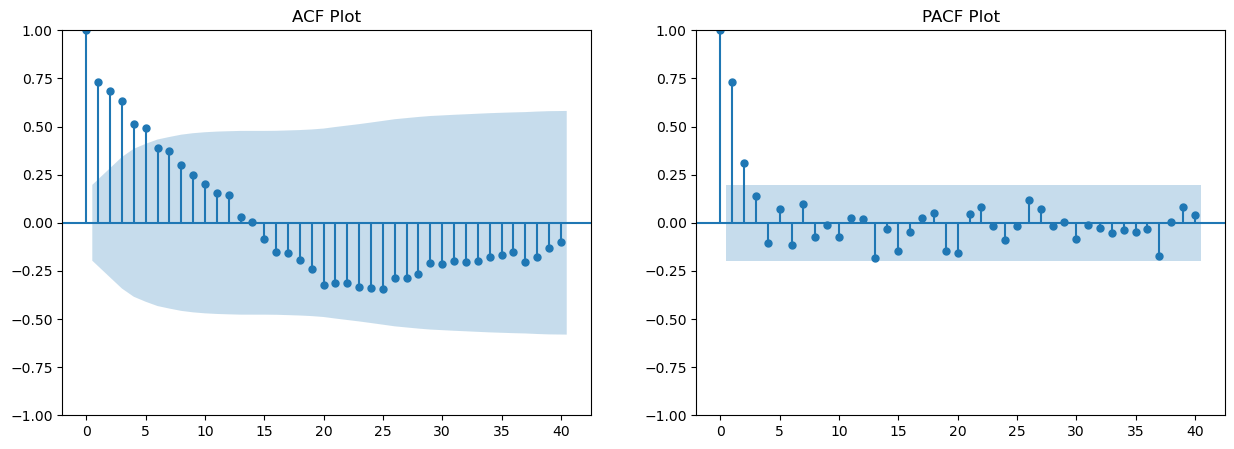

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Power Tool Specialist ARIMA MAE: 930279.8490410426, MSE: 1239574655238.285
Power Tool Specialist Adjusted Forecast MAE: 919.4837948984599, MSE: 1079758.1751182803


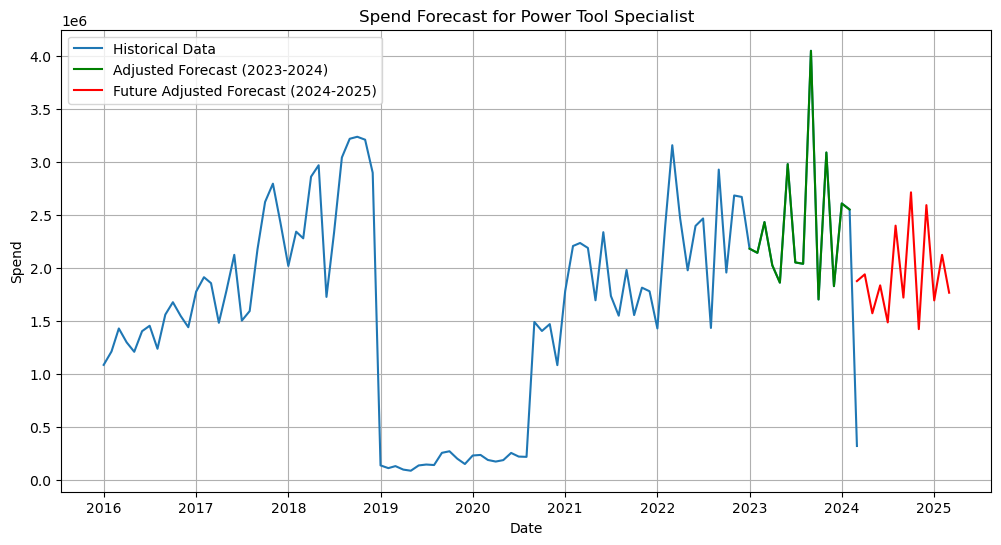

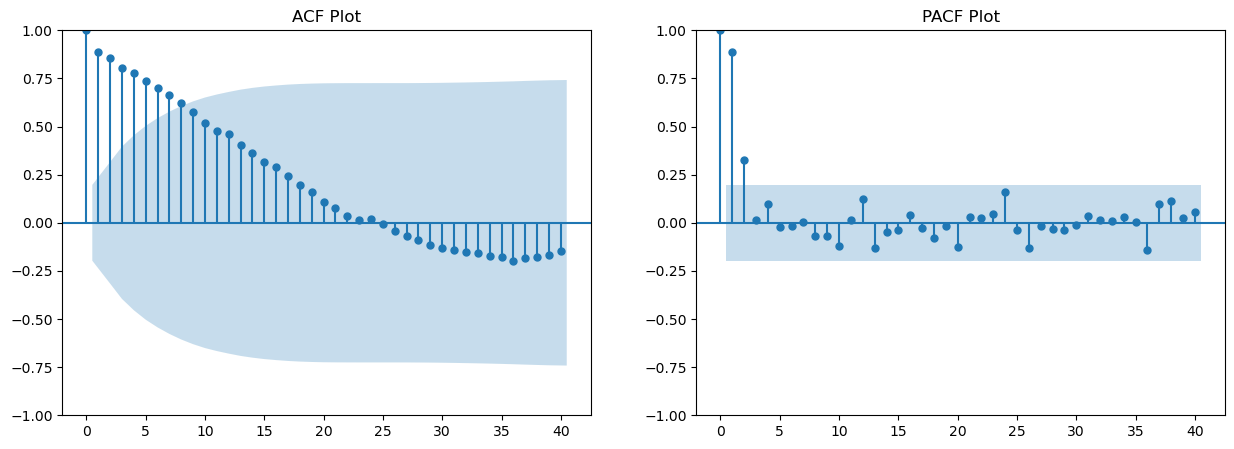

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

Wholesaler ARIMA MAE: 181688.70824565724, MSE: 41382634327.39759
Wholesaler Adjusted Forecast MAE: 15.825119015250623, MSE: 389.73446741800745


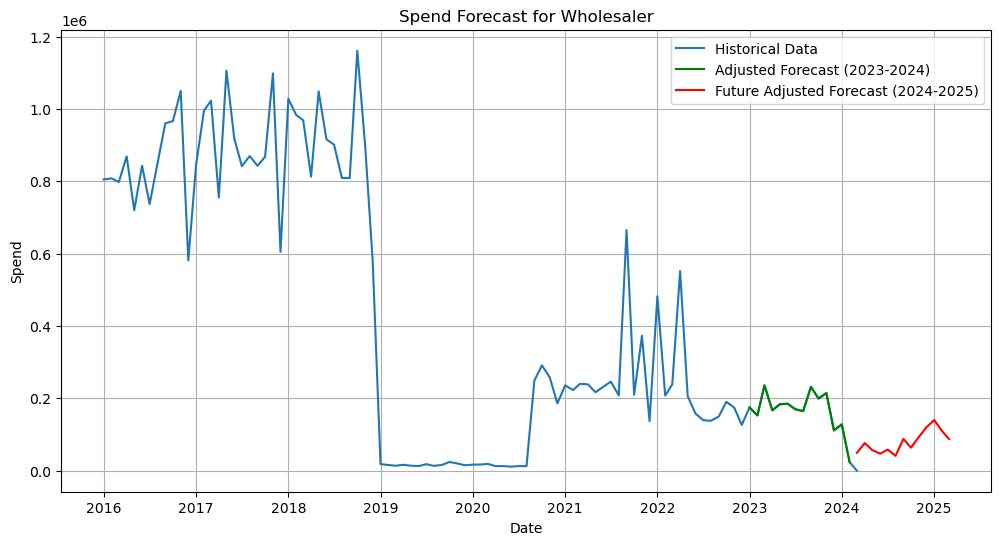

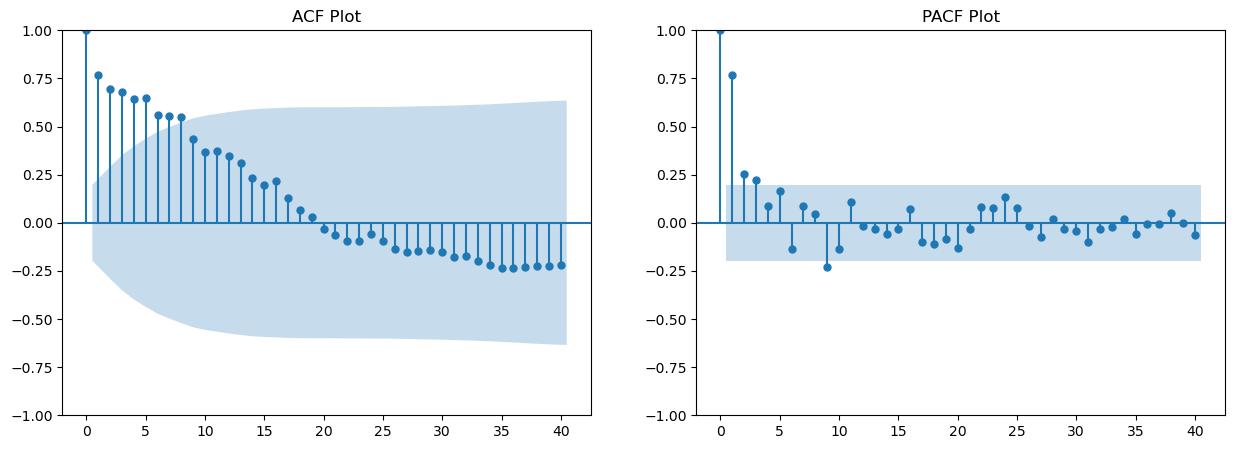

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hire Company ARIMA MAE: 50021.715073999134, MSE: 3484821768.5913606
Hire Company Adjusted Forecast MAE: 30.772150193017296, MSE: 1493.8368019505076


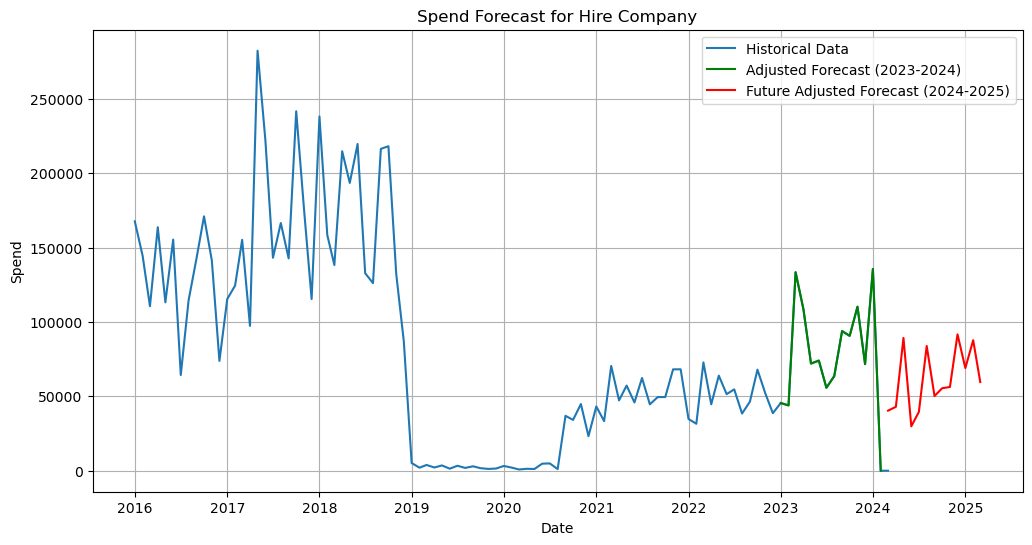

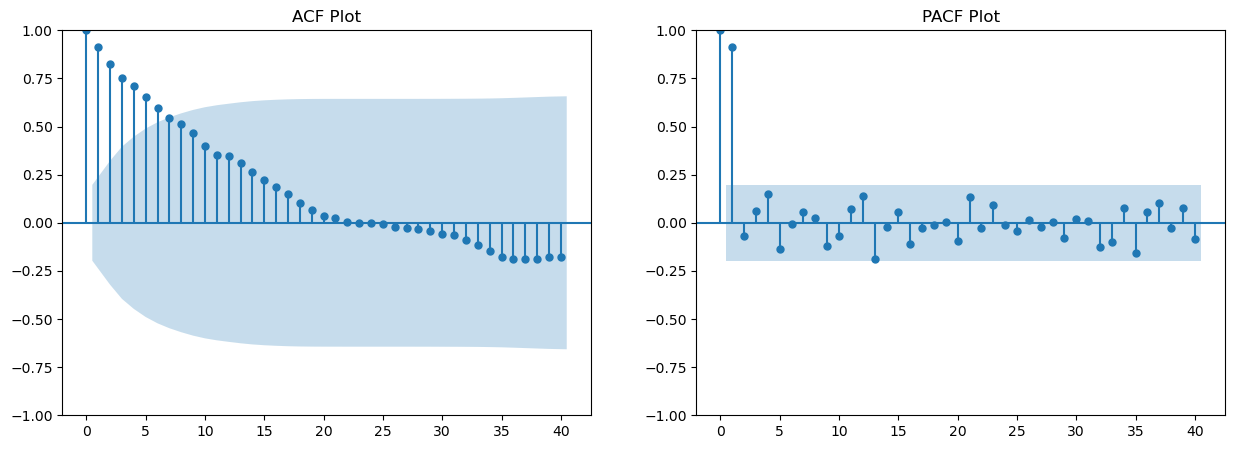

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Cutting Tools Specialist ARIMA MAE: 200380.98572758128, MSE: 45748732585.915596
Cutting Tools Specialist Adjusted Forecast MAE: 31.20098628686979, MSE: 1309.0088959992408


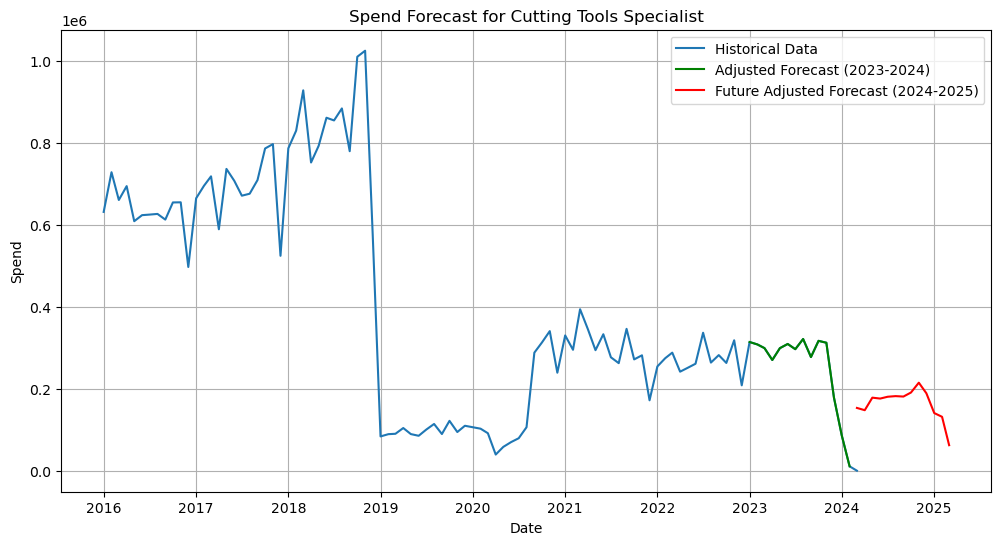

                                      ARIMA_MAE     ARIMA_MSE  Adjusted_MAE  \
Industrial Distribution           446762.868686  2.347882e+11     40.149400   
Traders Generalist                498581.032527  2.869451e+11     14.198925   
Facilities Management Specialist  345938.415866  1.257645e+11     28.878769   
Power Tool Specialist             930279.849041  1.239575e+12    919.483795   
Wholesaler                        181688.708246  4.138263e+10     15.825119   
Hire Company                       50021.715074  3.484822e+09     30.772150   
Cutting Tools Specialist          200380.985728  4.574873e+10     31.200986   

                                  Adjusted_MSE  MAE_Percentage  \
Industrial Distribution           2.168716e+03        0.008020   
Traders Generalist                3.383145e+02        0.002542   
Facilities Management Specialist  1.145670e+03        0.011720   
Power Tool Specialist             1.079758e+06        0.038416   
Wholesaler                        3.8

In [60]:
# Filtering valid sectors
sectors = new_df['SECTOR_1'].unique()
valid_sectors = []
for sector in sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]
    sector_dates = sector_data['YEAR_MONTH'].unique()

    required_dates = set(pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS'))
    if required_dates.issubset(set(sector_dates)):
        valid_sectors.append(sector)

# Function to determine d based on ADF test
def estimate_d(timeseries):
    d = 0
    result = adfuller(timeseries, autolag='AIC')
    while result[1] > 0.05 and d < 2:  # p-value > 0.05 suggests non-stationarity
        d += 1
        result = adfuller(np.diff(timeseries, n=d), autolag='AIC')
    return d

# Function to plot ACF and PACF and return suggested p, d, q values
def estimate_pq(data, lags=40):
    max_lags = min(lags, len(data) // 2 - 1)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    plot_acf(data, lags=max_lags, ax=axs[0])
    plot_pacf(data, lags=max_lags, ax=axs[1])

    axs[0].set_title('ACF Plot')
    axs[1].set_title('PACF Plot')

    plt.show()

    d = estimate_d(data)

    pacf_vals = pacf(data, nlags=max_lags)
    acf_vals = acf(data, nlags=max_lags)

    p = np.where(np.abs(pacf_vals) < 0.2)[0][0] if np.any(np.abs(pacf_vals) < 0.2) else 1
    q = np.where(np.abs(acf_vals) < 0.2)[0][0] if np.any(np.abs(acf_vals) < 0.2) else 1

    return p, d, q

# Assuming 'new_df' and 'sectors' are already defined
sector_forecasts = {}

# Main analysis loop
for sector in valid_sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]
    aggregated_spend = sector_data.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
    aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)
    spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

    p, d, q = estimate_pq(spend_data)

    model = ARIMA(spend_data, order=(p, d, q))
    model_fit = model.fit()

    # Forecast and residual calculation
    train_data = spend_data[spend_data.index < '2023-01-01']
    test_data = spend_data[(spend_data.index >= '2023-01-01') & (spend_data.index < '2024-03-01')]

    forecast = model_fit.forecast(steps=len(test_data))
    residuals = test_data.values - forecast

    X_train_gb = pd.DataFrame({
        'arima_forecast': forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values,
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values,
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values
    })

    y_train_gb = residuals

    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_regressor.fit(X_train_gb, y_train_gb)

    # Apply full correction (100%) for test period
    residual_correction = gb_regressor.predict(X_train_gb)
    adjusted_forecast = forecast + residual_correction

    mae_arima = mean_absolute_error(test_data, forecast)
    mse_arima = mean_squared_error(test_data, forecast)
    mae_adjusted = mean_absolute_error(test_data, adjusted_forecast)
    mse_adjusted = mean_squared_error(test_data, adjusted_forecast)

    mae_percentage = (mae_adjusted / test_data.mean()) * 100

    # Store results for this sector
    sector_forecasts[sector] = {
        'ARIMA_MAE': mae_arima,
        'ARIMA_MSE': mse_arima,
        'Adjusted_MAE': mae_adjusted,
        'Adjusted_MSE': mse_adjusted,
        'MAE_Percentage': mae_percentage
    }

    print(f'{sector} ARIMA MAE: {mae_arima}, MSE: {mse_arima}')
    print(f'{sector} Adjusted Forecast MAE: {mae_adjusted}, MSE: {mse_adjusted}')

    # Future forecasting with partial residual correction
    forecast_start = '2024-03-01'
    forecast_end = '2025-03-01'
    future_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

    # Predict future using ARIMA
    arima_future_forecast = model_fit.forecast(steps=len(future_index))

    # Prepare data for Gradient Boosting future correction
    X_future_gb = pd.DataFrame({
        'arima_forecast': arima_future_forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values[-len(future_index):],
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values[-len(future_index):],
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values[-len(future_index):]
    }).fillna(0)

    # Predict the corrections and adjust the future forecast with 50% correction
    future_residual_correction = gb_regressor.predict(X_future_gb)
    correction_factor = 0.5  # Apply only 50% of the correction for future forecast
    future_adjusted_forecast = arima_future_forecast + correction_factor * future_residual_correction

    # Store the forecasts
    sector_forecasts[sector]['future_forecast'] = future_adjusted_forecast

    # Plot the historical data, ARIMA forecast, and adjusted forecast
    plt.figure(figsize=(12, 6))
    plt.plot(spend_data, label='Historical Data')
    plt.plot(test_data.index, adjusted_forecast, label='Adjusted Forecast (2023-2024)', color='green')
    plt.plot(future_index, future_adjusted_forecast, label='Future Adjusted Forecast (2024-2025)', color='red')
    plt.title(f'Spend Forecast for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display results as a DataFrame
forecast_results_df = pd.DataFrame.from_dict(sector_forecasts, orient='index')
print(forecast_results_df)

In [61]:
forecast_results_df.head()

ARIMA_MAE     ARIMA_MSE  Adjusted_MAE  \
Industrial Distribution           446762.868686  2.347882e+11     40.149400   
Traders Generalist                498581.032527  2.869451e+11     14.198925   
Facilities Management Specialist  345938.415866  1.257645e+11     28.878769   
Power Tool Specialist             930279.849041  1.239575e+12    919.483795   
Wholesaler                        181688.708246  4.138263e+10     15.825119   

                                  Adjusted_MSE  MAE_Percentage  \
Industrial Distribution           2.168716e+03        0.008020   
Traders Generalist                3.383145e+02        0.002542   
Facilities Management Specialist  1.145670e+03        0.011720   
Power Tool Specialist             1.079758e+06        0.038416   
Wholesaler                        3.897345e+02        0.009451   

                                                                    future_forecast  
Industrial Distribution           2024-04-01    215659.699856
2024-05-01    2982...  
Traders Generalist                2024-04-01    257312.966699
2024-05-01    4129...  
Facilities Management Specialist  2024-04-01    152032.739885
2024-05-01    1258...  
Power Tool Specialist             2024-04-01    1.873619e+06
2024-05-01    1.937...  
Wholesaler                        2024-04-01     49393.430167
2024-05-01     764...

In [62]:
# Create an empty list to hold individual DataFrames
all_sector_forecasts = []

# Loop through the sector forecasts
for sector, results in sector_forecasts.items():
    # Extract future forecast and corresponding dates
    future_forecast = results['future_forecast']
    future_dates = pd.date_range(start='2024-03-01', periods=len(future_forecast), freq='MS')

    # Create a DataFrame for this sector
    sector_df = pd.DataFrame({
        'Sector': sector,
        'Date': future_dates,
        'Predicted_Spend': future_forecast
    })

    # Append this sector's DataFrame to the list
    all_sector_forecasts.append(sector_df)

# Combine all sectors into one DataFrame
final_forecast_df = pd.concat(all_sector_forecasts, ignore_index=True)

# Display the final DataFrame
print(final_forecast_df)


                      Sector       Date  Predicted_Spend
0    Industrial Distribution 2024-03-01    215659.699856
1    Industrial Distribution 2024-04-01    298273.728169
2    Industrial Distribution 2024-05-01    227689.826816
3    Industrial Distribution 2024-06-01    272388.844220
4    Industrial Distribution 2024-07-01    329872.892279
..                       ...        ...              ...
86  Cutting Tools Specialist 2024-11-01    215048.291217
87  Cutting Tools Specialist 2024-12-01    189080.561173
88  Cutting Tools Specialist 2025-01-01    140856.935622
89  Cutting Tools Specialist 2025-02-01    131676.267652
90  Cutting Tools Specialist 2025-03-01     62327.851362

[91 rows x 3 columns]


# WithOut the Interpolation of missing months

Best ARIMA order for sector Industrial Distribution: p=0, d=1, q=0
Industrial Distribution ARIMA MAE: 500445.1957142856, MSE: 270234476785.97232
Industrial Distribution Adjusted Forecast MAE: 52.02005850947171, MSE: 4013.22407982618


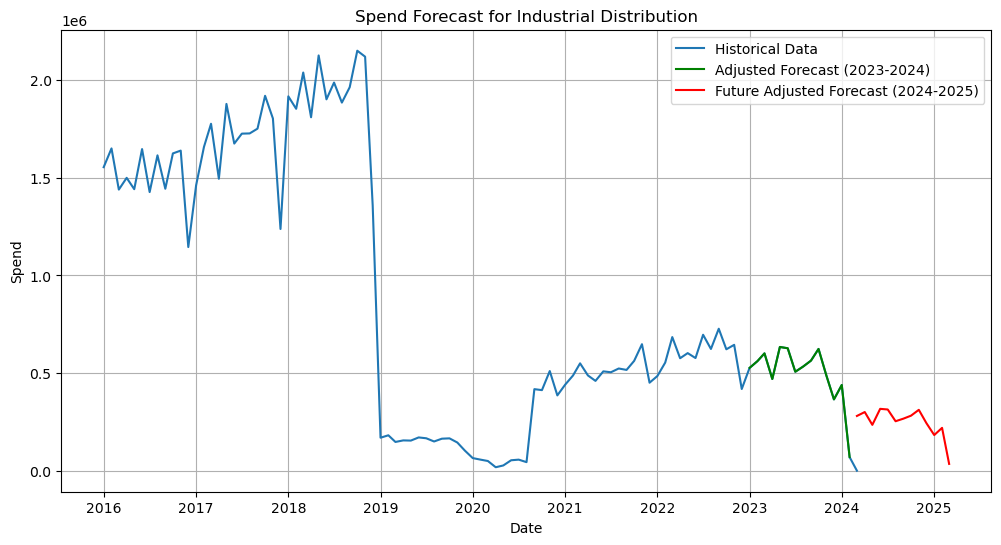

Best ARIMA order for sector Traders Generalist: p=0, d=1, q=0
Traders Generalist ARIMA MAE: 558120.6735714286, MSE: 342264901376.4819
Traders Generalist Adjusted Forecast MAE: 226.01122584560238, MSE: 67638.30742269452


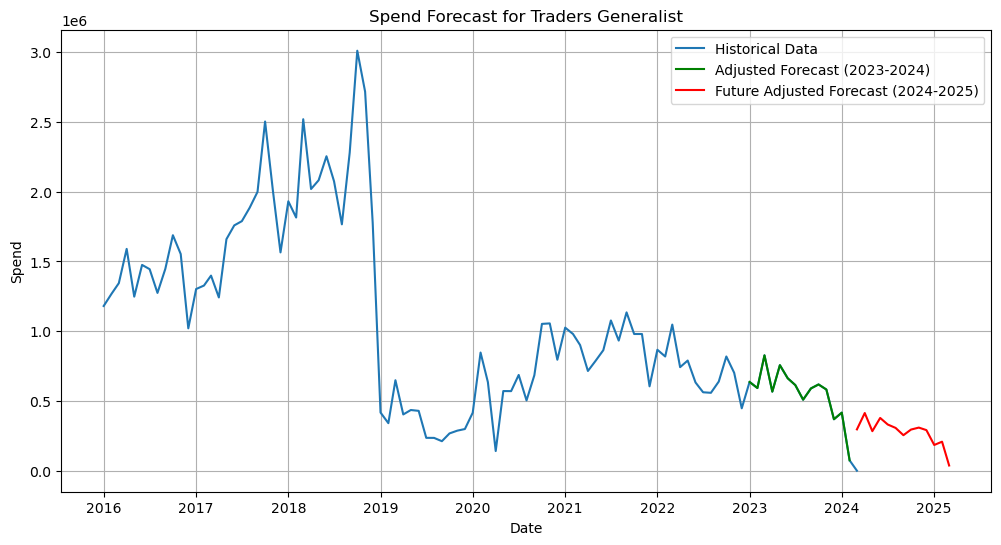

Best ARIMA order for sector Facilities Management Specialist: p=1, d=1, q=2
Facilities Management Specialist ARIMA MAE: 251432.2476126088, MSE: 72516028336.8631
Facilities Management Specialist Adjusted Forecast MAE: 66.84342156954384, MSE: 7049.3935503135635


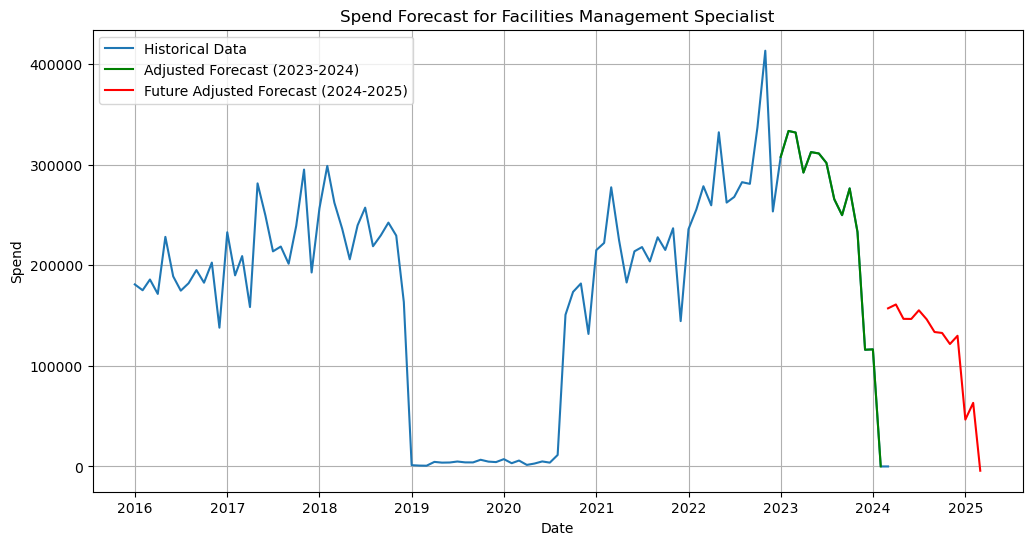

Best ARIMA order for sector Power Tool Specialist: p=0, d=1, q=1
Power Tool Specialist ARIMA MAE: 1142113.4289689881, MSE: 1676852384430.5535
Power Tool Specialist Adjusted Forecast MAE: 679.3069546220358, MSE: 605373.1726385055


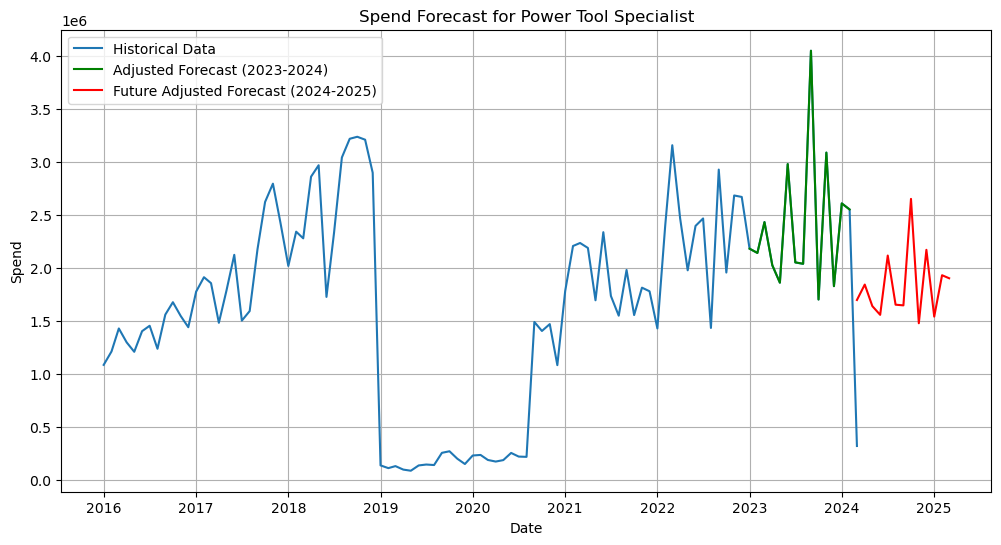

Best ARIMA order for sector Wholesaler: p=0, d=1, q=1
Wholesaler ARIMA MAE: 144980.54590818696, MSE: 23756870869.513607
Wholesaler Adjusted Forecast MAE: 109.78845028380627, MSE: 18187.37677832276


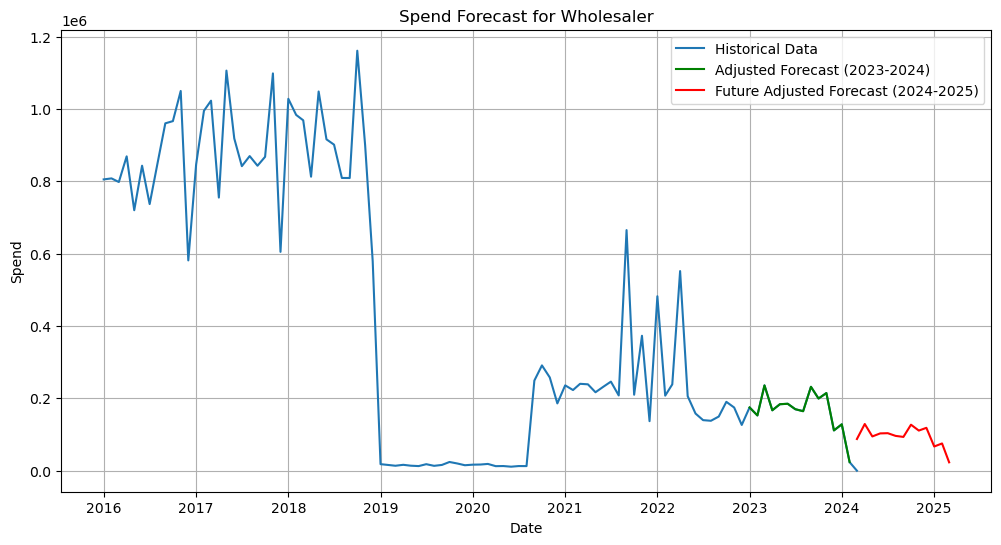

Best ARIMA order for sector Hire Company: p=0, d=1, q=1
Hire Company ARIMA MAE: 53716.628972950064, MSE: 3735956694.654567
Hire Company Adjusted Forecast MAE: 32.0490417729187, MSE: 1340.6805700049301


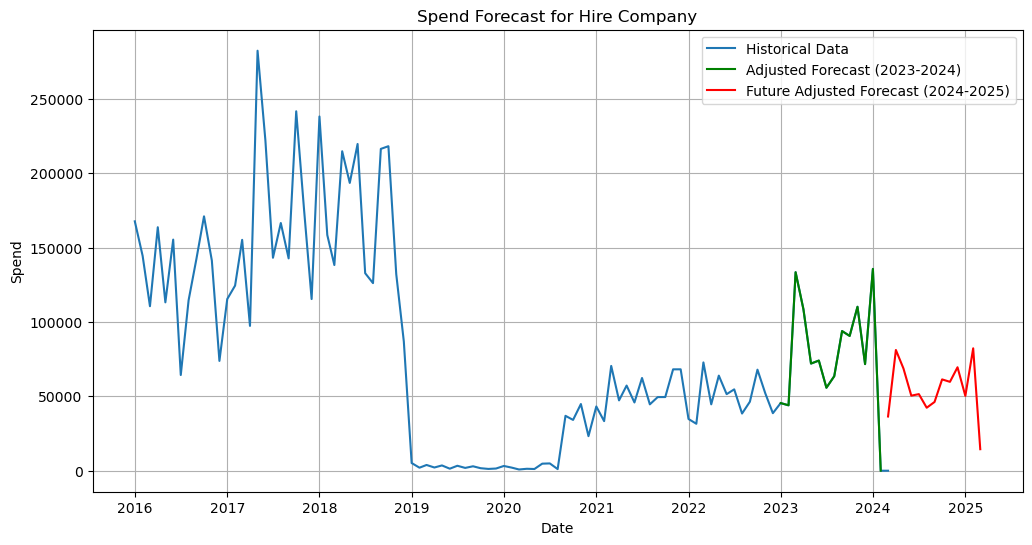

Best ARIMA order for sector Cutting Tools Specialist: p=2, d=1, q=2
Cutting Tools Specialist ARIMA MAE: 272291.43499567814, MSE: 82706315028.8
Cutting Tools Specialist Adjusted Forecast MAE: 21.52259937817949, MSE: 714.6994575292641


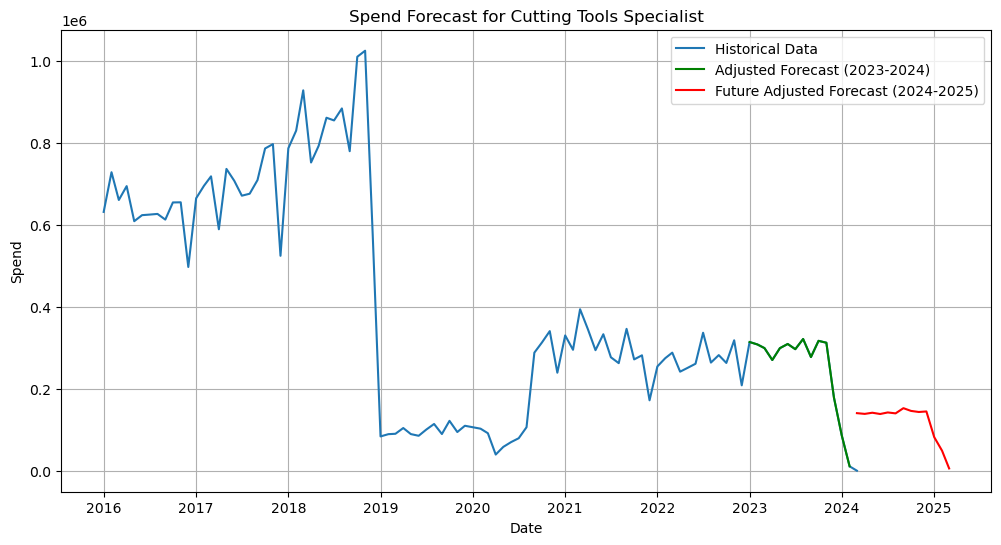

                                     ARIMA_MAE     ARIMA_MSE  Adjusted_MAE  \
Industrial Distribution           5.004452e+05  2.702345e+11     52.020059   
Traders Generalist                5.581207e+05  3.422649e+11    226.011226   
Facilities Management Specialist  2.514322e+05  7.251603e+10     66.843422   
Power Tool Specialist             1.142113e+06  1.676852e+12    679.306955   
Wholesaler                        1.449805e+05  2.375687e+10    109.788450   
Hire Company                      5.371663e+04  3.735957e+09     32.049042   
Cutting Tools Specialist          2.722914e+05  8.270632e+10     21.522599   

                                   Adjusted_MSE  MAE_Percentage  Best_p  \
Industrial Distribution             4013.224080        0.010391       0   
Traders Generalist                 67638.307423        0.040467       0   
Facilities Management Specialist    7049.393550        0.027126       1   
Power Tool Specialist             605373.172639        0.028381       0   


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

def plot_acf_pacf(data, lags=10):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    max_lags = min(lags, len(data) // 2 - 1)
    plot_acf(data, lags=max_lags, ax=axs[0])
    axs[0].set_title('ACF Plot')
    plot_pacf(data, lags=max_lags, ax=axs[1])
    axs[1].set_title('PACF Plot')
    plt.show()

# Assuming 'new_df' and 'sectors' are already defined
sector_forecasts = {}

# Filter valid sectors
valid_sectors = []
for sector in sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]
    sector_dates = sector_data['YEAR_MONTH'].unique()
    required_dates = set(pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS'))
    if required_dates.issubset(set(pd.to_datetime(sector_dates))):
        valid_sectors.append(sector)

# Main analysis loop
for sector in valid_sectors:
    sector_data = new_df[new_df['SECTOR_1'] == sector]
    aggregated_spend = sector_data.groupby('YEAR_MONTH')['SPEND'].sum().reset_index()
    aggregated_spend.sort_values(by='YEAR_MONTH', inplace=True)
    spend_data = aggregated_spend.set_index('YEAR_MONTH')['SPEND']

    # Automatic ARIMA order selection
    best_aic = float('inf')
    best_order = (0, 0, 0)
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(spend_data, order=(p, d, q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue

    p, d, q = best_order
    print(f"Best ARIMA order for sector {sector}: p={p}, d={d}, q={q}")

    model = ARIMA(spend_data, order=(p, d, q))
    model_fit = model.fit()

    # Forecast and residual calculation
    train_data = spend_data[spend_data.index < '2023-01-01']
    test_data = spend_data[(spend_data.index >= '2023-01-01') & (spend_data.index < '2024-03-01')]

    forecast = model_fit.forecast(steps=len(test_data))
    residuals = test_data.values - forecast

    X_train_gb = pd.DataFrame({
        'arima_forecast': forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values,
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values,
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values
    })

    y_train_gb = residuals

    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_regressor.fit(X_train_gb, y_train_gb)

    # Apply full correction (100%) for test period
    residual_correction = gb_regressor.predict(X_train_gb)
    adjusted_forecast = forecast + residual_correction

    mae_arima = mean_absolute_error(test_data, forecast)
    mse_arima = mean_squared_error(test_data, forecast)
    mae_adjusted = mean_absolute_error(test_data, adjusted_forecast)
    mse_adjusted = mean_squared_error(test_data, adjusted_forecast)

    mae_percentage = (mae_adjusted / test_data.mean()) * 100

    # Store results for this sector
    sector_forecasts[sector] = {
        'ARIMA_MAE': mae_arima,
        'ARIMA_MSE': mse_arima,
        'Adjusted_MAE': mae_adjusted,
        'Adjusted_MSE': mse_adjusted,
        'MAE_Percentage': mae_percentage,
        'Best_p': p,
        'Best_d': d,
        'Best_q': q
    }

    print(f'{sector} ARIMA MAE: {mae_arima}, MSE: {mse_arima}')
    print(f'{sector} Adjusted Forecast MAE: {mae_adjusted}, MSE: {mse_adjusted}')

    # Future forecasting with partial residual correction
    forecast_start = '2024-03-01'
    forecast_end = '2025-03-01'
    future_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

    # Predict future using ARIMA
    arima_future_forecast = model_fit.forecast(steps=len(future_index))

    # Prepare data for Gradient Boosting future correction
    X_future_gb = pd.DataFrame({
        'arima_forecast': arima_future_forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values[-len(future_index):],
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values[-len(future_index):],
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values[-len(future_index):]
    }).fillna(0)

    # Predict the corrections and adjust the future forecast with 50% correction
    future_residual_correction = gb_regressor.predict(X_future_gb)
    correction_factor = 0.5  # Apply only 50% of the correction for future forecast
    future_adjusted_forecast = arima_future_forecast + correction_factor * future_residual_correction

    # Store the forecasts
    sector_forecasts[sector]['future_forecast'] = future_adjusted_forecast

    # Plot the historical data, ARIMA forecast, and adjusted forecast
    plt.figure(figsize=(12, 6))
    plt.plot(spend_data, label='Historical Data')
    plt.plot(test_data.index, adjusted_forecast, label='Adjusted Forecast (2023-2024)', color='green')
    plt.plot(future_index, future_adjusted_forecast, label='Future Adjusted Forecast (2024-2025)', color='red')
    plt.title(f'Spend Forecast for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display results as a DataFrame
forecast_results_df = pd.DataFrame.from_dict(sector_forecasts, orient='index')
print(forecast_results_df)


In [64]:
import pandas as pd

# Assuming 'new_df' is your DataFrame

# Ensure 'YEAR_MONTH' is in datetime format
new_df['YEAR_MONTH'] = pd.to_datetime(new_df['YEAR_MONTH'])

# Step 1: Calculate the Total Monthly Spend for Each Sector
# Group by 'YEAR_MONTH' and 'SECTOR_1' and sum the 'SPEND'
monthly_spend = new_df.groupby(['YEAR_MONTH', 'SECTOR_1'])['SPEND'].sum().reset_index()

# Step 2: Check for Missing Months

# Define the full range of required dates
required_dates = pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS')

# Initialize a dictionary to store missing months for each sector
missing_months_dict = {}

# Loop through each sector and identify missing months
for sector in monthly_spend['SECTOR_1'].unique():
    sector_data = monthly_spend[monthly_spend['SECTOR_1'] == sector]
    
    # Get the available dates for the sector
    sector_dates = set(sector_data['YEAR_MONTH'].unique())
    
    # Identify missing dates
    missing_months = sorted(required_dates.difference(sector_dates))
    
    if missing_months:
        missing_months_dict[sector] = missing_months
        print(f"Sector {sector} is missing the following months:")
        print(missing_months)
        print("-" * 40)

# If you want to review all missing months, you can do so by examining the dictionary
print(missing_months_dict)


Sector Builders Merchant is missing the following months:
[Timestamp('2019-02-01 00:00:00'), Timestamp('2019-06-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-08-01 00:00:00')]
----------------------------------------
Sector Construction, Aggregates and Mining is missing the following months:
[Timestamp('2022-05-01 00:00:00'), Timestamp('2022-06-01 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-12-01 00:00:00'), Timestamp('2023-11-01 00:00:00'), Timestamp('2023-12-01 00:00:00')]
----------------------------------------
Sector Fixings & Fasteners Specialist is missing the following months:
[Timestamp('2019-03-01 00:00:00'), Timestamp('2019-04-01 00:00:00'), Timestamp('2019-05-01 00:00:00'), Timestamp('2019-06-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]
------------------------------

# Applying Linear Interpolation

In [65]:
monthly_spend['YEAR_MONTH'] = pd.to_datetime(monthly_spend['YEAR_MONTH'])

# Define the full range of required dates
required_dates = pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS')

# Initialize an empty DataFrame to store the final results
final_monthly_spend = pd.DataFrame()

# Step 1: Interpolate the Missing Months for Each Sector

for sector in monthly_spend['SECTOR_1'].unique():
    sector_data = monthly_spend[monthly_spend['SECTOR_1'] == sector].copy()
    
    # Reindex the sector data to include all required dates
    sector_data = sector_data.set_index('YEAR_MONTH').reindex(required_dates)
    
    # Fill the 'SECTOR_1' column with the sector name
    sector_data['SECTOR_1'] = sector
    
    # Interpolate the 'SPEND' column to fill missing values
    sector_data['SPEND'] = sector_data['SPEND'].interpolate(method='linear')
    
    # Reset the index to bring 'YEAR_MONTH' back as a column
    sector_data.reset_index(inplace=True)
    
    # Append the interpolated data to the final DataFrame
    final_monthly_spend = pd.concat([final_monthly_spend, sector_data], ignore_index=True)

# Step 2: Combine the Interpolated Data

# Display the interpolated DataFrame to verify that the missing months have been filled
print(final_monthly_spend.head(100))

        index                             SECTOR_1      SPEND
0  2016-01-01                    Builders Merchant  290276.30
1  2016-02-01                    Builders Merchant  704191.59
2  2016-03-01                    Builders Merchant  525855.03
3  2016-04-01                    Builders Merchant  452324.68
4  2016-05-01                    Builders Merchant  632370.77
..        ...                                  ...        ...
95 2023-12-01                    Builders Merchant    8643.24
96 2024-01-01                    Builders Merchant  186629.66
97 2016-01-01  Construction, Aggregates and Mining   12809.41
98 2016-02-01  Construction, Aggregates and Mining   14749.56
99 2016-03-01  Construction, Aggregates and Mining   20330.98

[100 rows x 3 columns]


In [66]:
import pandas as pd

# Assuming 'final_monthly_spend' is the DataFrame you provided

# Ensure 'index' (YEAR_MONTH) is in datetime format
final_monthly_spend['index'] = pd.to_datetime(final_monthly_spend['index'])

# Define the full range of required dates
required_dates = pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS')

# Initialize a dictionary to store missing months for each sector
missing_months_dict = {}

# Loop through each sector and identify missing months
for sector in final_monthly_spend['SECTOR_1'].unique():
    sector_data = final_monthly_spend[final_monthly_spend['SECTOR_1'] == sector].copy()
    
    # Get the available dates for the sector
    sector_dates = set(sector_data['index'].unique())
    
    # Identify missing dates
    missing_months = sorted(required_dates.difference(sector_dates))
    
    if missing_months:
        missing_months_dict[sector] = missing_months
        print(f"Sector {sector} is missing the following months:")
        print(missing_months)
        print("-" * 40)

# If you want to review all missing months, you can do so by examining the dictionary
print(missing_months_dict)


{}


In [67]:
monthly_spend = final_monthly_spend

In [68]:
# Rename 'index' column to 'YEAR_MONTH' and convert it to datetime format
final_monthly_spend.rename(columns={'index': 'YEAR_MONTH'}, inplace=True)
final_monthly_spend['YEAR_MONTH'] = pd.to_datetime(final_monthly_spend['YEAR_MONTH'])

# Set 'YEAR_MONTH' as the index
final_monthly_spend.set_index('YEAR_MONTH', inplace=True)

# With the Interpolation of Missing months

Sectors with NaNs and removed:
['Agricultural Specialist', 'Automotive Specialist', 'Landscape and Outdoor Products']
Valid sectors after removing those with NaNs:
['Builders Merchant', 'Industrial Distribution', 'Fixings & Fasteners Specialist', 'Traders Generalist', 'Facilities Management Specialist', 'Power Tool Specialist', 'Wholesaler', 'PPE Specialist', 'Hire Company', 'Construction, Aggregates and Mining', 'Cutting Tools Specialist', 'Janitorial Specialist']
Processing sector: Builders Merchant
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Builders Merchant: p=2, d=1, q=2
Training data: YEAR_MONTH
2016-01-01    290276.30
2016-02-01    704191.59
2016-03-01    525855.03
2016-04-01    452324.68
2016-05-01    632370.77
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01     926.28
2020-02-01    1299.60
2020-03-01     370.65
2020-04-01     293.18
2020-05-01     215.71
Name: SPEND, dtype: float64
Best parameters found for sector Bu

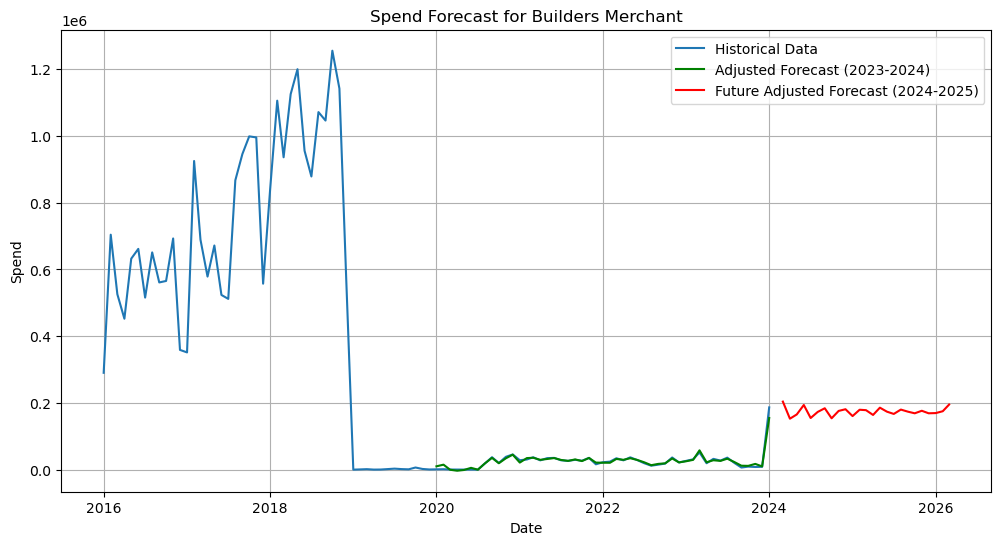

Processing sector: Industrial Distribution
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Industrial Distribution: p=0, d=1, q=0
Training data: YEAR_MONTH
2016-01-01    1554141.95
2016-02-01    1650146.48
2016-03-01    1439450.65
2016-04-01    1499524.64
2016-05-01    1441471.38
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    64855.08
2020-02-01    56902.80
2020-03-01    49892.41
2020-04-01    18013.78
2020-05-01    27111.74
Name: SPEND, dtype: float64
Best parameters found for sector Industrial Distribution: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 1.0}
Best MAE score during GridSearchCV: 118507.8169639341
Industrial Distribution ARIMA MAE: 154001.0393877551, MSE: 39503314929.28642
Industrial Distribution Adjusted Forecast MAE: 2971.6391528581735, MSE: 13467904.699637612


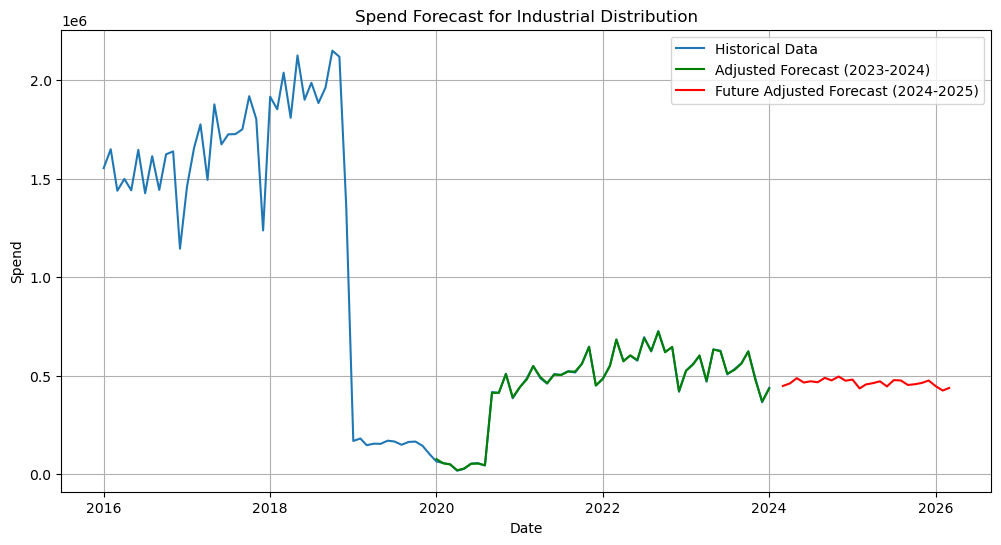

Processing sector: Fixings & Fasteners Specialist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Fixings & Fasteners Specialist: p=1, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    282118.28
2016-02-01    326535.28
2016-03-01    334399.13
2016-04-01    400027.52
2016-05-01    309647.03
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    320.00
2020-02-01    488.85
2020-03-01    657.70
2020-04-01    826.55
2020-05-01    995.40
Name: SPEND, dtype: float64
Best parameters found for sector Fixings & Fasteners Specialist: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.85}
Best MAE score during GridSearchCV: 20813.716137140007
Fixings & Fasteners Specialist ARIMA MAE: 74860.00597722153, MSE: 6296617163.836048
Fixings & Fasteners Specialist Adjusted Forecast MAE: 1.1013782468258897, MSE: 1.7413406856308904


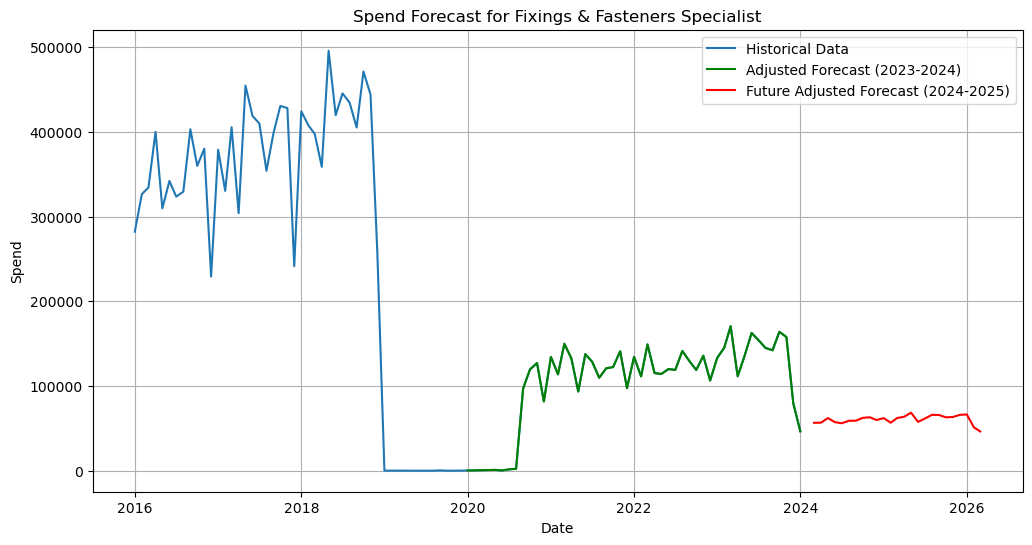

Processing sector: Traders Generalist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Traders Generalist: p=0, d=1, q=0
Training data: YEAR_MONTH
2016-01-01    1180800.02
2016-02-01    1267877.94
2016-03-01    1344476.76
2016-04-01    1590097.59
2016-05-01    1247707.10
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    415968.63
2020-02-01    847261.86
2020-03-01    635400.81
2020-04-01    141421.68
2020-05-01    571198.16
Name: SPEND, dtype: float64
Best parameters found for sector Traders Generalist: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.85}
Best MAE score during GridSearchCV: 88981.53063998348
Traders Generalist ARIMA MAE: 317428.0806122449, MSE: 136621074976.4548
Traders Generalist Adjusted Forecast MAE: 3542.0092490048573, MSE: 67700361.67344844


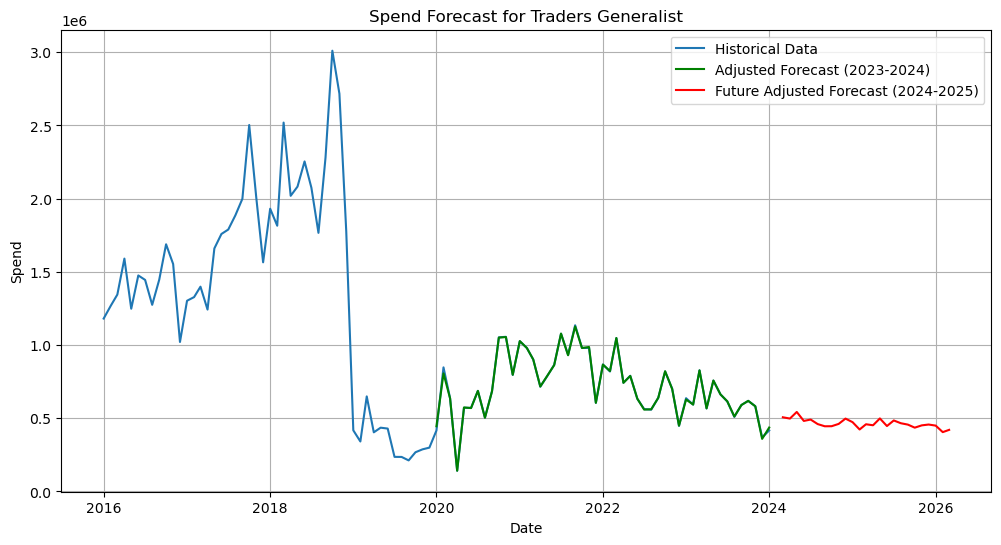

Processing sector: Facilities Management Specialist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Facilities Management Specialist: p=0, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    181040.27
2016-02-01    175235.51
2016-03-01    185927.68
2016-04-01    171588.12
2016-05-01    228314.05
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    7272.40
2020-02-01    3226.60
2020-03-01    5872.52
2020-04-01    1535.86
2020-05-01    2872.64
Name: SPEND, dtype: float64
Best parameters found for sector Facilities Management Specialist: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.7}
Best MAE score during GridSearchCV: 49728.792180367585
Facilities Management Specialist ARIMA MAE: 123406.99228748145, MSE: 18565948151.155502
Facilities Management Specialist Adjusted Forecast MAE: 4274.197053849104, MSE: 33999129.85495213


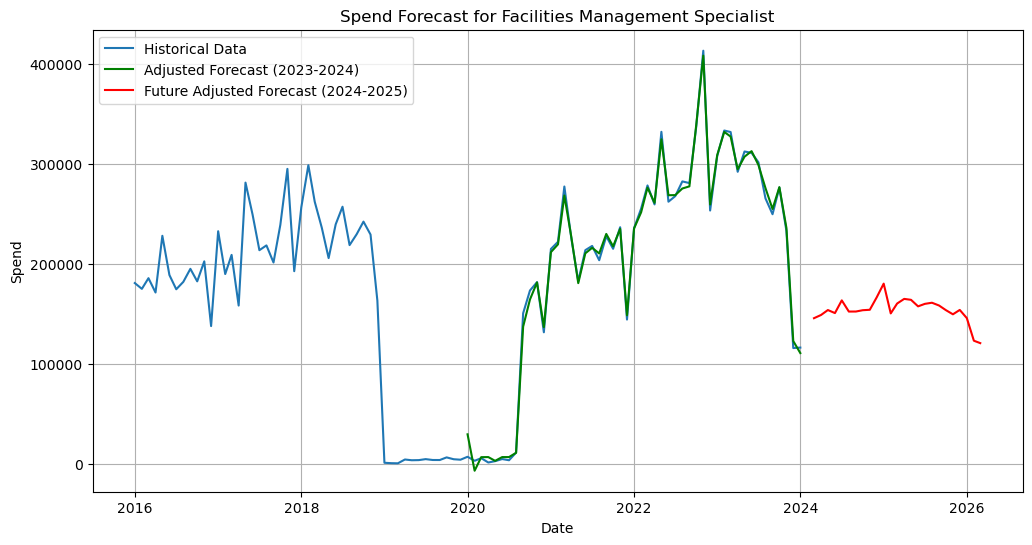

Processing sector: Power Tool Specialist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Power Tool Specialist: p=0, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    1082863.09
2016-02-01    1209178.04
2016-03-01    1426460.36
2016-04-01    1295318.86
2016-05-01    1206261.94
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    227650.06
2020-02-01    232925.39
2020-03-01    185460.72
2020-04-01    170520.19
2020-05-01    184196.15
Name: SPEND, dtype: float64
Best parameters found for sector Power Tool Specialist: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Best MAE score during GridSearchCV: 577847.6661207179
Power Tool Specialist ARIMA MAE: 821400.3508515786, MSE: 1180005420643.505
Power Tool Specialist Adjusted Forecast MAE: 142588.17541536386, MSE: 36671107263.59516


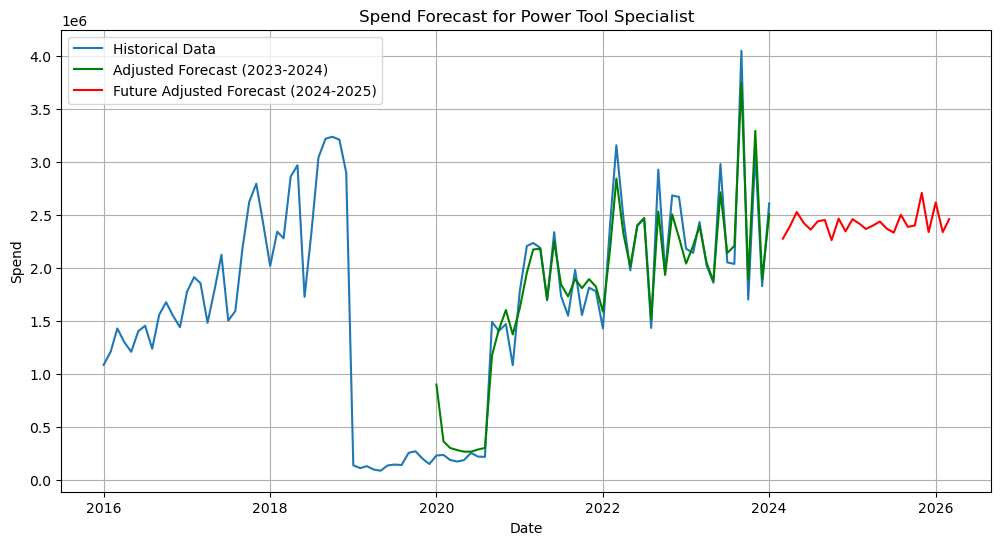

Processing sector: Wholesaler
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Wholesaler: p=0, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    805308.38
2016-02-01    808075.37
2016-03-01    798076.89
2016-04-01    869029.90
2016-05-01    720109.83
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    16727.70
2020-02-01    17133.09
2020-03-01    18775.80
2020-04-01    12621.78
2020-05-01    12946.44
Name: SPEND, dtype: float64
Best parameters found for sector Wholesaler: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best MAE score during GridSearchCV: 74096.80299157607
Wholesaler ARIMA MAE: 97993.81823854128, MSE: 19387977735.761436
Wholesaler Adjusted Forecast MAE: 12889.334320299102, MSE: 511513330.5383062


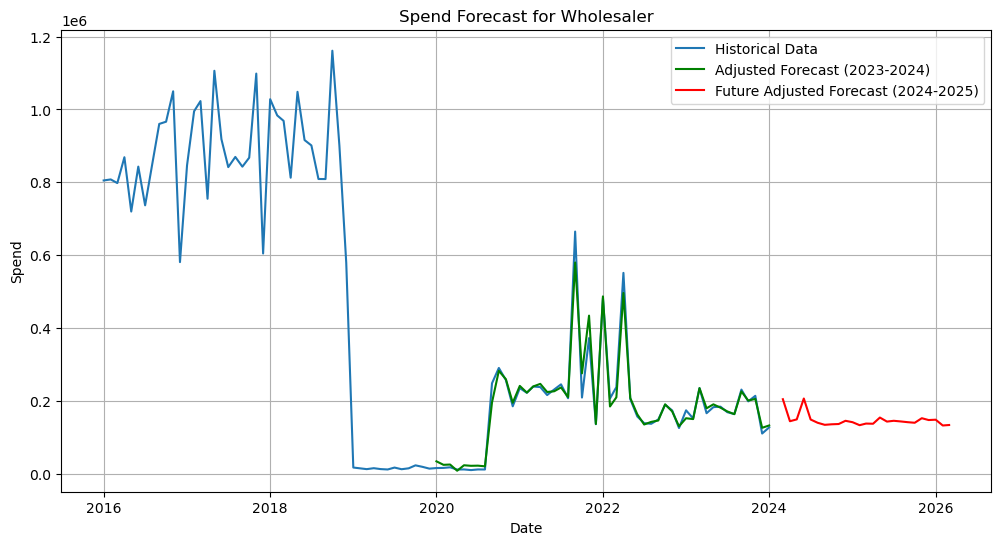

Processing sector: PPE Specialist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector PPE Specialist: p=0, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    120114.85
2016-02-01     90953.38
2016-03-01    171101.21
2016-04-01    165831.20
2016-05-01    111357.74
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    28086.55
2020-02-01    53163.74
2020-03-01    52939.22
2020-04-01    29099.26
2020-05-01    33802.25
Name: SPEND, dtype: float64
Best parameters found for sector PPE Specialist: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.85}
Best MAE score during GridSearchCV: 49162.72885973678
PPE Specialist ARIMA MAE: 73457.44112945163, MSE: 8434796155.498626
PPE Specialist Adjusted Forecast MAE: 10767.783927697565, MSE: 209131707.78743568


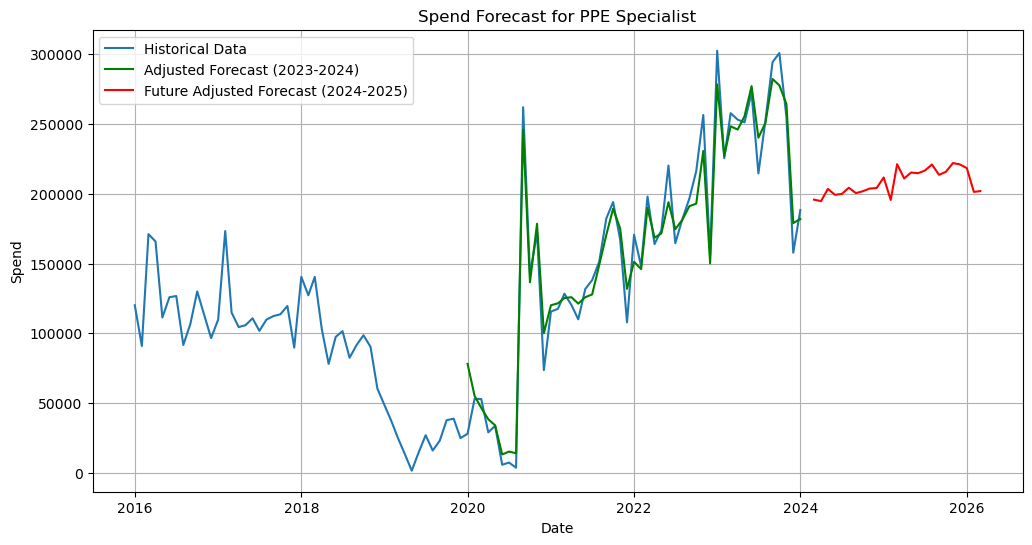

Processing sector: Hire Company
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Hire Company: p=0, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    167653.75
2016-02-01    144450.30
2016-03-01    110590.65
2016-04-01    163679.91
2016-05-01    113189.52
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    3196.84
2020-02-01    2091.45
2020-03-01     832.73
2020-04-01    1306.09
2020-05-01    1154.06
Name: SPEND, dtype: float64
Best parameters found for sector Hire Company: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.85}
Best MAE score during GridSearchCV: 22323.172327732656
Hire Company ARIMA MAE: 60777.56697944413, MSE: 4459806465.218633
Hire Company Adjusted Forecast MAE: 147.02240743383334, MSE: 57888.3201458822


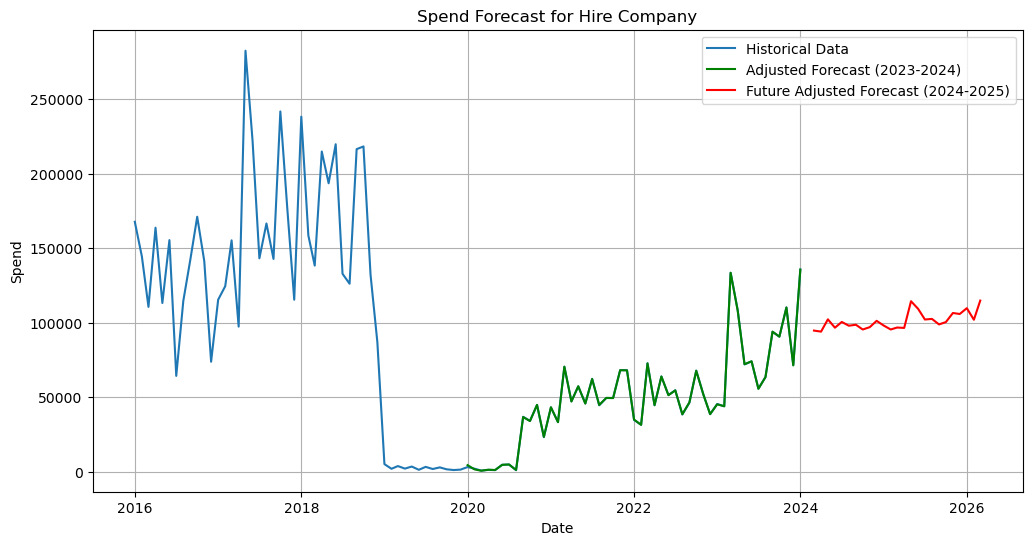

Processing sector: Construction, Aggregates and Mining
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Construction, Aggregates and Mining: p=1, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    12809.41
2016-02-01    14749.56
2016-03-01    20330.98
2016-04-01    15705.14
2016-05-01    13589.66
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    1051.85
2020-02-01    2697.68
2020-03-01     494.28
2020-04-01      60.36
2020-05-01      60.36
Name: SPEND, dtype: float64
Best parameters found for sector Construction, Aggregates and Mining: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}
Best MAE score during GridSearchCV: 894.294090420674
Construction, Aggregates and Mining ARIMA MAE: 2738.6480657713355, MSE: 9565737.491039786
Construction, Aggregates and Mining Adjusted Forecast MAE: 106.86985814261072, MSE: 28573.241465342377


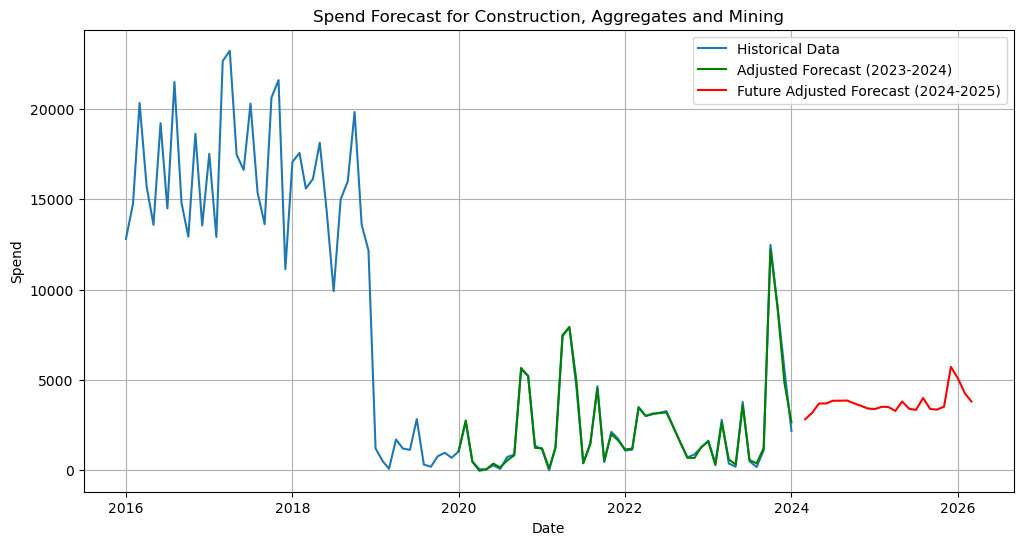

Processing sector: Cutting Tools Specialist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Cutting Tools Specialist: p=2, d=1, q=2
Training data: YEAR_MONTH
2016-01-01    632104.78
2016-02-01    729063.03
2016-03-01    661274.50
2016-04-01    695124.12
2016-05-01    609462.89
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01    106243.71
2020-02-01    102688.43
2020-03-01     91564.78
2020-04-01     39494.85
2020-05-01     58183.89
Name: SPEND, dtype: float64
Best parameters found for sector Cutting Tools Specialist: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.7}
Best MAE score during GridSearchCV: 35455.39435968604
Cutting Tools Specialist ARIMA MAE: 152492.7476224441, MSE: 28080213481.783463
Cutting Tools Specialist Adjusted Forecast MAE: 339.70003795991573, MSE: 211440.2446997198


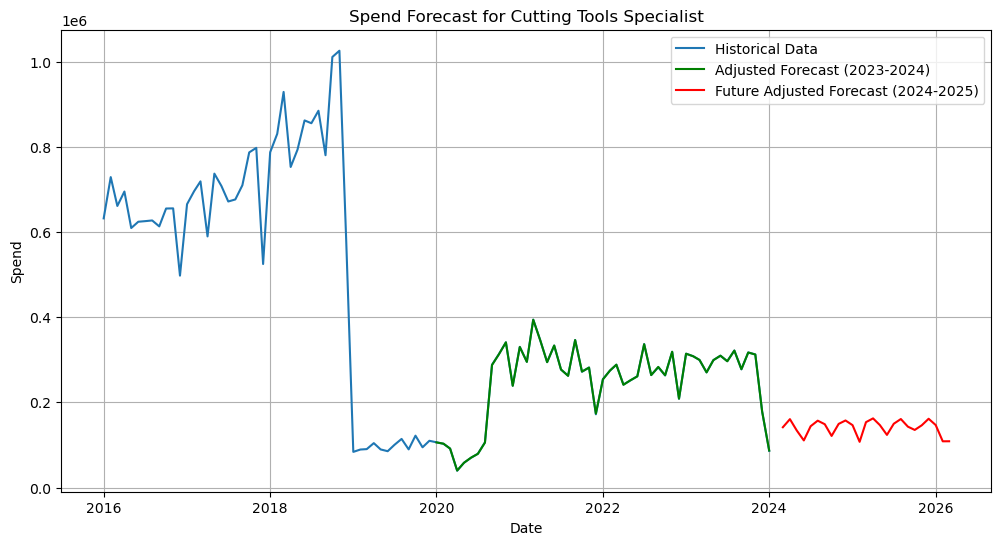

Processing sector: Janitorial Specialist
Data available from 2016-01-01 00:00:00 to 2024-01-01 00:00:00
Best ARIMA order for sector Janitorial Specialist: p=1, d=1, q=1
Training data: YEAR_MONTH
2016-01-01    113813.53
2016-02-01    126962.63
2016-03-01    121673.43
2016-04-01    108912.16
2016-05-01     96733.07
Name: SPEND, dtype: float64
Test data: YEAR_MONTH
2020-01-01     51.10
2020-02-01     32.96
2020-03-01    502.20
2020-04-01    383.48
2020-05-01    264.76
Name: SPEND, dtype: float64
Best parameters found for sector Janitorial Specialist: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.85}
Best MAE score during GridSearchCV: 41.703941010939964
Janitorial Specialist ARIMA MAE: 73.70673469780466, MSE: 30024.33128902696
Janitorial Specialist Adjusted Forecast MAE: 1.2083558927240936, MSE: 17.795106118753278


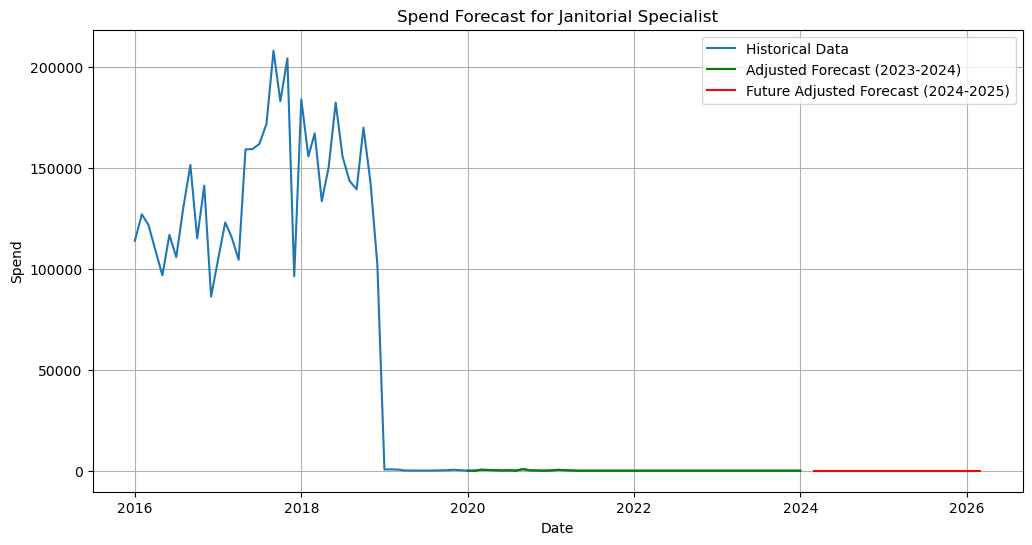

                                         ARIMA_MAE     ARIMA_MSE  \
Builders Merchant                    184555.028232  3.488964e+10   
Industrial Distribution              154001.039388  3.950331e+10   
Fixings & Fasteners Specialist        74860.005977  6.296617e+09   
Traders Generalist                   317428.080612  1.366211e+11   
Facilities Management Specialist     123406.992287  1.856595e+10   
Power Tool Specialist                821400.350852  1.180005e+12   
Wholesaler                            97993.818239  1.938798e+10   
PPE Specialist                        73457.441129  8.434796e+09   
Hire Company                          60777.566979  4.459806e+09   
Construction, Aggregates and Mining    2738.648066  9.565737e+06   
Cutting Tools Specialist             152492.747622  2.808021e+10   
Janitorial Specialist                    73.706735  3.002433e+04   

                                      Adjusted_MAE  Adjusted_MSE  \
Builders Merchant                      3291.935

In [69]:
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

# Define the full range of required dates
required_dates = set(pd.date_range(start='2016-01-01', end='2024-01-01', freq='MS'))

valid_sectors = []
for sector in sectors:
    sector_data = final_monthly_spend[final_monthly_spend['SECTOR_1'] == sector]
    sector_dates = set(sector_data.index)
    if required_dates.issubset(sector_dates):
        valid_sectors.append(sector)

# Initialize a list to store sectors to remove
sectors_to_remove = []

# Loop through each valid sector to check for NaNs
for sector in valid_sectors:
    sector_data = final_monthly_spend[final_monthly_spend['SECTOR_1'] == sector]
    
    if sector_data['SPEND'].isna().any():
        sectors_to_remove.append(sector)
        continue

    # Split into training and test datasets
    train_data = sector_data.loc[:'2022-12-01']  # Training data up to 2022-12-01
    test_data = sector_data.loc['2023-01-01':]   # Test data from 2023-01-01 onward

    # Check for NaNs in the train and test data
    if train_data['SPEND'].isna().any() or test_data['SPEND'].isna().any():
        sectors_to_remove.append(sector)

# Print sectors to be removed for verification
print("Sectors with NaNs and removed:")
print(sectors_to_remove)

# Update valid_sectors by removing those that are in sectors_to_remove
valid_sectors = [sector for sector in valid_sectors if sector not in sectors_to_remove]

# Print valid sectors
print("Valid sectors after removing those with NaNs:")
print(valid_sectors)

# Initialize a dictionary to store forecasts
sector_forecasts = {}

# Main analysis loop for each sector
for sector in valid_sectors:  # Only process valid sectors
    sector_data = final_monthly_spend[final_monthly_spend['SECTOR_1'] == sector]
    spend_data = sector_data['SPEND']
    
    print(f"Processing sector: {sector}")
    print(f"Data available from {spend_data.index.min()} to {spend_data.index.max()}")

    # Automatic ARIMA order selection
    best_aic = float('inf')
    best_order = (0, 0, 0)
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(spend_data, order=(p, d, q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue

    p, d, q = best_order
    print(f"Best ARIMA order for sector {sector}: p={p}, d={d}, q={q}")

    model = ARIMA(spend_data, order=(p, d, q))
    model_fit = model.fit()

    # Forecast and residual calculation
    train_data = spend_data[spend_data.index < '2020-01-01']
    test_data = spend_data[(spend_data.index >= '2020-01-01') & (spend_data.index < '2024-03-01')]

    if test_data.empty:
        print(f"No test data available for sector {sector}")
        continue

    print(f"Training data: {train_data.head()}")
    print(f"Test data: {test_data.head()}")

    forecast = model_fit.forecast(steps=len(test_data))
    residuals = test_data.values - forecast

    # Prepare data for Gradient Boosting Regressor
    X_train_gb = pd.DataFrame({
        'arima_forecast': forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values,
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values,
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values
    })

    y_train_gb = residuals
    X_train_gb = X_train_gb.dropna()
    y_train_gb = y_train_gb[X_train_gb.index]

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5],
        'subsample': [0.7, 0.85, 1.0],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    gb_regressor = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_gb, y_train_gb)

    # Use the best parameters found
    best_gb_regressor = grid_search.best_estimator_
    print(f"Best parameters found for sector {sector}: {grid_search.best_params_}")
    print(f"Best MAE score during GridSearchCV: {-grid_search.best_score_}")

    # Apply full correction (100%) for test period
    residual_correction = best_gb_regressor.predict(X_train_gb)
    adjusted_forecast = forecast + residual_correction

    mae_arima = mean_absolute_error(test_data, forecast)
    mse_arima = mean_squared_error(test_data, forecast)
    mae_adjusted = mean_absolute_error(test_data, adjusted_forecast)
    mse_adjusted = mean_squared_error(test_data, adjusted_forecast)

    mae_percentage = (mae_adjusted / test_data.mean()) * 100

    # Store results for this sector
    sector_forecasts[sector] = {
        'ARIMA_MAE': mae_arima,
        'ARIMA_MSE': mse_arima,
        'Adjusted_MAE': mae_adjusted,
        'Adjusted_MSE': mse_adjusted,
        'MAE_Percentage': mae_percentage,
        'Best_p': p,
        'Best_d': d,
        'Best_q': q
    }

    print(f'{sector} ARIMA MAE: {mae_arima}, MSE: {mse_arima}')
    print(f'{sector} Adjusted Forecast MAE: {mae_adjusted}, MSE: {mse_adjusted}')

    # Future forecasting with partial residual correction
    forecast_start = '2024-03-01'
    forecast_end = '2026-03-01'
    future_index = pd.date_range(start=forecast_start, end=forecast_end, freq='MS')

    # Predict future using ARIMA
    arima_future_forecast = model_fit.forecast(steps=len(future_index))

    # Prepare data for Gradient Boosting future correction
    X_future_gb = pd.DataFrame({
        'arima_forecast': arima_future_forecast,
        'lagged_residual_1': pd.Series(residuals).shift(1).fillna(0).values[-len(future_index):],
        'lagged_residual_2': pd.Series(residuals).shift(2).fillna(0).values[-len(future_index):],
        'rolling_mean_residual_3': pd.Series(residuals).rolling(window=3).mean().fillna(0).values[-len(future_index):]
    }).fillna(0)

    # Predict the corrections and adjust the future forecast with 20% correction
    future_residual_correction = best_gb_regressor.predict(X_future_gb)
    correction_factor = 0.2  # Apply only 20% of the correction for future forecast
    future_adjusted_forecast = arima_future_forecast + correction_factor * future_residual_correction

    # Store the forecasts
    sector_forecasts[sector]['future_forecast'] = pd.Series(future_adjusted_forecast, index=future_index).to_dict()

    # Plot the historical data, ARIMA forecast, and adjusted forecast
    plt.figure(figsize=(12, 6))
    plt.plot(spend_data, label='Historical Data')
    plt.plot(test_data.index, adjusted_forecast, label='Adjusted Forecast (2023-2024)', color='green')
    plt.plot(future_index, future_adjusted_forecast, label='Future Adjusted Forecast (2024-2025)', color='red')
    plt.title(f'Spend Forecast for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display results as a DataFrame
forecast_results_df = pd.DataFrame.from_dict(sector_forecasts, orient='index')
print(forecast_results_df)


In [70]:
# Check the structure of the data
print("Columns in final_monthly_spend:", final_monthly_spend.columns)
print("Sample data:")
print(final_monthly_spend.head())

# Check the unique sectors
print("Unique sectors in data:", sectors)

# Check the index type
print("Index type of final_monthly_spend:", type(final_monthly_spend.index))


Columns in final_monthly_spend: Index(['SECTOR_1', 'SPEND'], dtype='object')
Sample data:
                     SECTOR_1      SPEND
YEAR_MONTH                              
2016-01-01  Builders Merchant  290276.30
2016-02-01  Builders Merchant  704191.59
2016-03-01  Builders Merchant  525855.03
2016-04-01  Builders Merchant  452324.68
2016-05-01  Builders Merchant  632370.77
Unique sectors in data: [nan 'Builders Merchant' 'Industrial Distribution'
 'Fixings & Fasteners Specialist' 'Traders Generalist'
 'Facilities Management Specialist' 'Power Tool Specialist' 'Wholesaler'
 'PPE Specialist' 'Agricultural Specialist' 'Hire Company'
 'Construction, Aggregates and Mining' 'Cutting Tools Specialist'
 'Janitorial Specialist' 'Automotive Specialist'
 'Landscape and Outdoor Products']
Index type of final_monthly_spend: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [71]:
def print_forecasts(df):
    for _, row in df.iterrows():
        sector = row.name  # Use the row index name as sector
        if 'future_forecast' in row:
            forecast = row['future_forecast']
            print(f"Forecasted values for sector: {sector}")
            
            # Ensure forecast is a dictionary
            if isinstance(forecast, dict):
                for date, value in forecast.items():
                    # Check if date is a Timestamp
                    if isinstance(date, pd.Timestamp):
                        date_str = date.strftime('%Y-%m-%d %H:%M:%S')
                    else:
                        date_str = str(date)  # Fallback to converting date to string if not Timestamp
                    print(f" Date: {date_str}, Forecasted Value: {value:.2f}")
            else:
                print(" Forecast data is not in the expected format.")
        else:
            print(f"No forecast data available for sector: {sector}")
        print()  # Print a blank line for readability

# Call the function to print forecasts
print_forecasts(forecast_results_df)

Forecasted values for sector: Builders Merchant
 Date: 2024-03-01 00:00:00, Forecasted Value: 152740.27
 Date: 2024-04-01 00:00:00, Forecasted Value: 165443.23
 Date: 2024-05-01 00:00:00, Forecasted Value: 193788.30
 Date: 2024-06-01 00:00:00, Forecasted Value: 154779.26
 Date: 2024-07-01 00:00:00, Forecasted Value: 173024.11
 Date: 2024-08-01 00:00:00, Forecasted Value: 184010.45
 Date: 2024-09-01 00:00:00, Forecasted Value: 153941.69
 Date: 2024-10-01 00:00:00, Forecasted Value: 176088.96
 Date: 2024-11-01 00:00:00, Forecasted Value: 181098.74
 Date: 2024-12-01 00:00:00, Forecasted Value: 160590.17
 Date: 2025-01-01 00:00:00, Forecasted Value: 179559.00
 Date: 2025-02-01 00:00:00, Forecasted Value: 178296.52
 Date: 2025-03-01 00:00:00, Forecasted Value: 163983.69
 Date: 2025-04-01 00:00:00, Forecasted Value: 185787.31
 Date: 2025-05-01 00:00:00, Forecasted Value: 173778.06
 Date: 2025-06-01 00:00:00, Forecasted Value: 166995.37
 Date: 2025-07-01 00:00:00, Forecasted Value: 180076.42


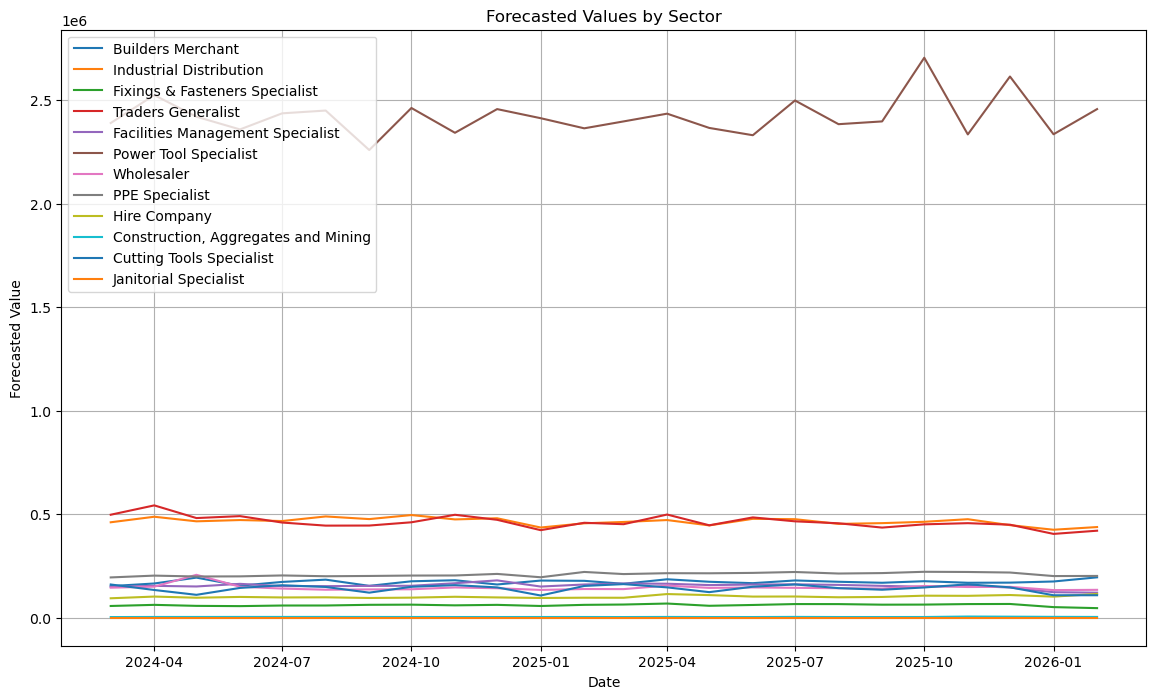

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df=forecast_results_df
# Assuming df is your DataFrame with 'future_forecast' column
# Remove rows where 'future_forecast' is NaN
df = df.dropna(subset=['future_forecast'])

# Convert forecast dictionaries to DataFrames
forecasts_df = pd.DataFrame({
    sector: pd.Series(forecast) for sector, forecast in df['future_forecast'].items()
})

# Ensure that the DataFrame's index (dates) is correctly sorted
forecasts_df.sort_index(inplace=True)

# Plot forecasted values by sector
plt.figure(figsize=(14, 8))
for sector in forecasts_df.columns:
    plt.plot(forecasts_df.index, forecasts_df[sector], label=sector)
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values by Sector')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


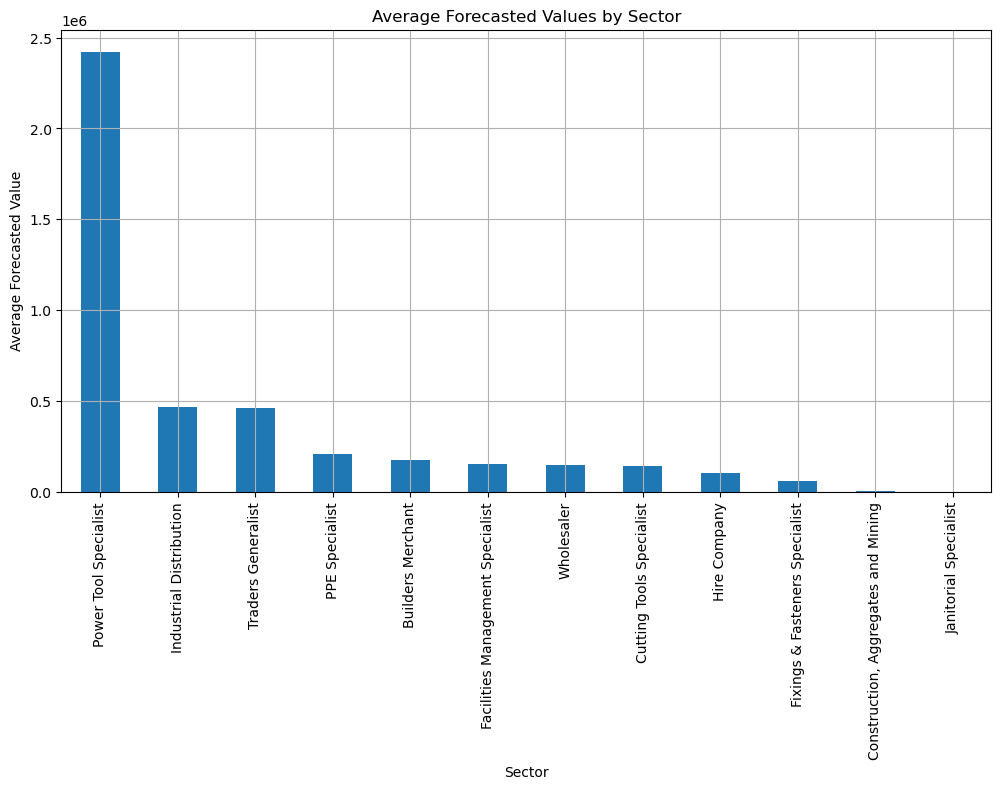

Average Forecasted Values by Sector:
Power Tool Specialist                  2.422908e+06
Industrial Distribution                4.649728e+05
Traders Generalist                     4.624821e+05
PPE Specialist                         2.088603e+05
Builders Merchant                      1.729983e+05
Facilities Management Specialist       1.543778e+05
Wholesaler                             1.456514e+05
Cutting Tools Specialist               1.410027e+05
Hire Company                           1.015315e+05
Fixings & Fasteners Specialist         6.071051e+04
Construction, Aggregates and Mining    3.764287e+03
Janitorial Specialist                  2.128812e+01
dtype: float64


In [73]:
# Calculate average forecasted value for each sector
average_forecast = forecasts_df.mean()

# Sort sectors by average forecasted value
sorted_sectors = average_forecast.sort_values(ascending=False)

# Plot average forecasted values
plt.figure(figsize=(12, 6))
sorted_sectors.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Average Forecasted Value')
plt.title('Average Forecasted Values by Sector')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Print sorted sectors and their average forecasted values
print("Average Forecasted Values by Sector:")
print(sorted_sectors)
